In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [7]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

from config import input_columns, output_columns

print("Input columns:", input_columns)
print("Output columns:", output_columns)

Input columns: ['height', 'weight', 'age', 'form']
Output columns: ['shoulder', 'long_sleeve', 'sleeve', 'biceps', 'armhole', 'neck', 'chest', 'waist', 'stomach', 'hip', 'pants_length', 'thight', 'crotch']


In [2]:
metrics = pd.read_csv(Path(r"..\results\metrics\metric.csv").resolve())

In [3]:
metrics

Input  \
0   height, weight, age, form_Inverted_Triangle, f...   
1   height, weight, age, form_Inverted_Triangle, f...   
2   height, weight, age, form_Inverted_Triangle, f...   
3   height, weight, age, form_Inverted_Triangle, f...   
4   height, weight, age, form_Inverted_Triangle, f...   
5   height, weight, age, form_Inverted_Triangle, f...   
6   height, weight, age, form_Inverted_Triangle, f...   
7   height, weight, age, form_Inverted_Triangle, f...   
8   height, weight, age, form_Inverted_Triangle, f...   
9   height, weight, age, form_Inverted_Triangle, f...   
10  height, weight, age, form_Inverted_Triangle, f...   
11  height, weight, age, form_Inverted_Triangle, f...   
12  height, weight, age, form_Inverted_Triangle, f...   

                                               Output       MAE       MSE  \
0   shoulder, long_sleeve, sleeve, biceps, armhole...  1.918445  7.364742   
1   long_sleeve, sleeve, biceps, armhole, neck, ch...  1.952682  7.582106   
2   sleeve, biceps, armhole, neck, chest, waist, s...  1.960813  7.720628   
3   biceps, armhole, neck, chest, waist, stomach, ...  2.038043  8.205785   
4   armhole, neck, chest, waist, stomach, hip, pan...  2.046921  8.345758   
5   neck, chest, waist, stomach, hip, pants_length...  2.125951  8.878814   
6   chest, waist, stomach, hip, pants_length, thig...  2.262280  9.791417   
7   waist, stomach, hip, pants_length, thight, crotch  2.212301  9.587233   
8          stomach, hip, pants_length, thight, crotch  2.070679  7.923492   
9                   hip, pants_length, thight, crotch  1.971017  7.020084   
10                       pants_length, thight, crotch  1.878208  6.534643   
11                                     thight, crotch  1.728583  5.497138   
12                                             crotch  1.685994  5.361067   

        RMSE        R2  
0   2.713806  0.985617  
1   2.753562  0.985061  
2   2.778602  0.986013  
3   2.864574  0.986174  
4   2.888903  0.982981  
5   2.979734  0.979708  
6   3.129124  0.964159  
7   3.096326  0.964200  
8   2.814870  0.973030  
9   2.649544  0.979273  
10  2.556295  0.976807  
11  2.344598  0.747088  
12  2.315398  0.652356

In [4]:
test = pd.read_csv(Path(r"..\results\dataframe\test.csv").resolve())


import glob

csv_files = glob.glob(str(Path(r"..\results\dataframe\pred\*.csv").resolve()))
pred_list = [pd.read_csv(file) for file in csv_files]

In [5]:
figure_path = Path(r"..\results\figures").resolve()

In [11]:
test

array([[170.,  67.,  21., ...,  98.,  61.,  66.],
       [183.,  75.,  46., ..., 105.,  60.,  70.],
       [175.,  82.,  46., ..., 102.,  61.,  66.],
       ...,
       [170.,  71.,  32., ...,  92.,  59.,  64.],
       [171.,  67.,  37., ...,  93.,  60.,  62.],
       [171.,  59.,  20., ...,  92.,  53.,  57.]])

In [12]:
input_columns = ["height","weight","age","form_Inverted_Triangle","form_Rectangle","form_Round","form_Trapezoid","form_Triangle"]

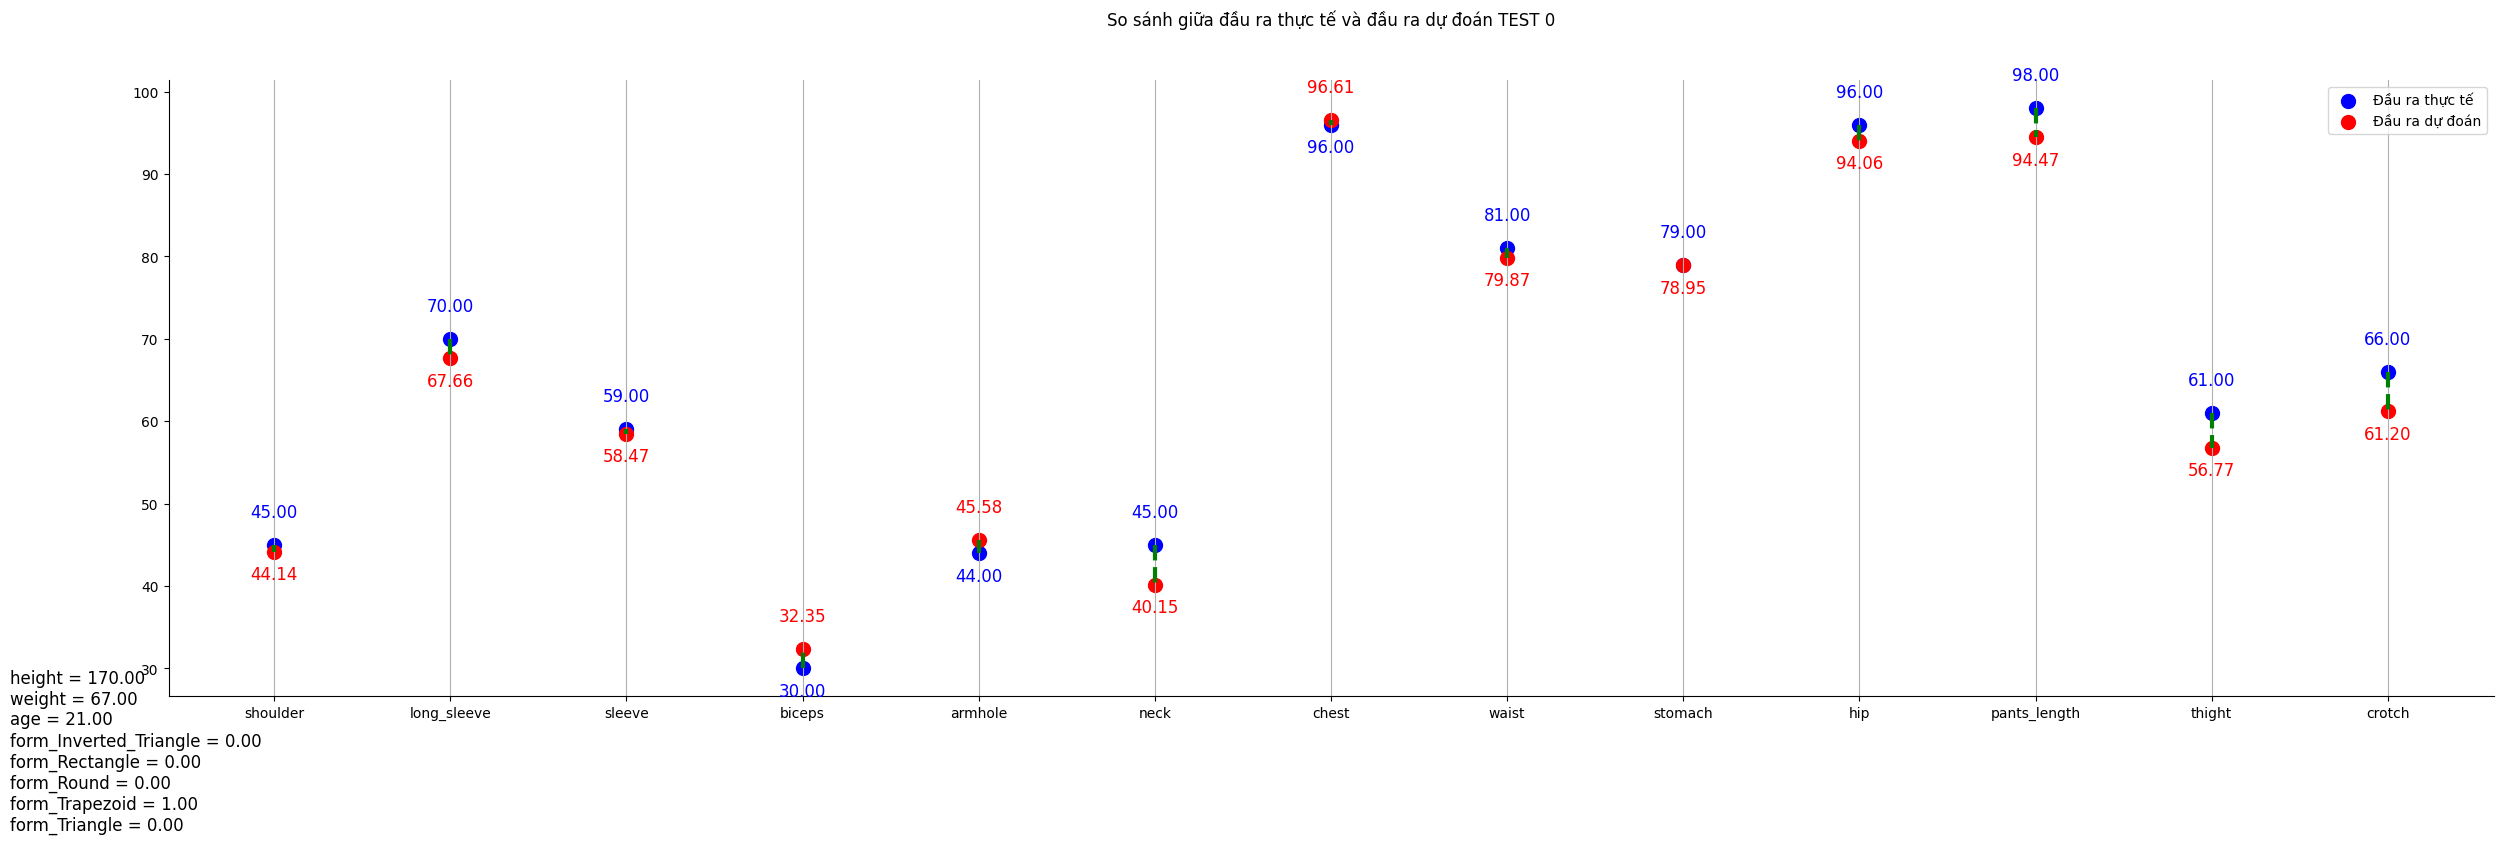

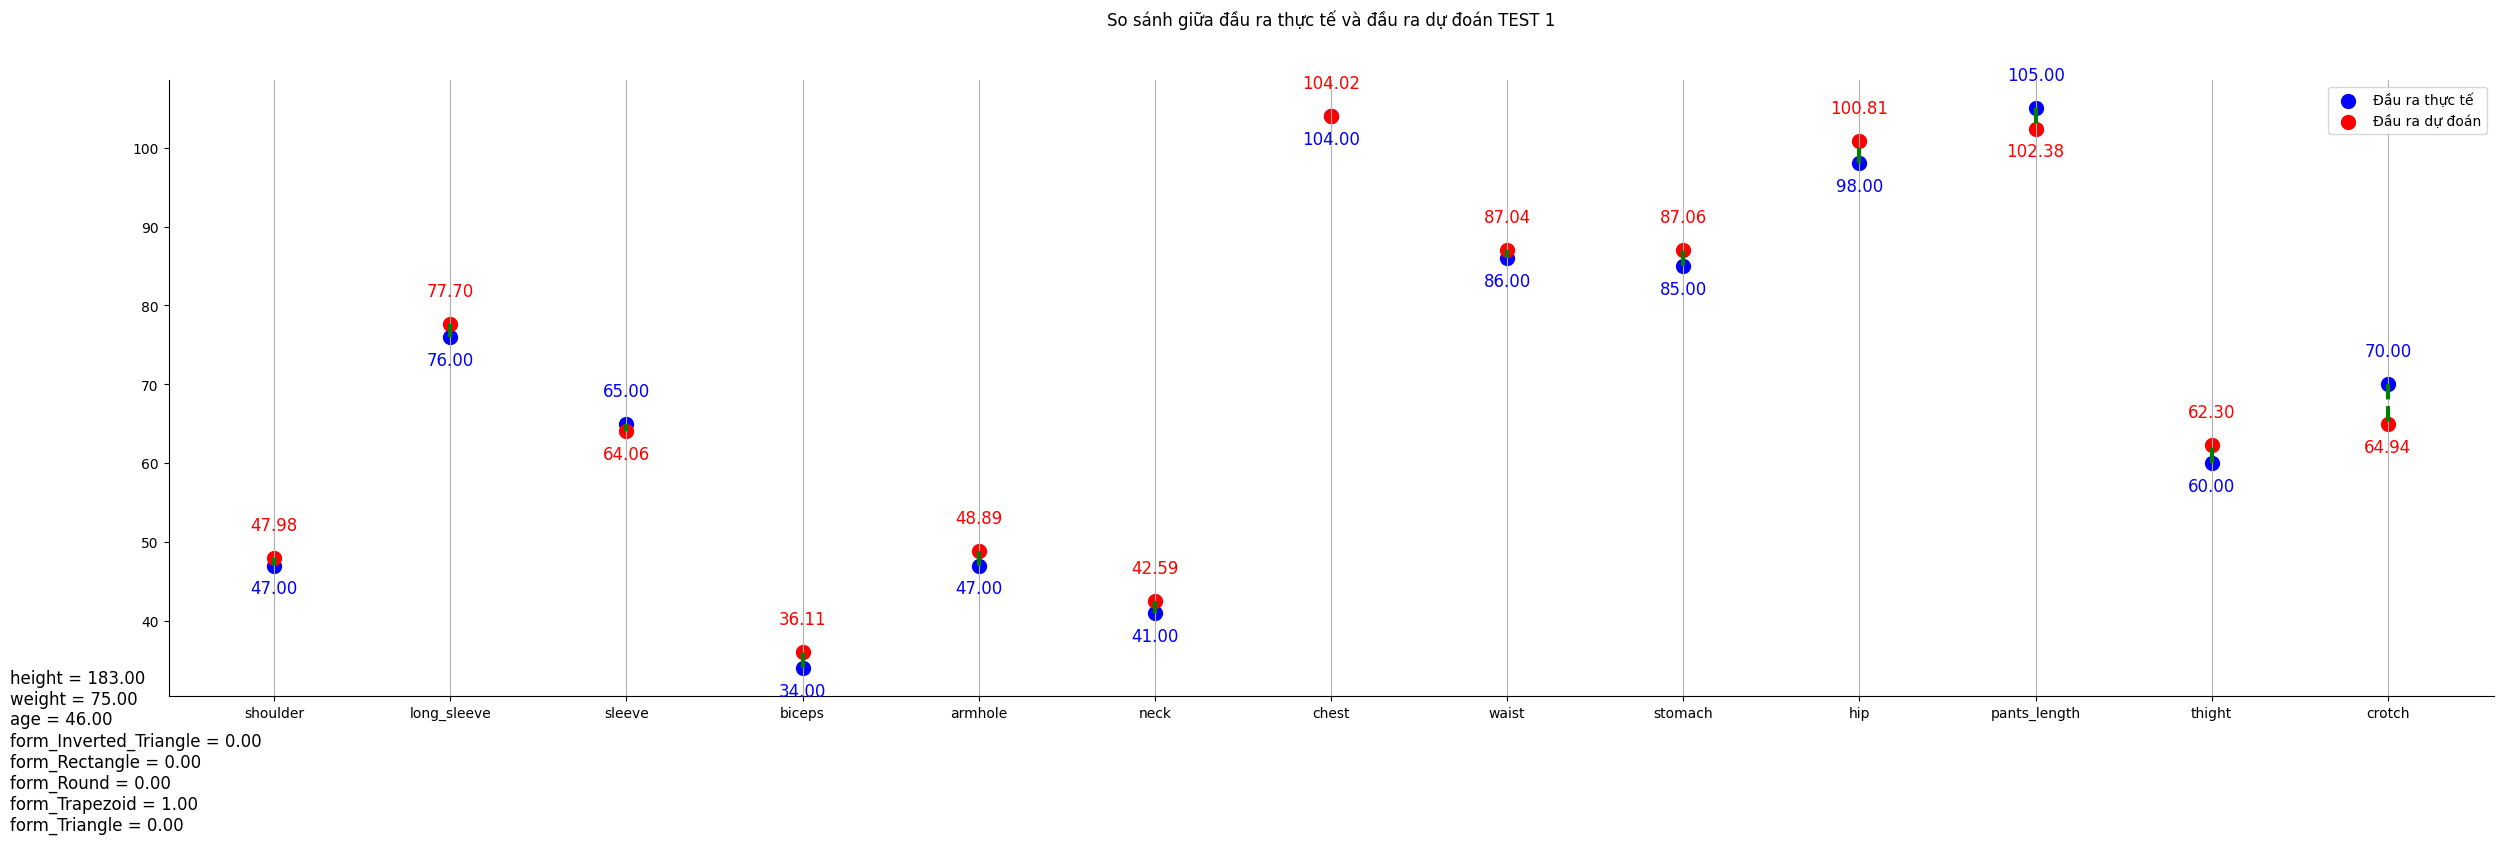

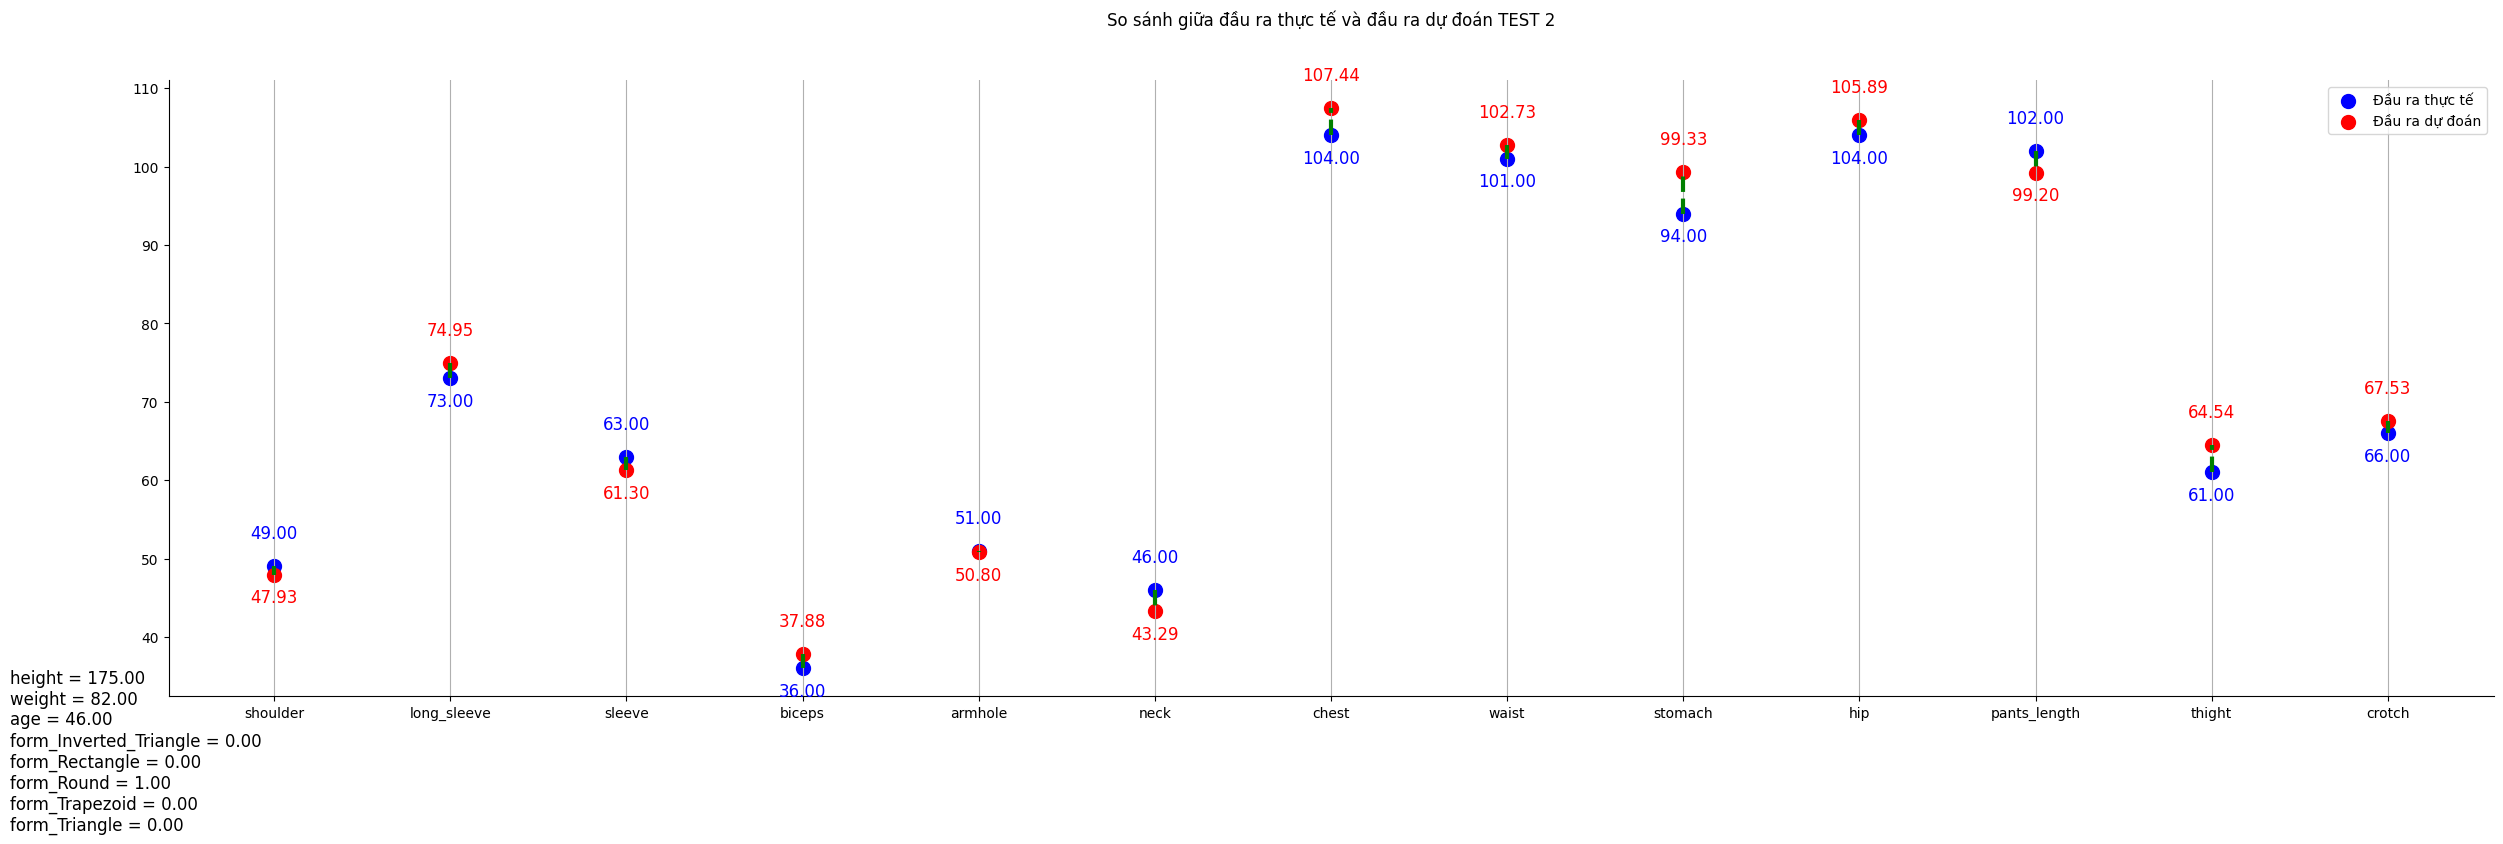

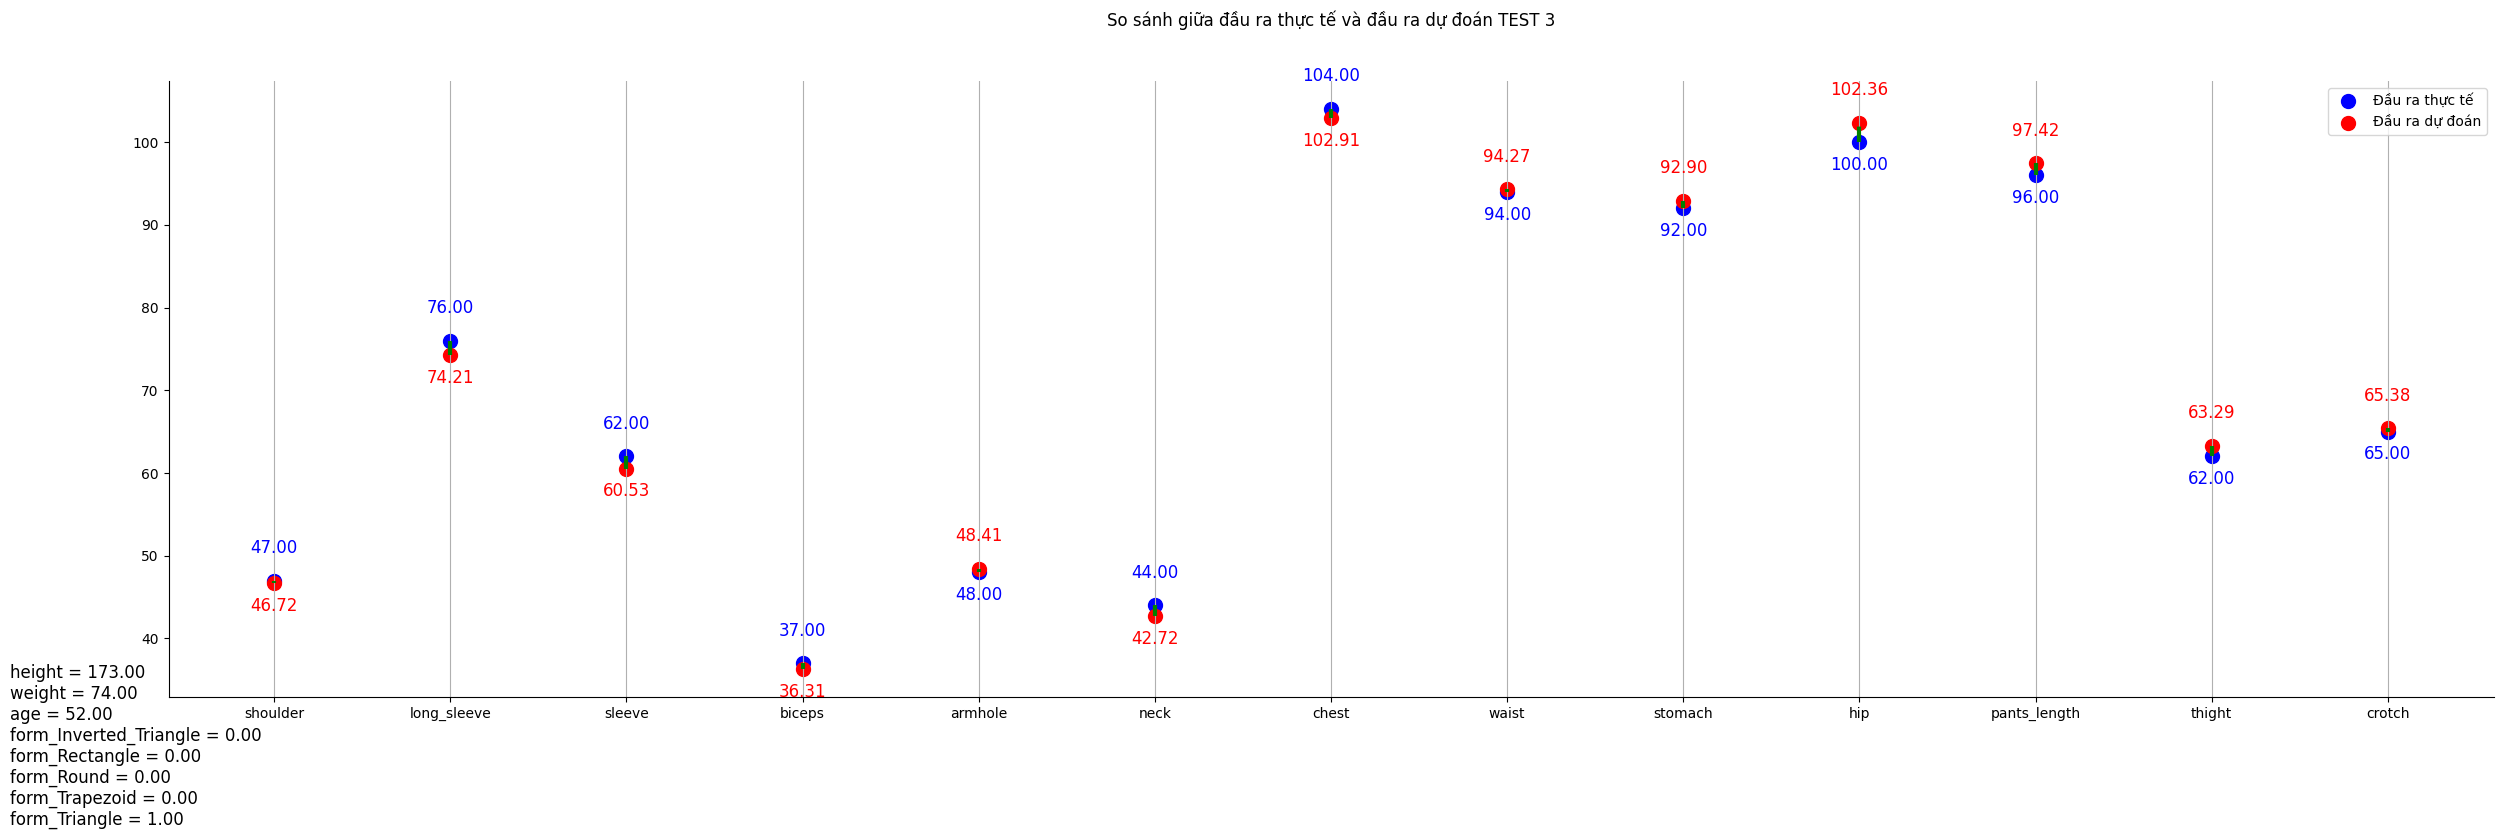

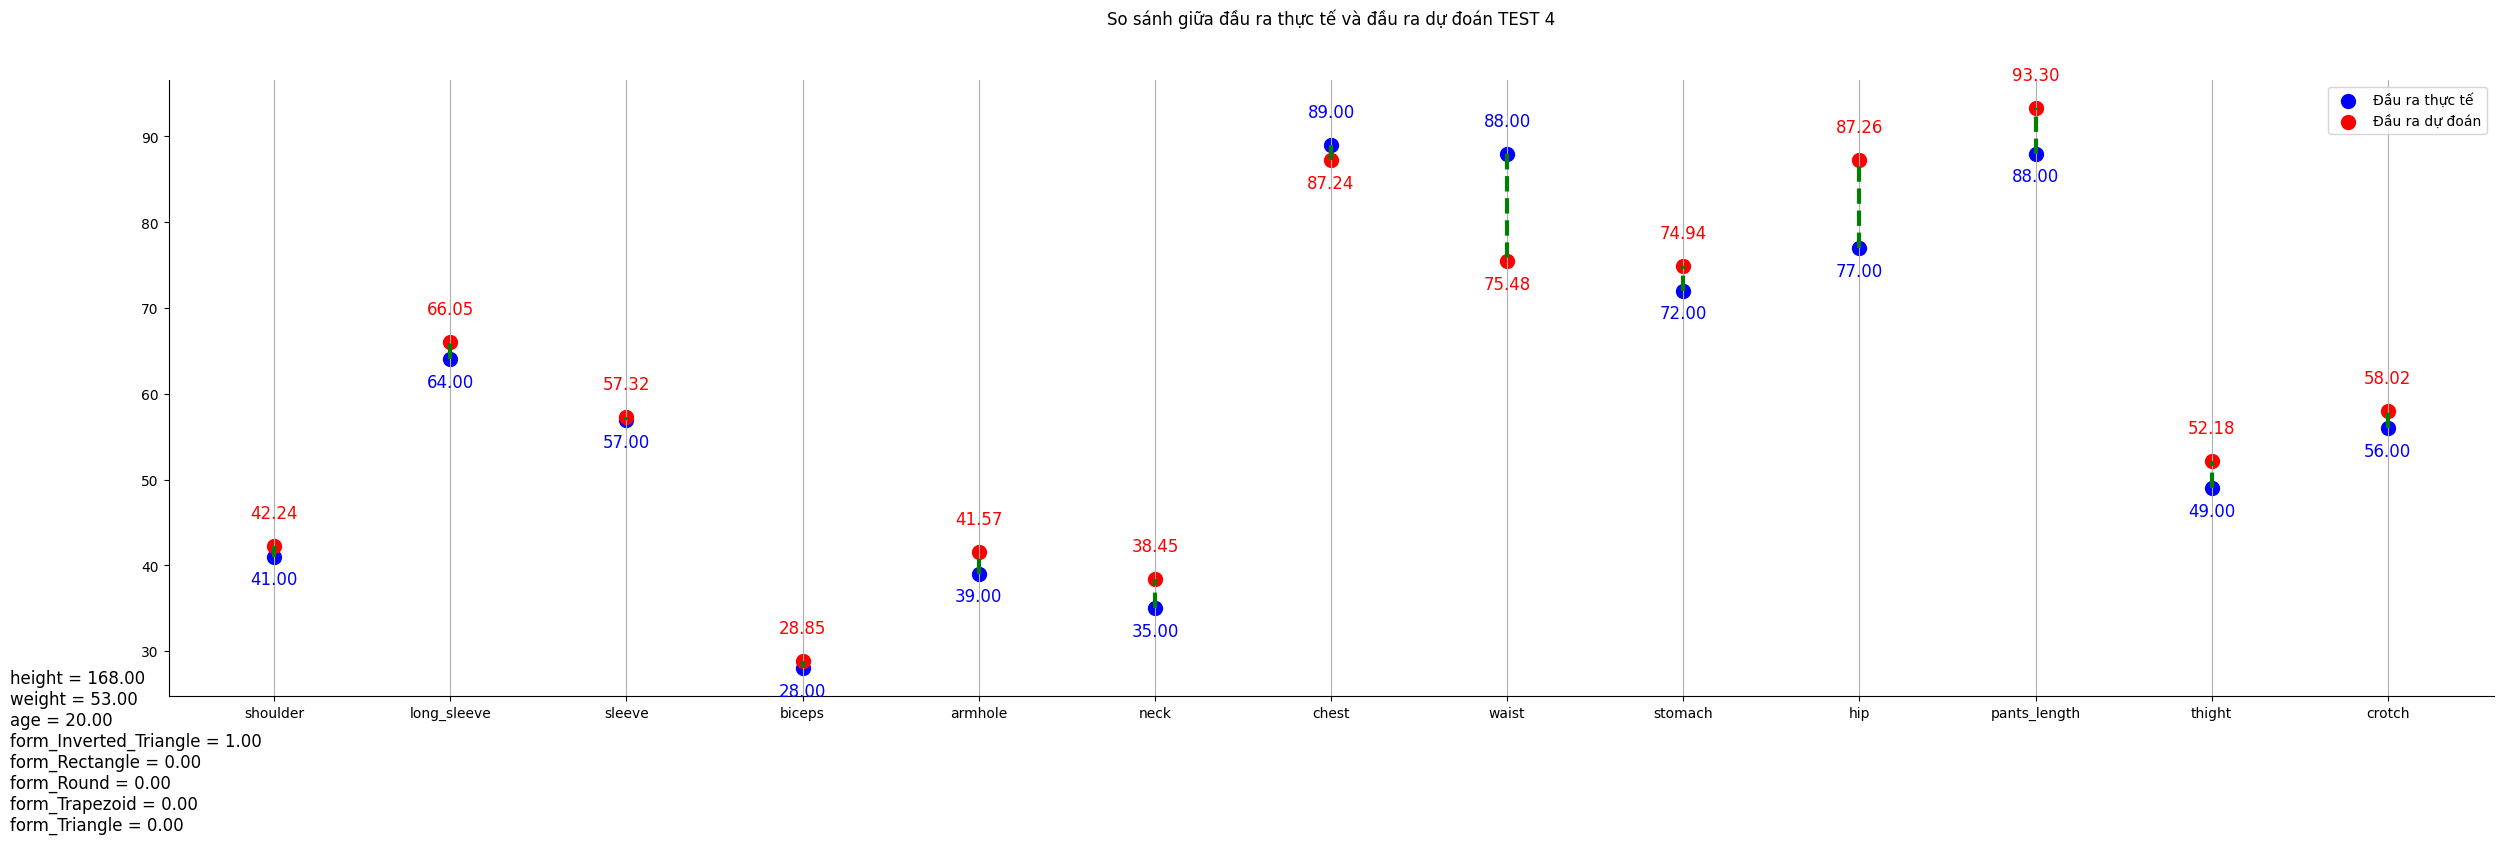

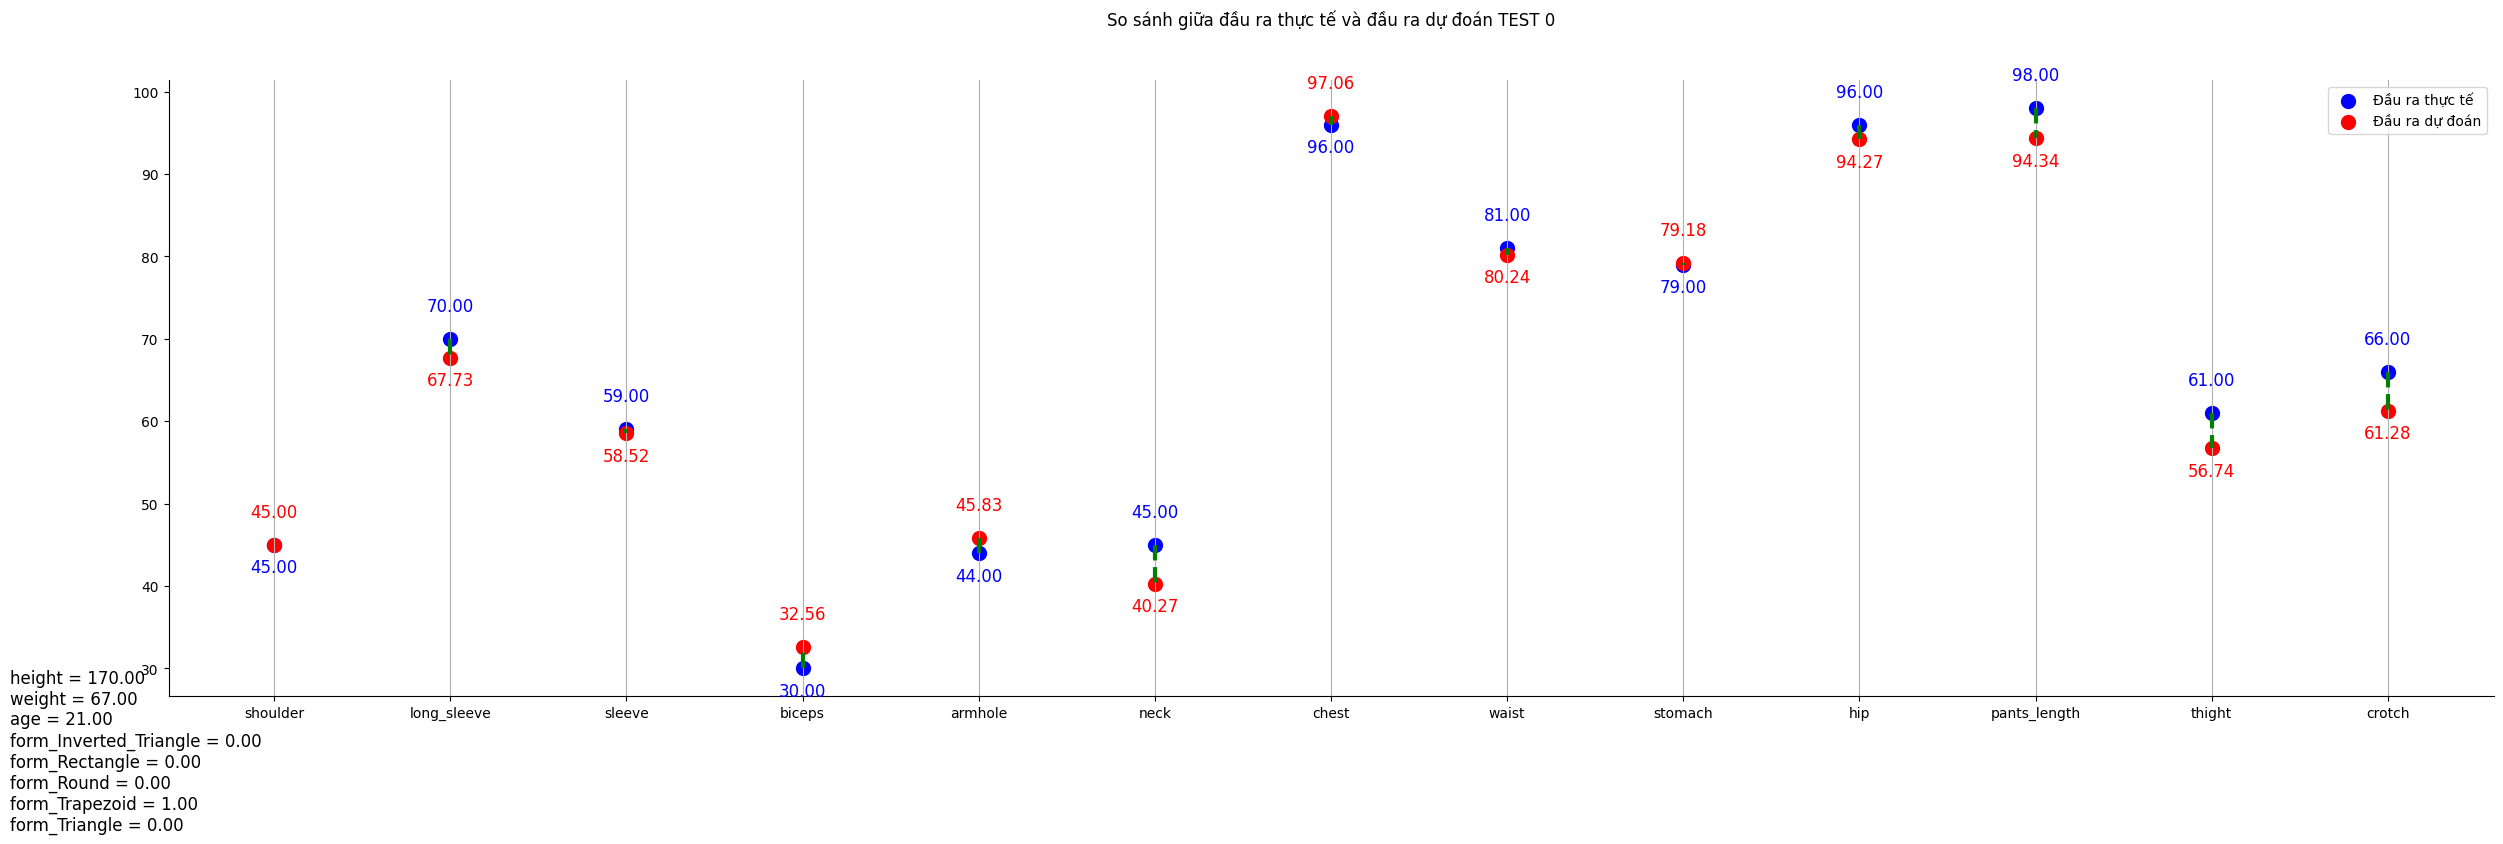

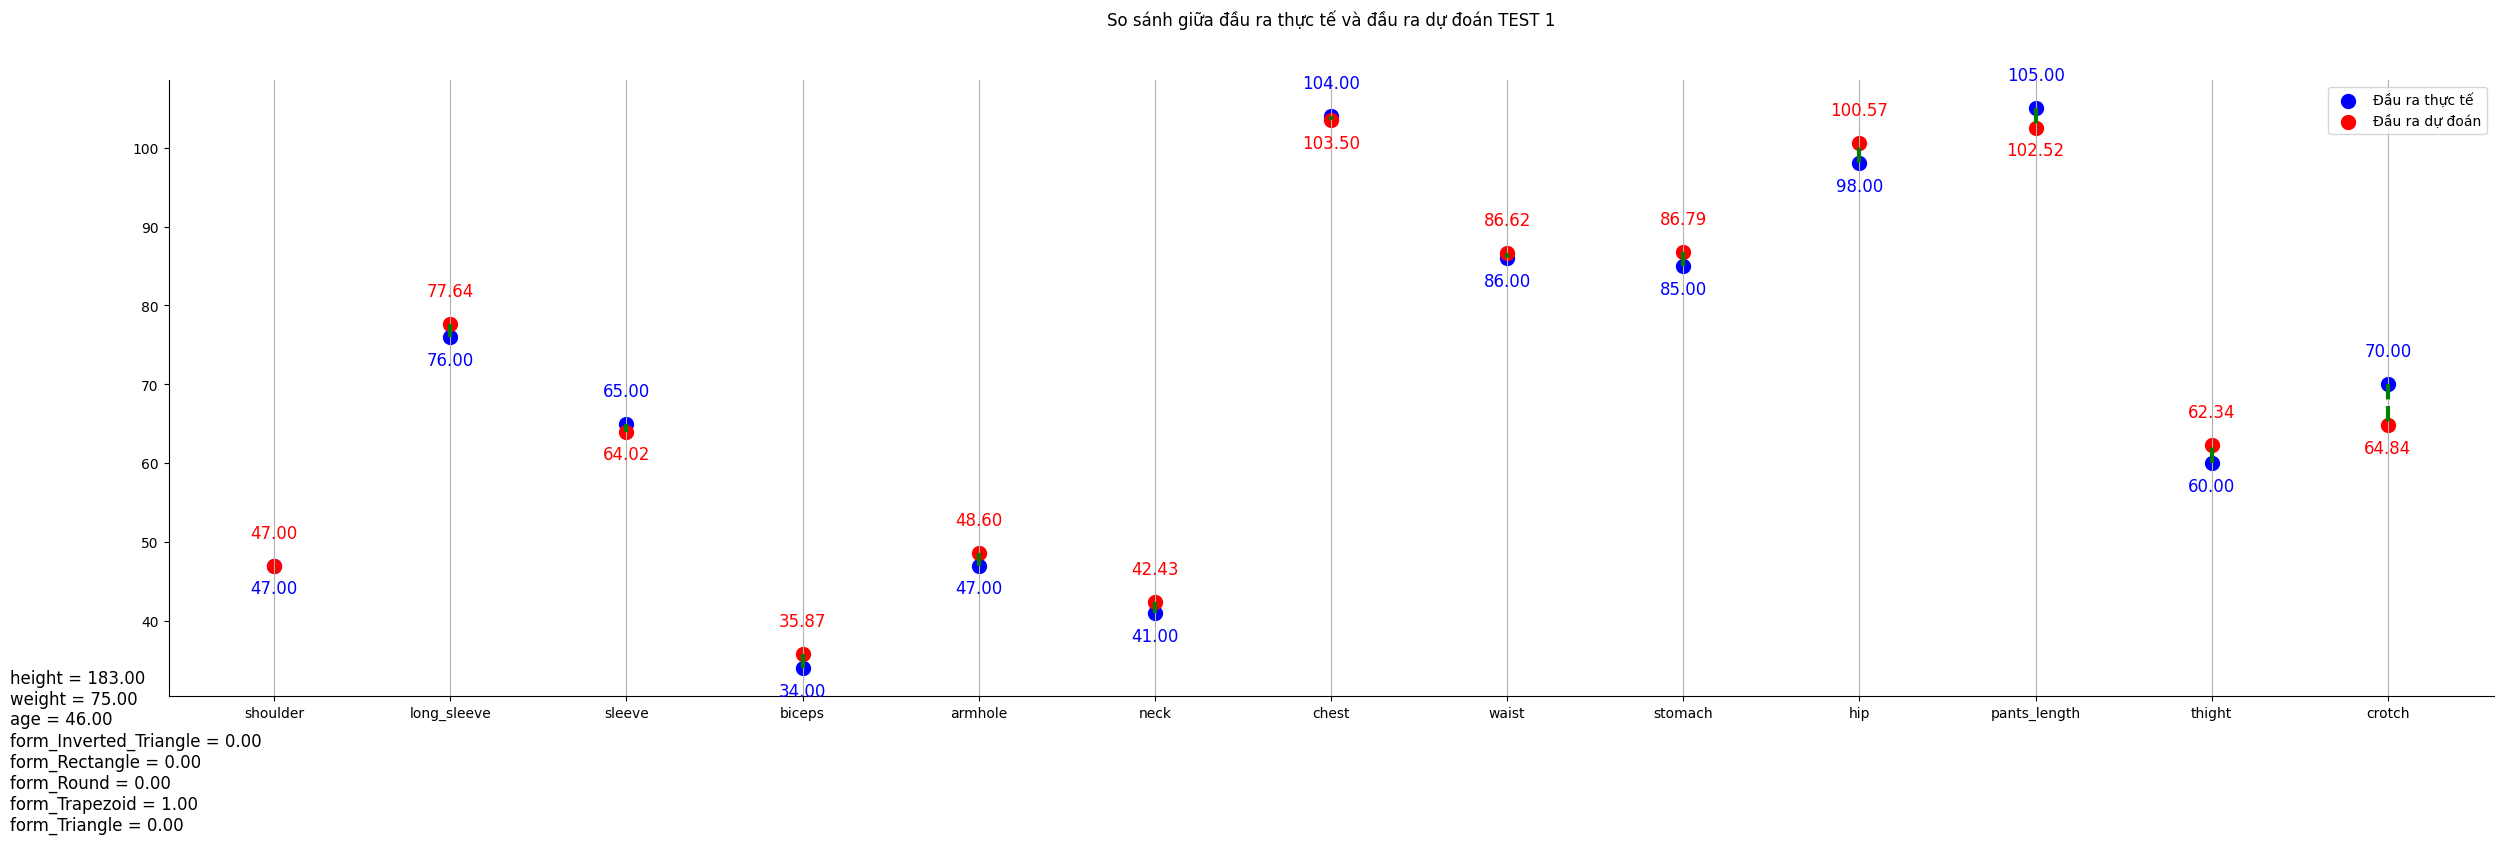

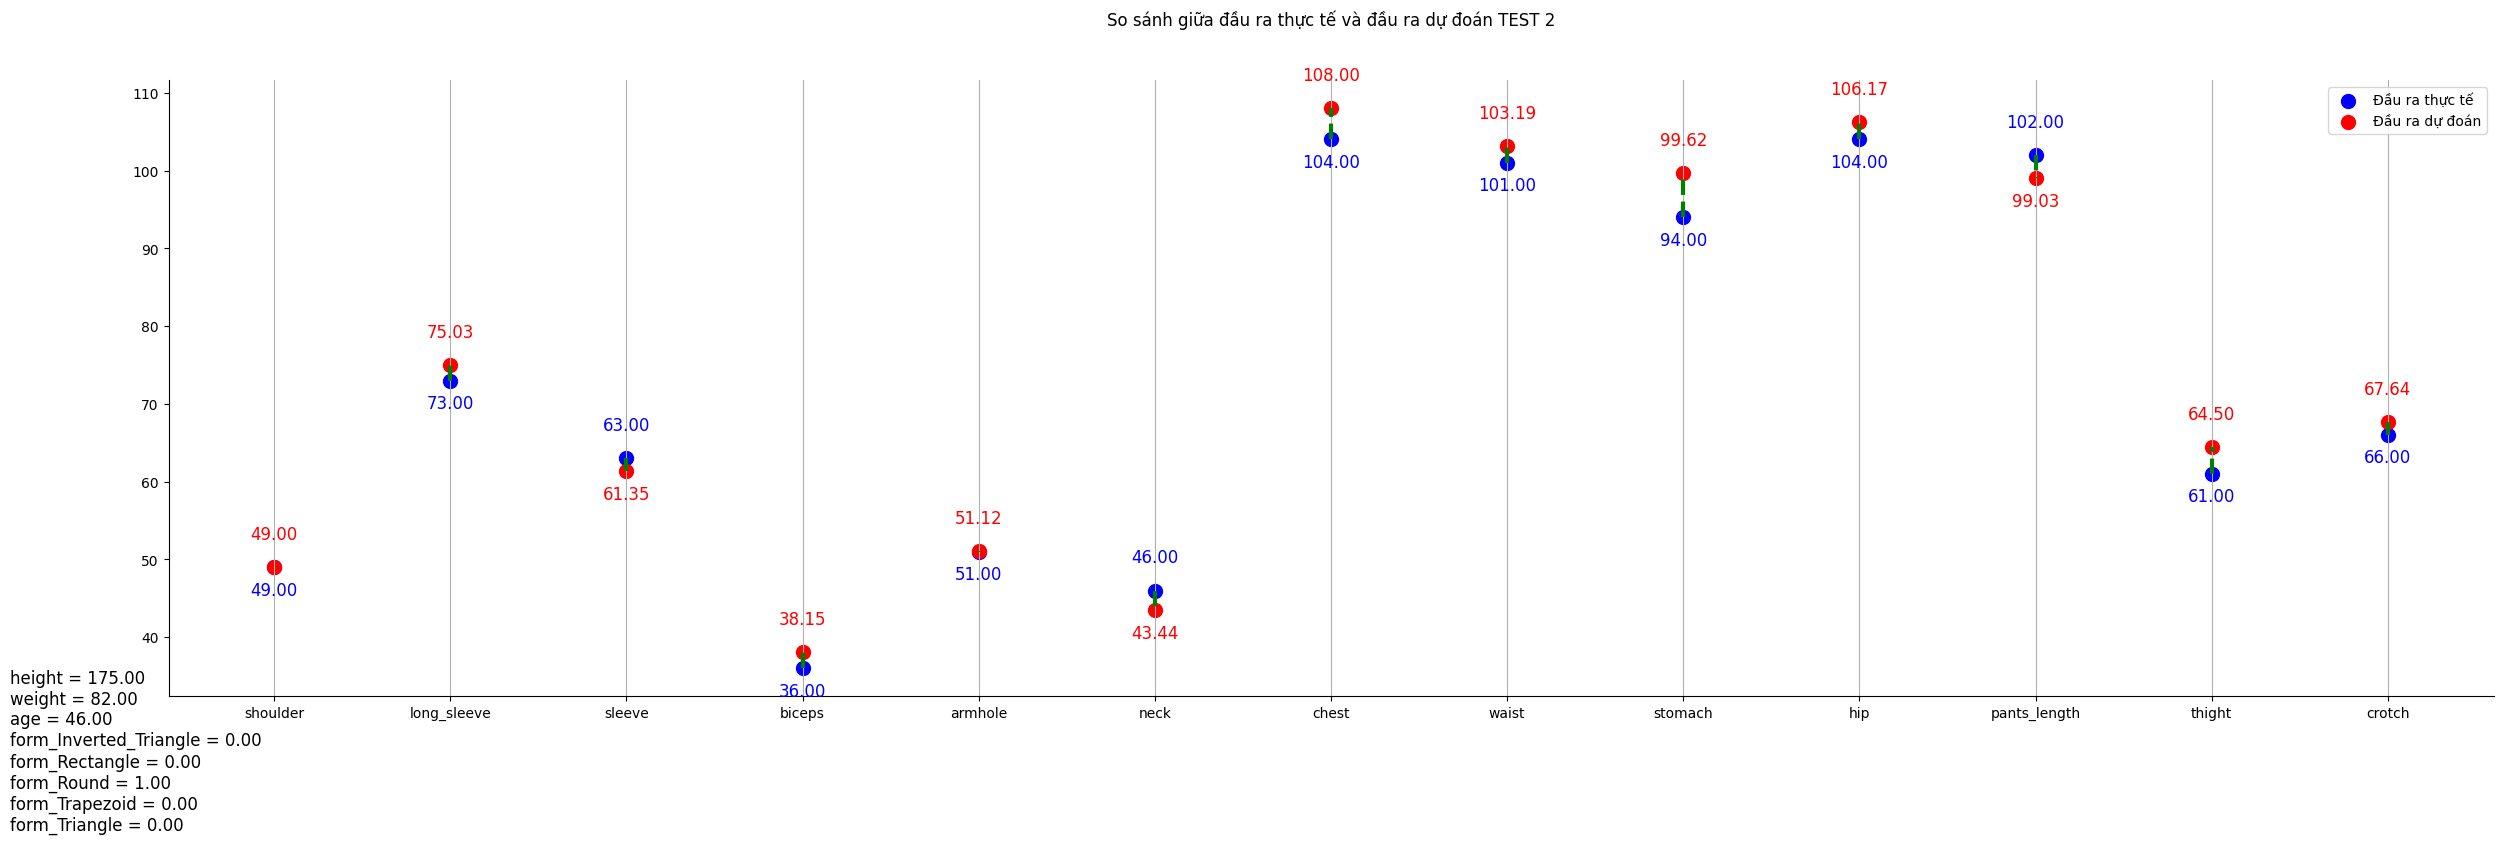

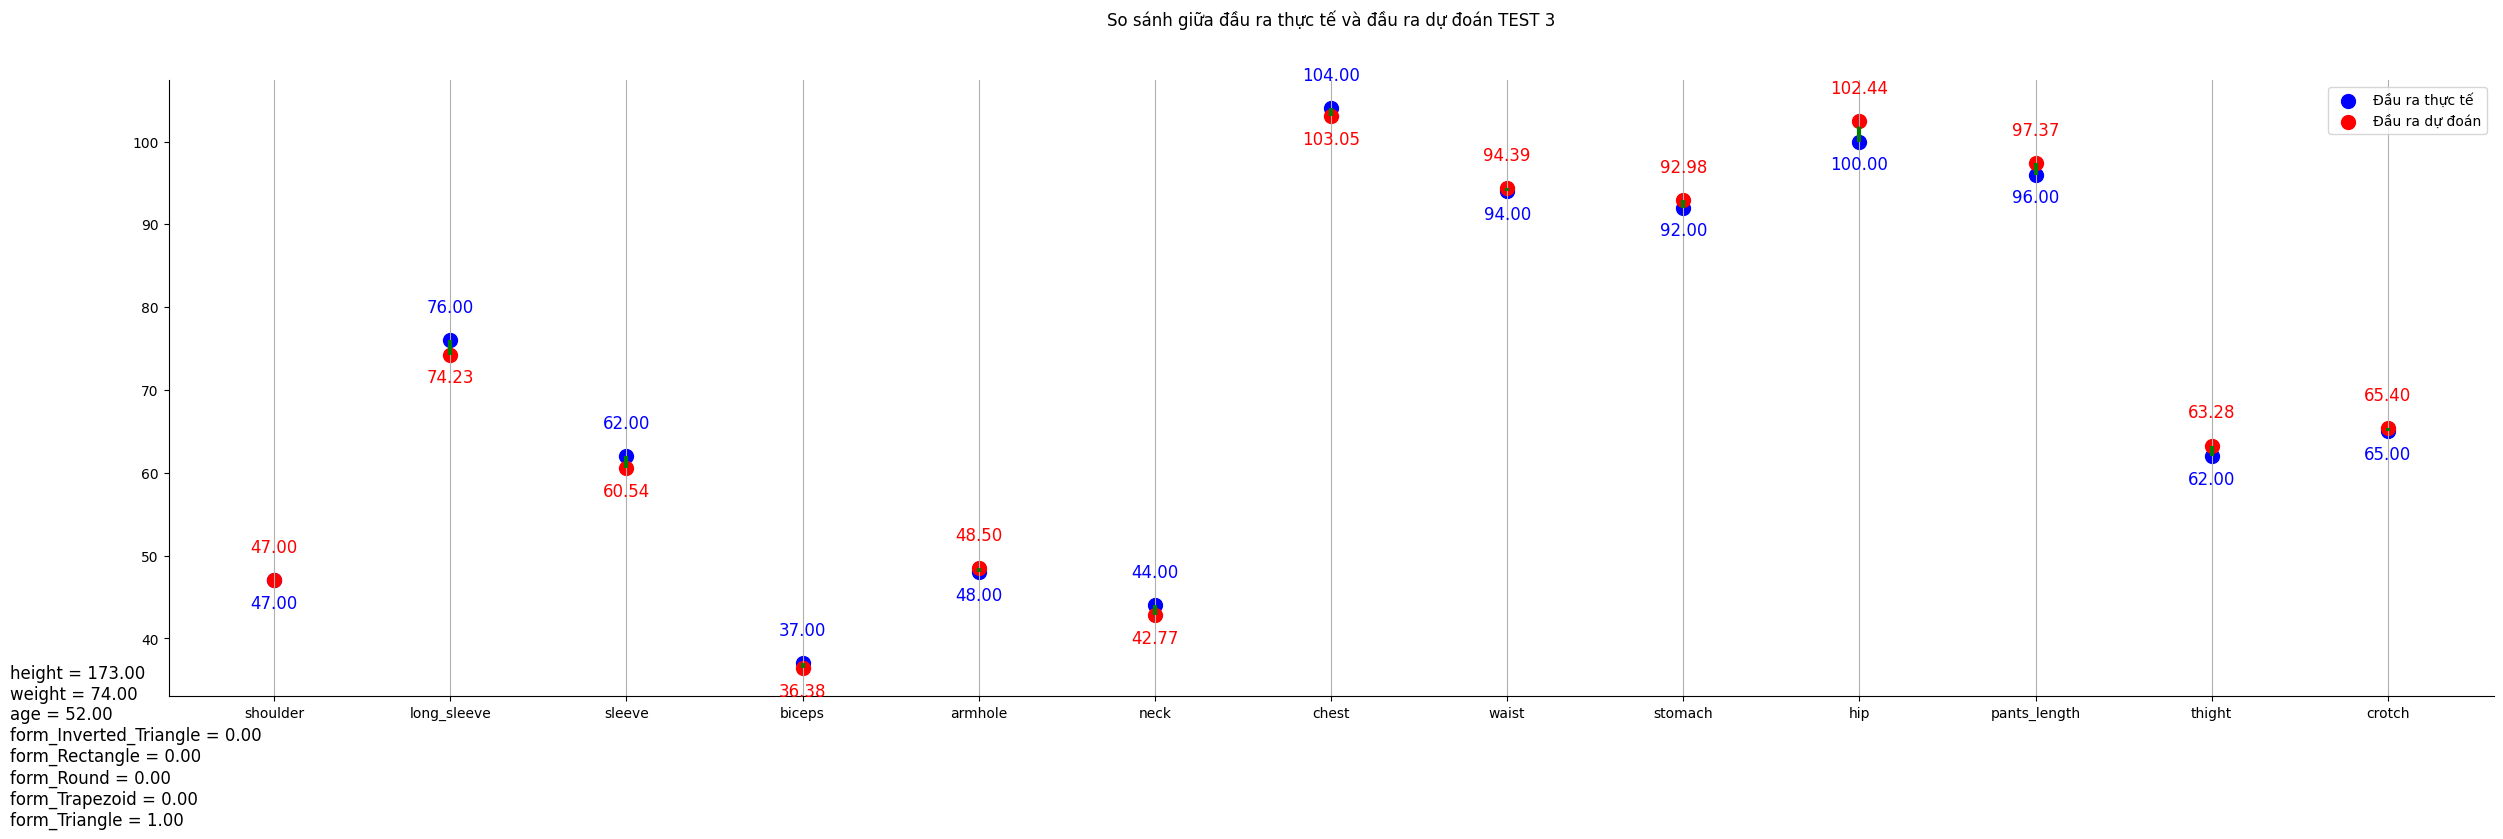

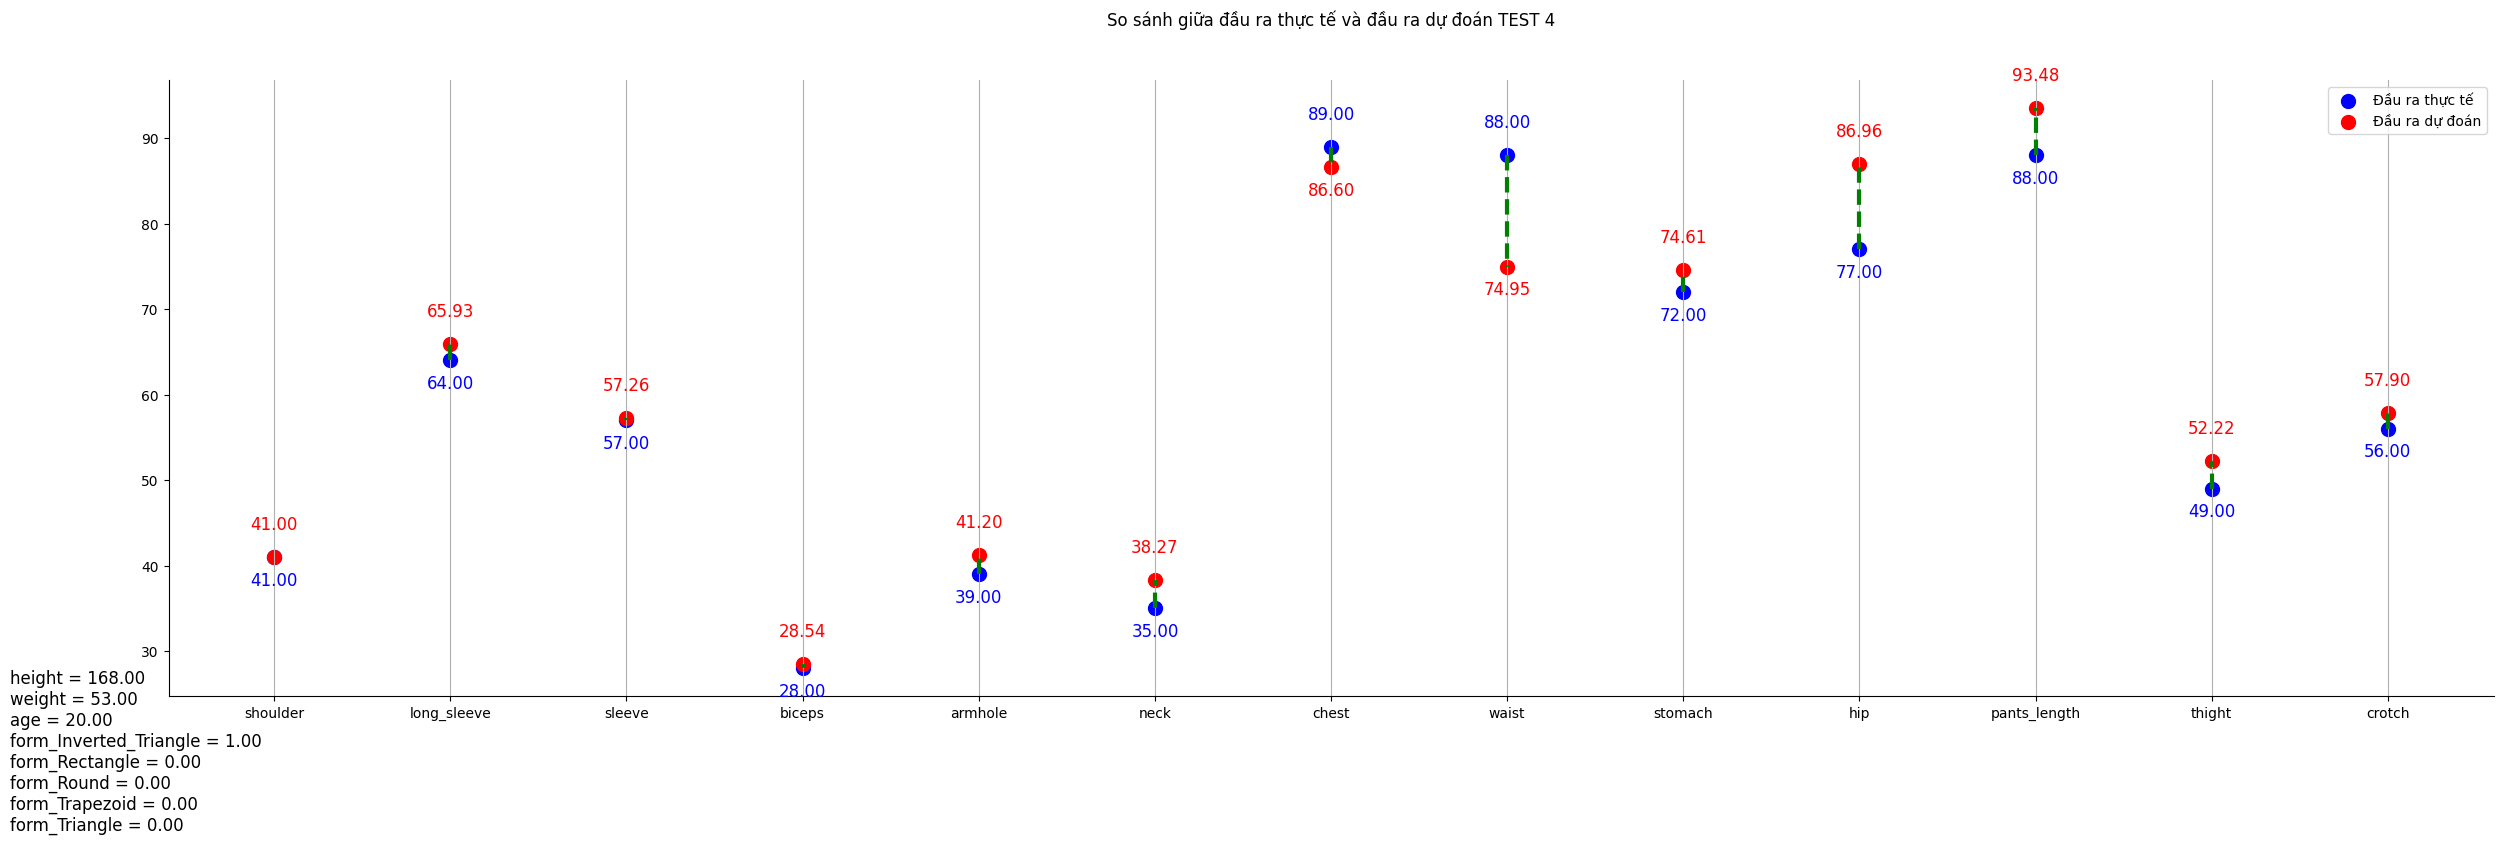

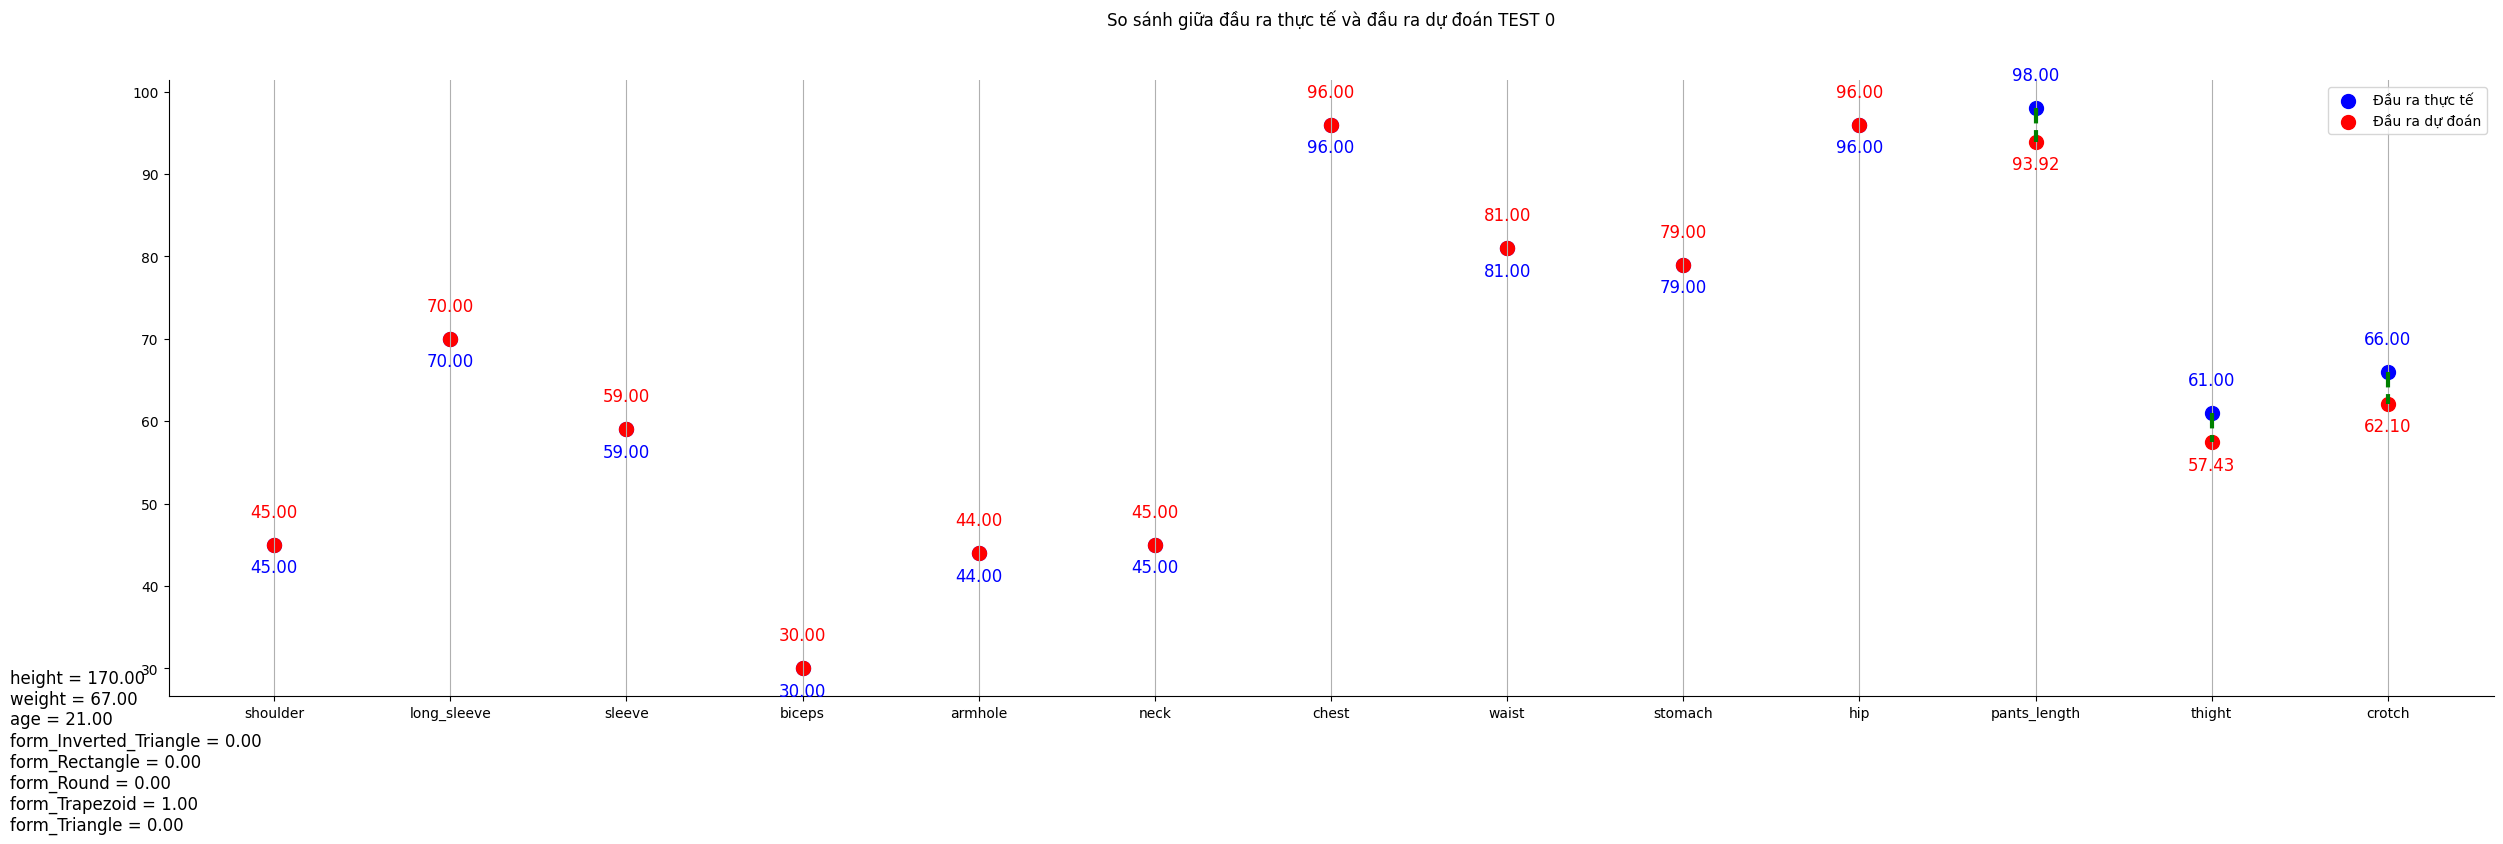

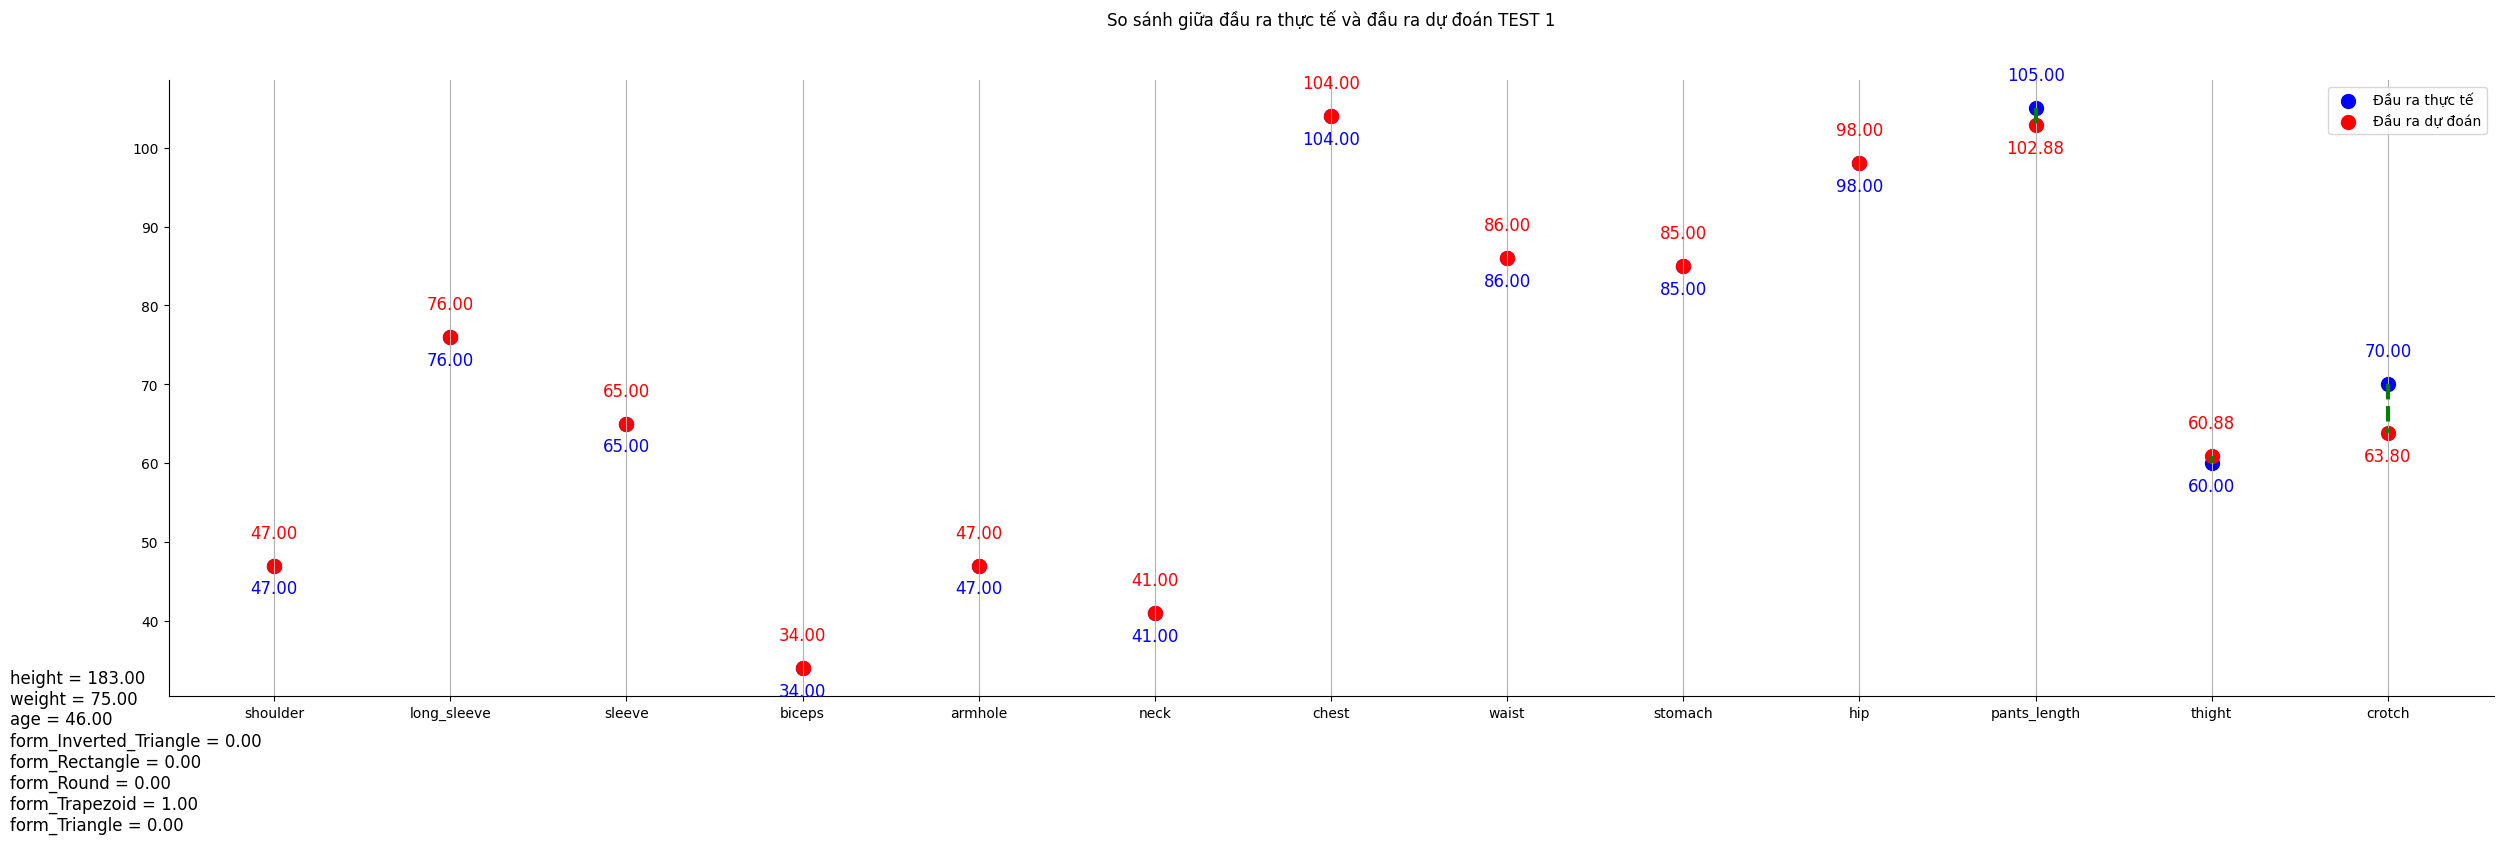

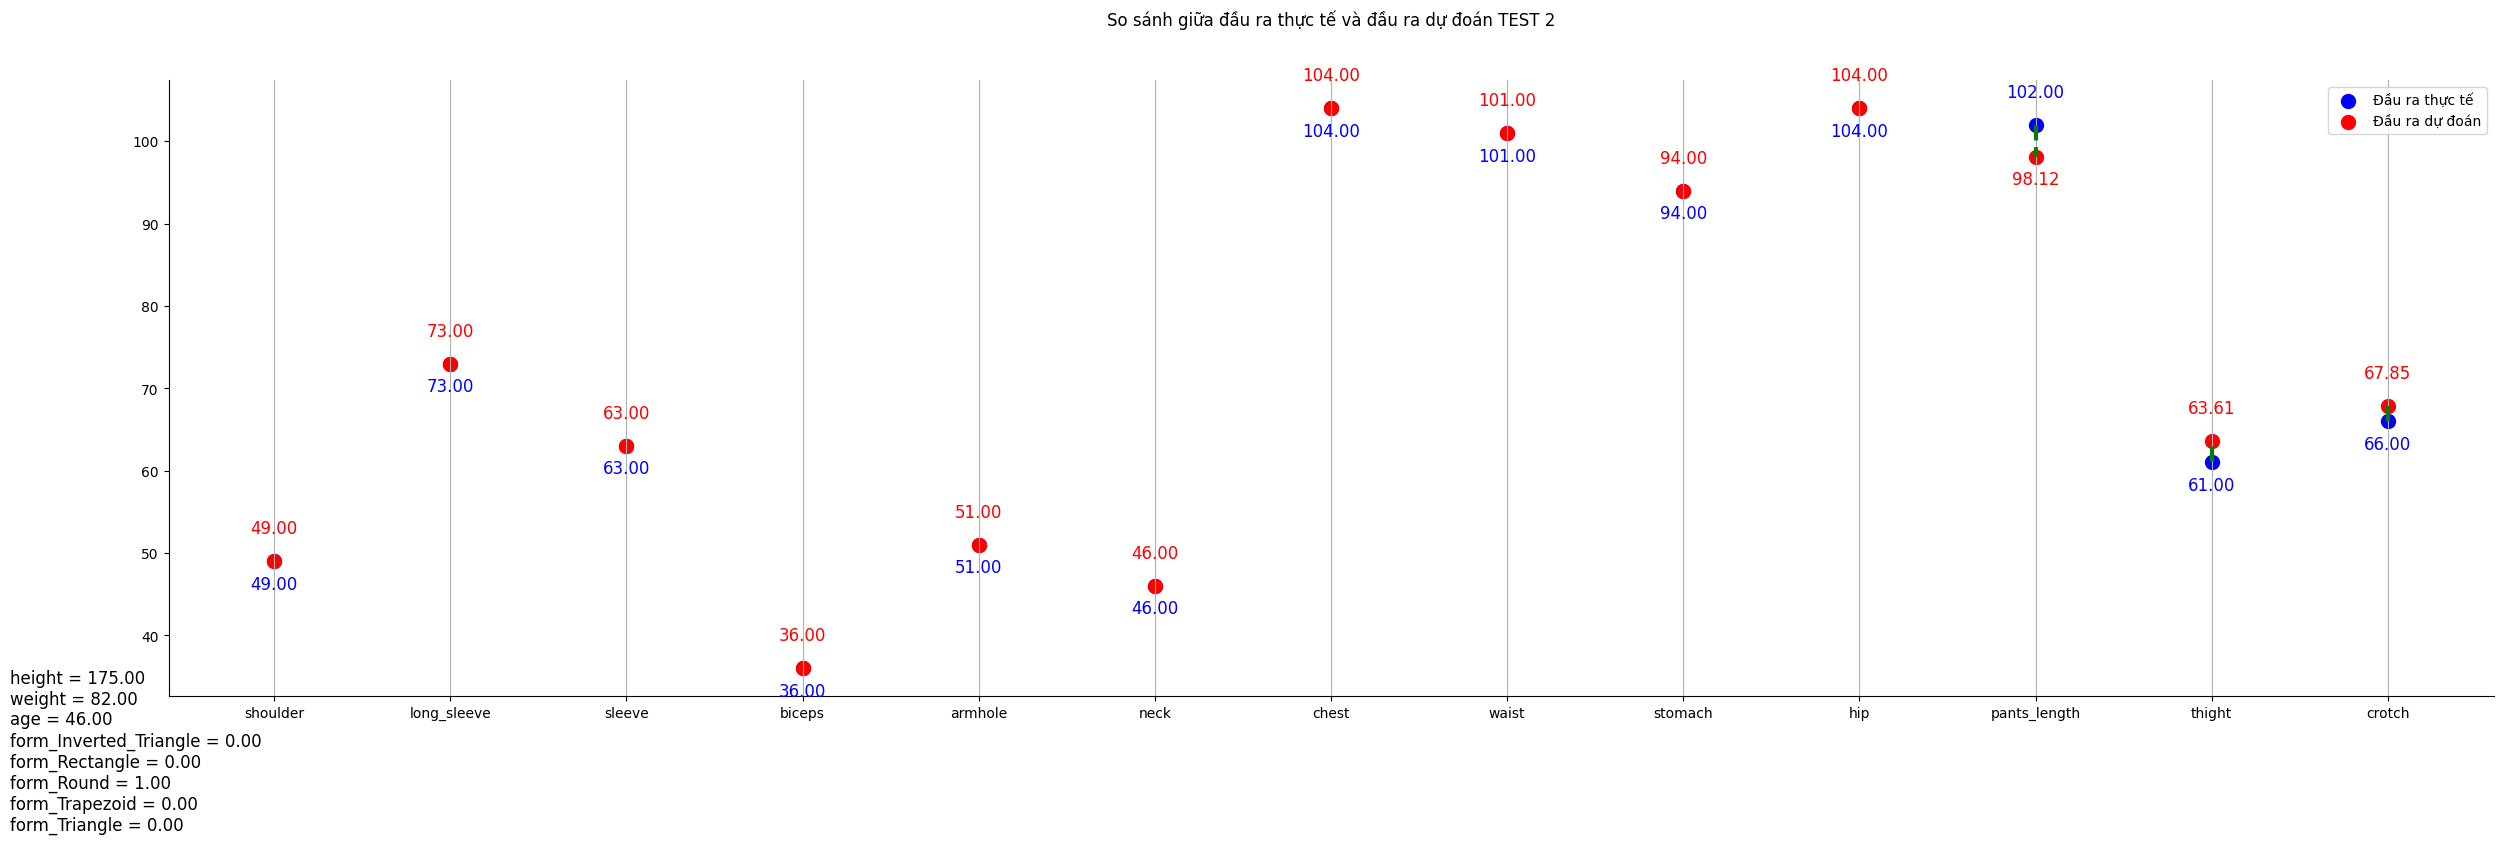

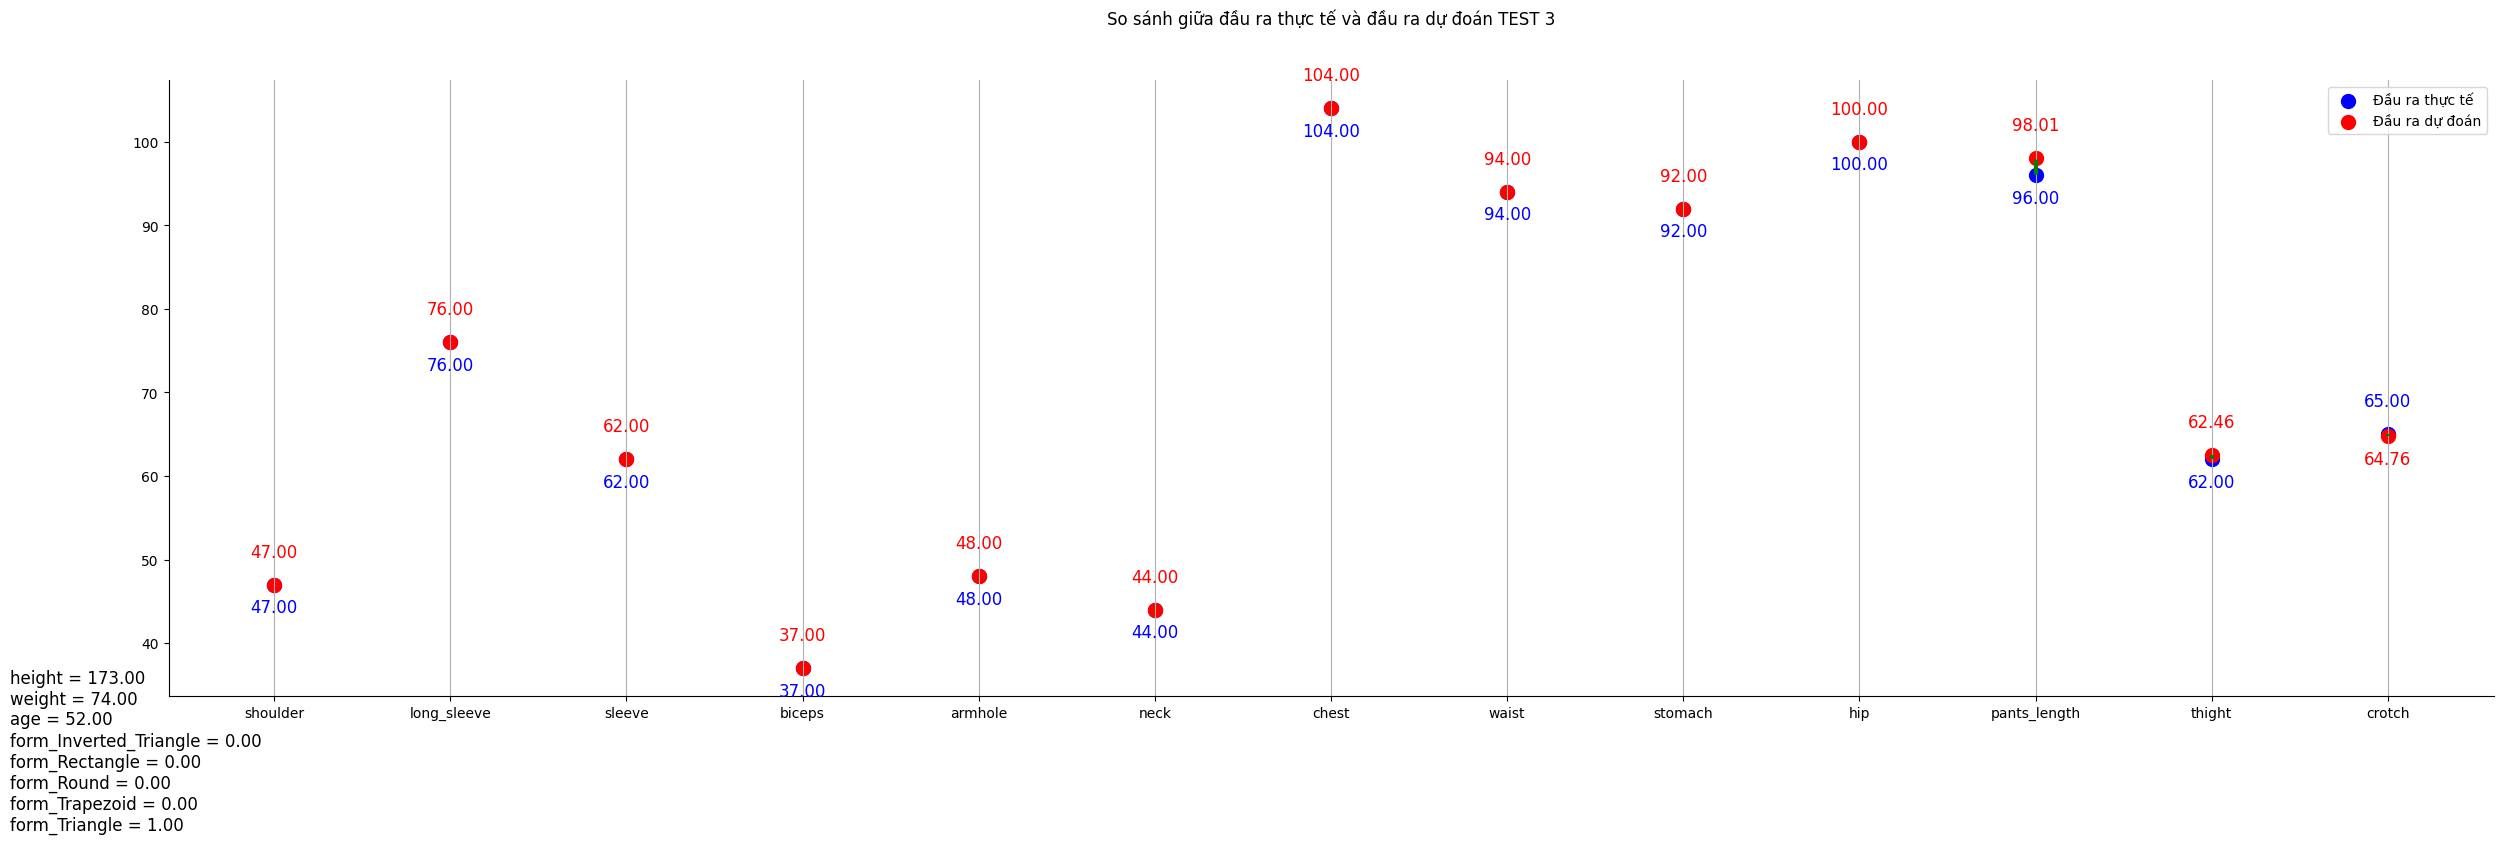

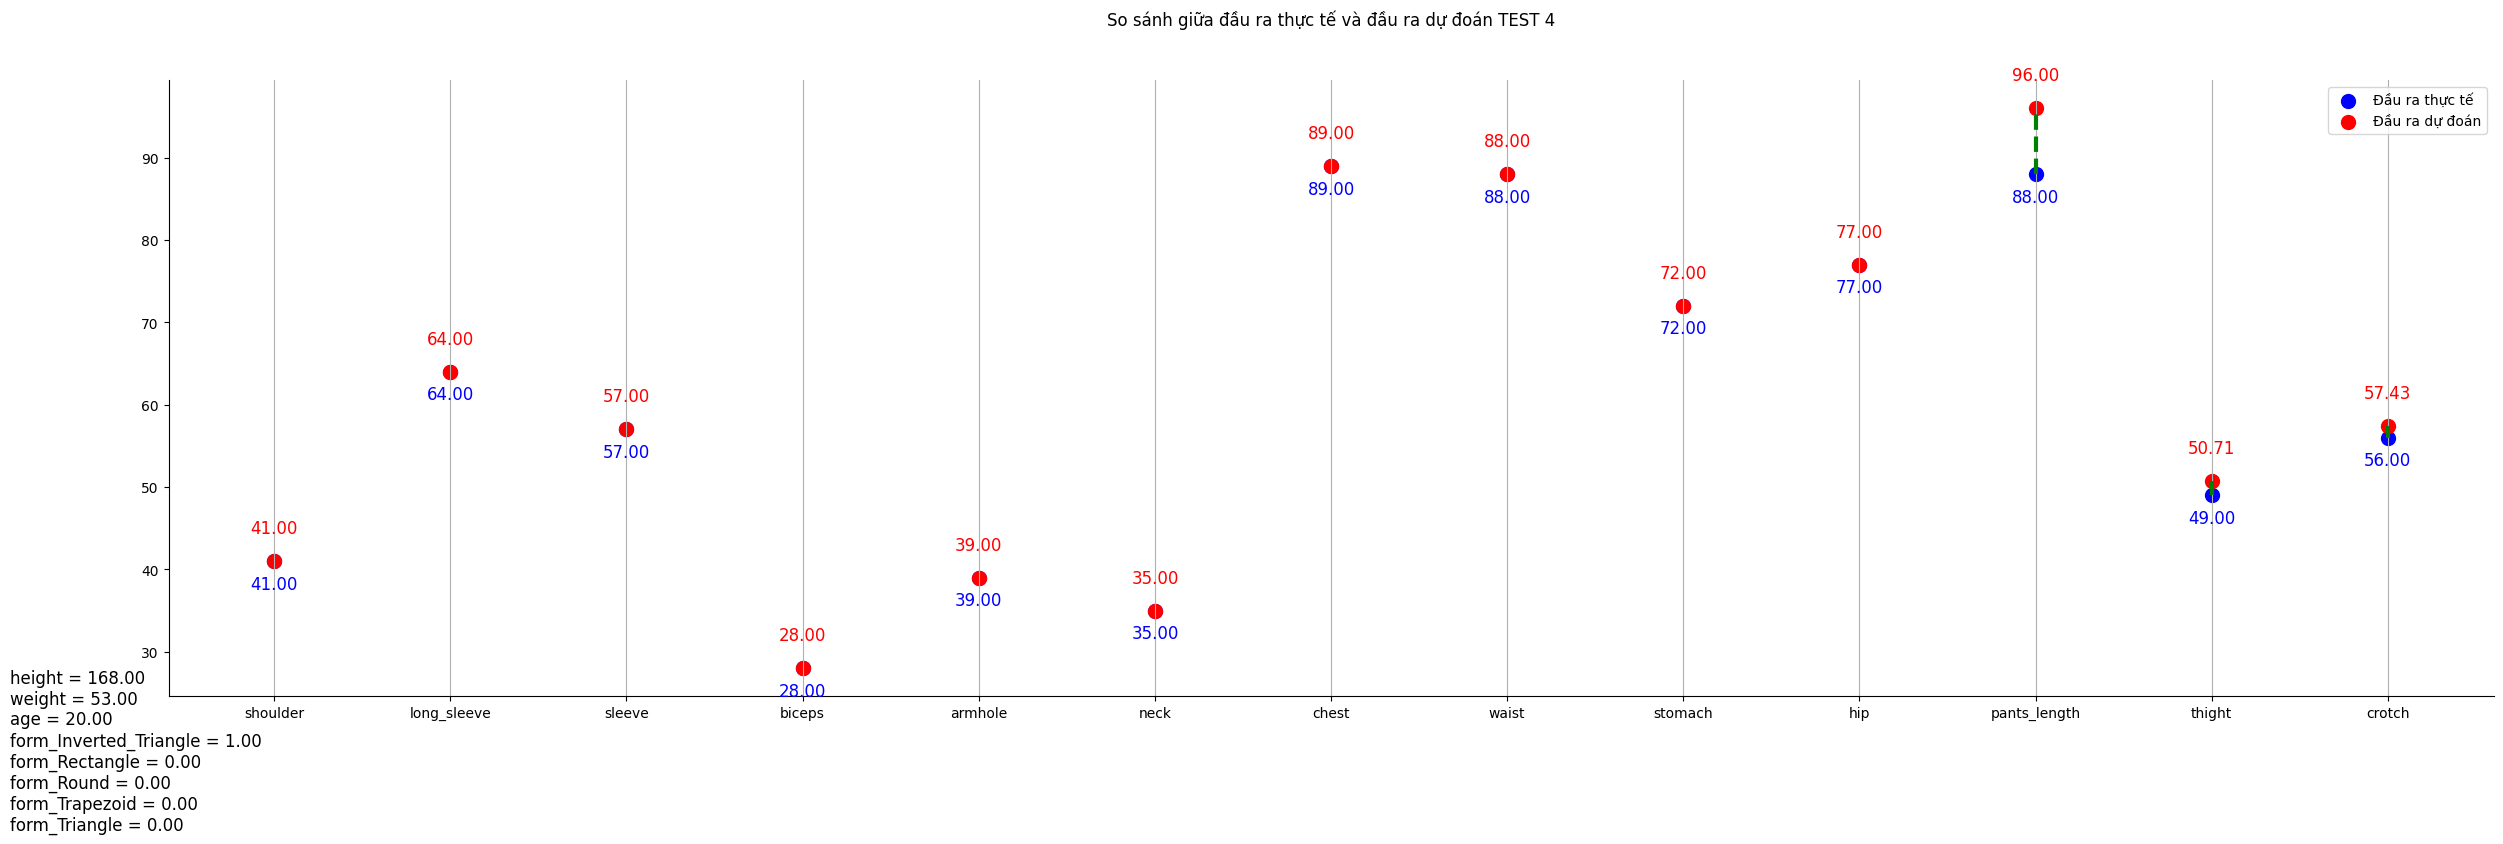

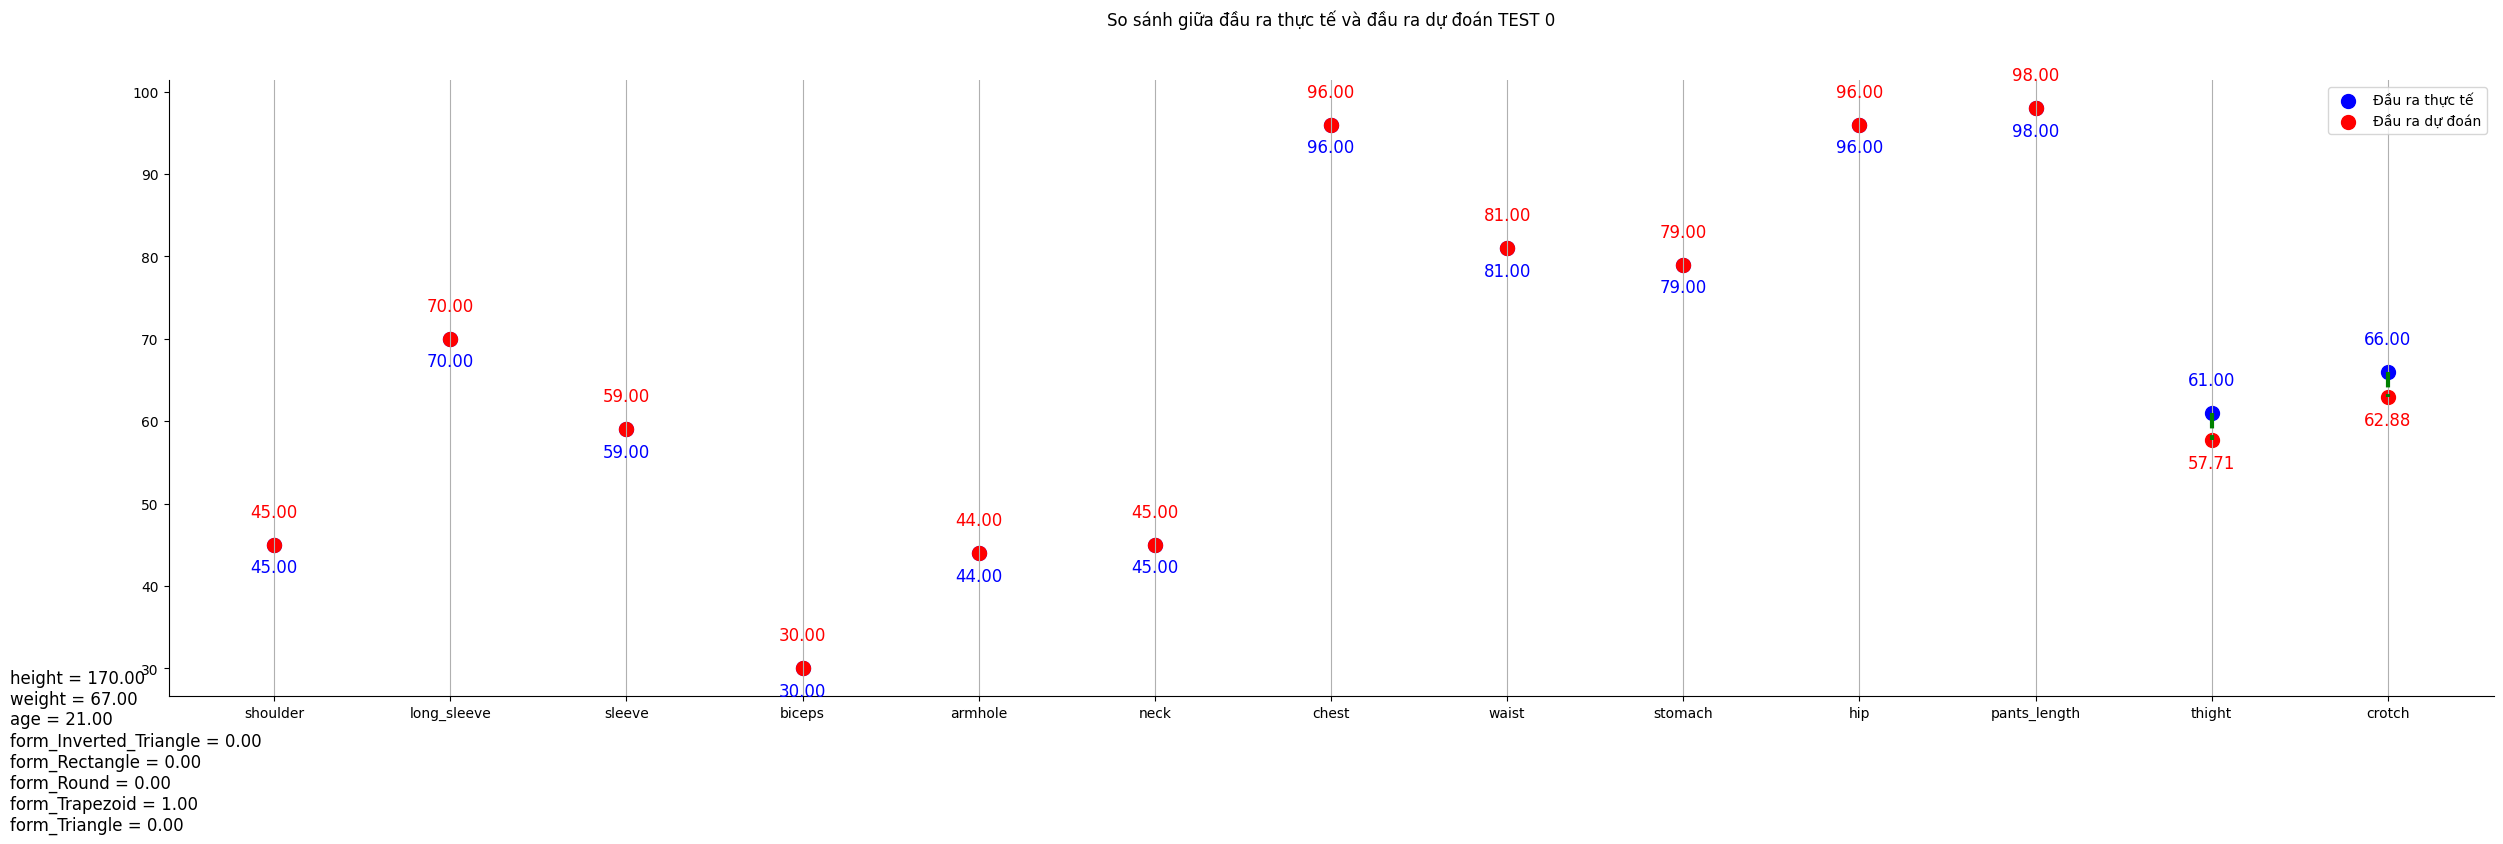

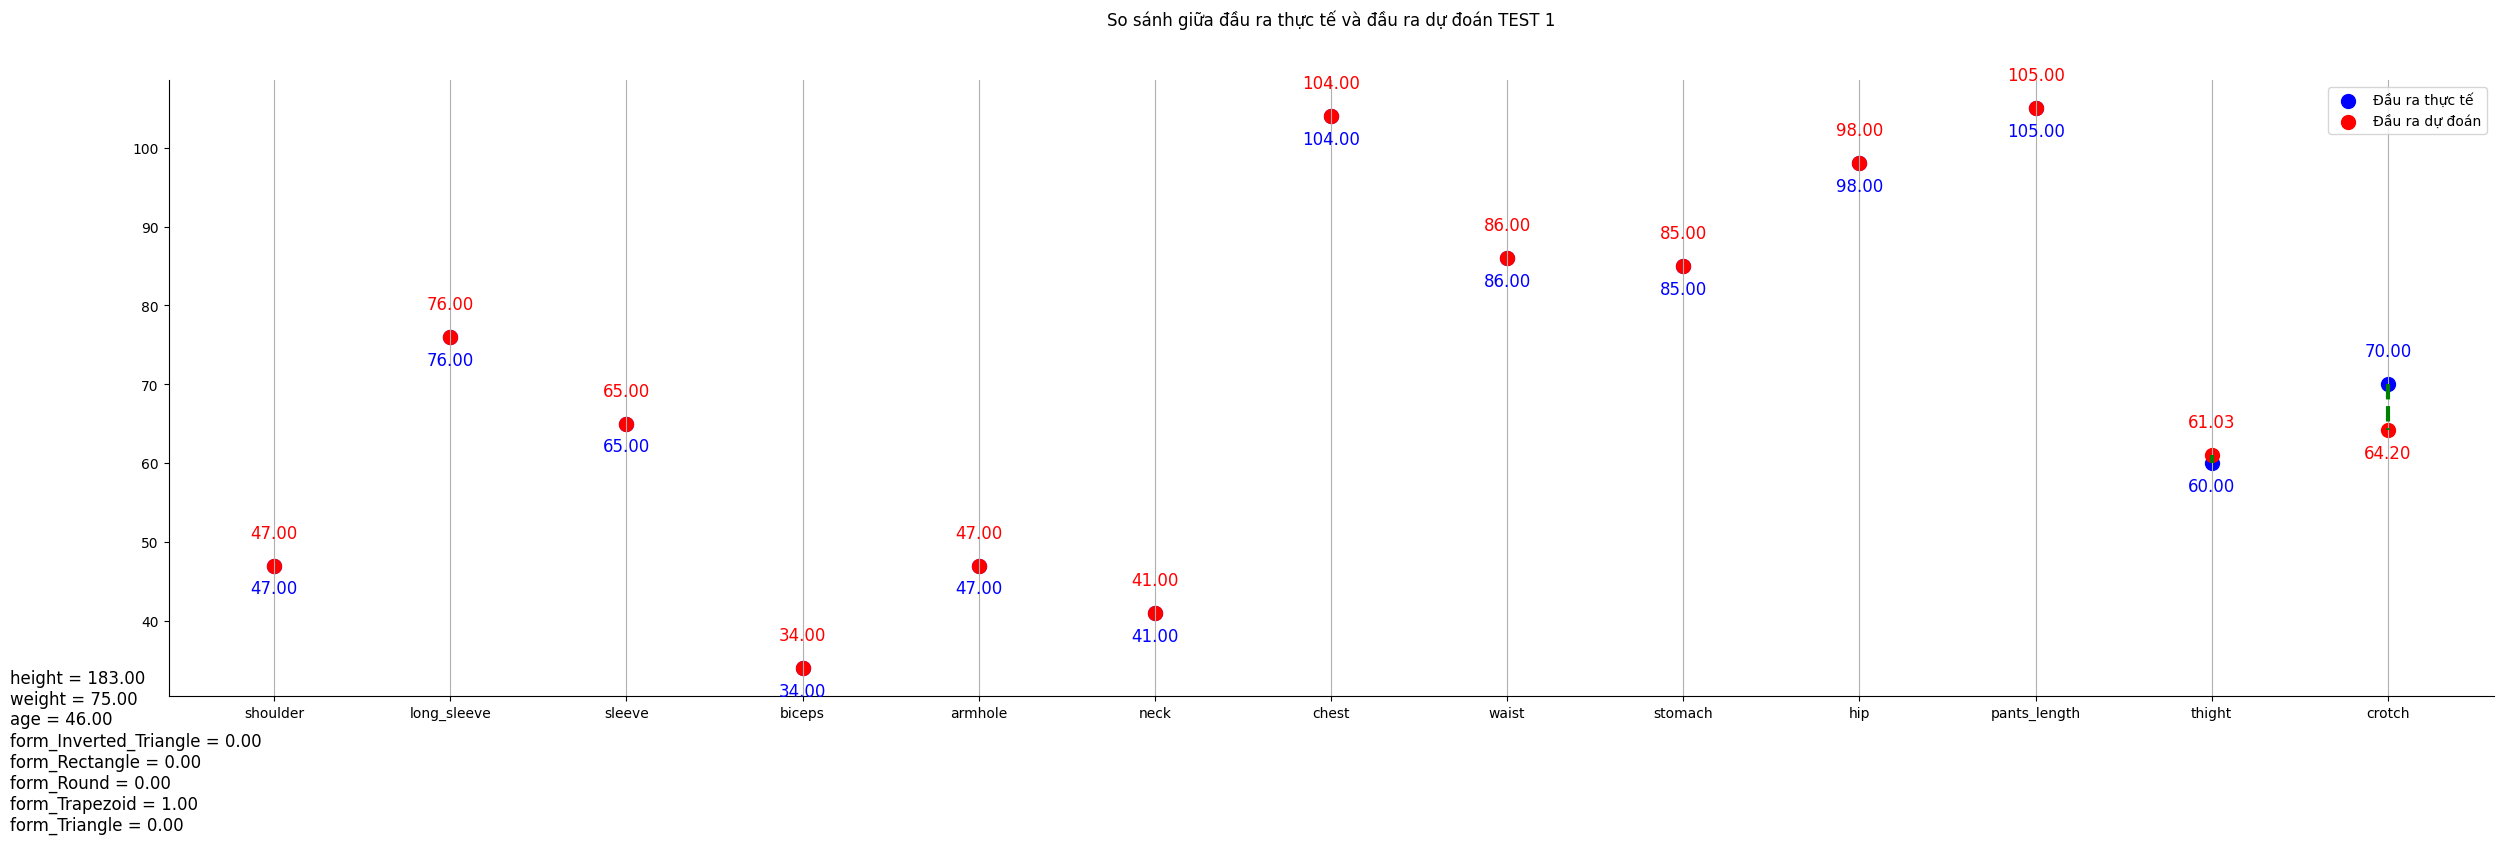

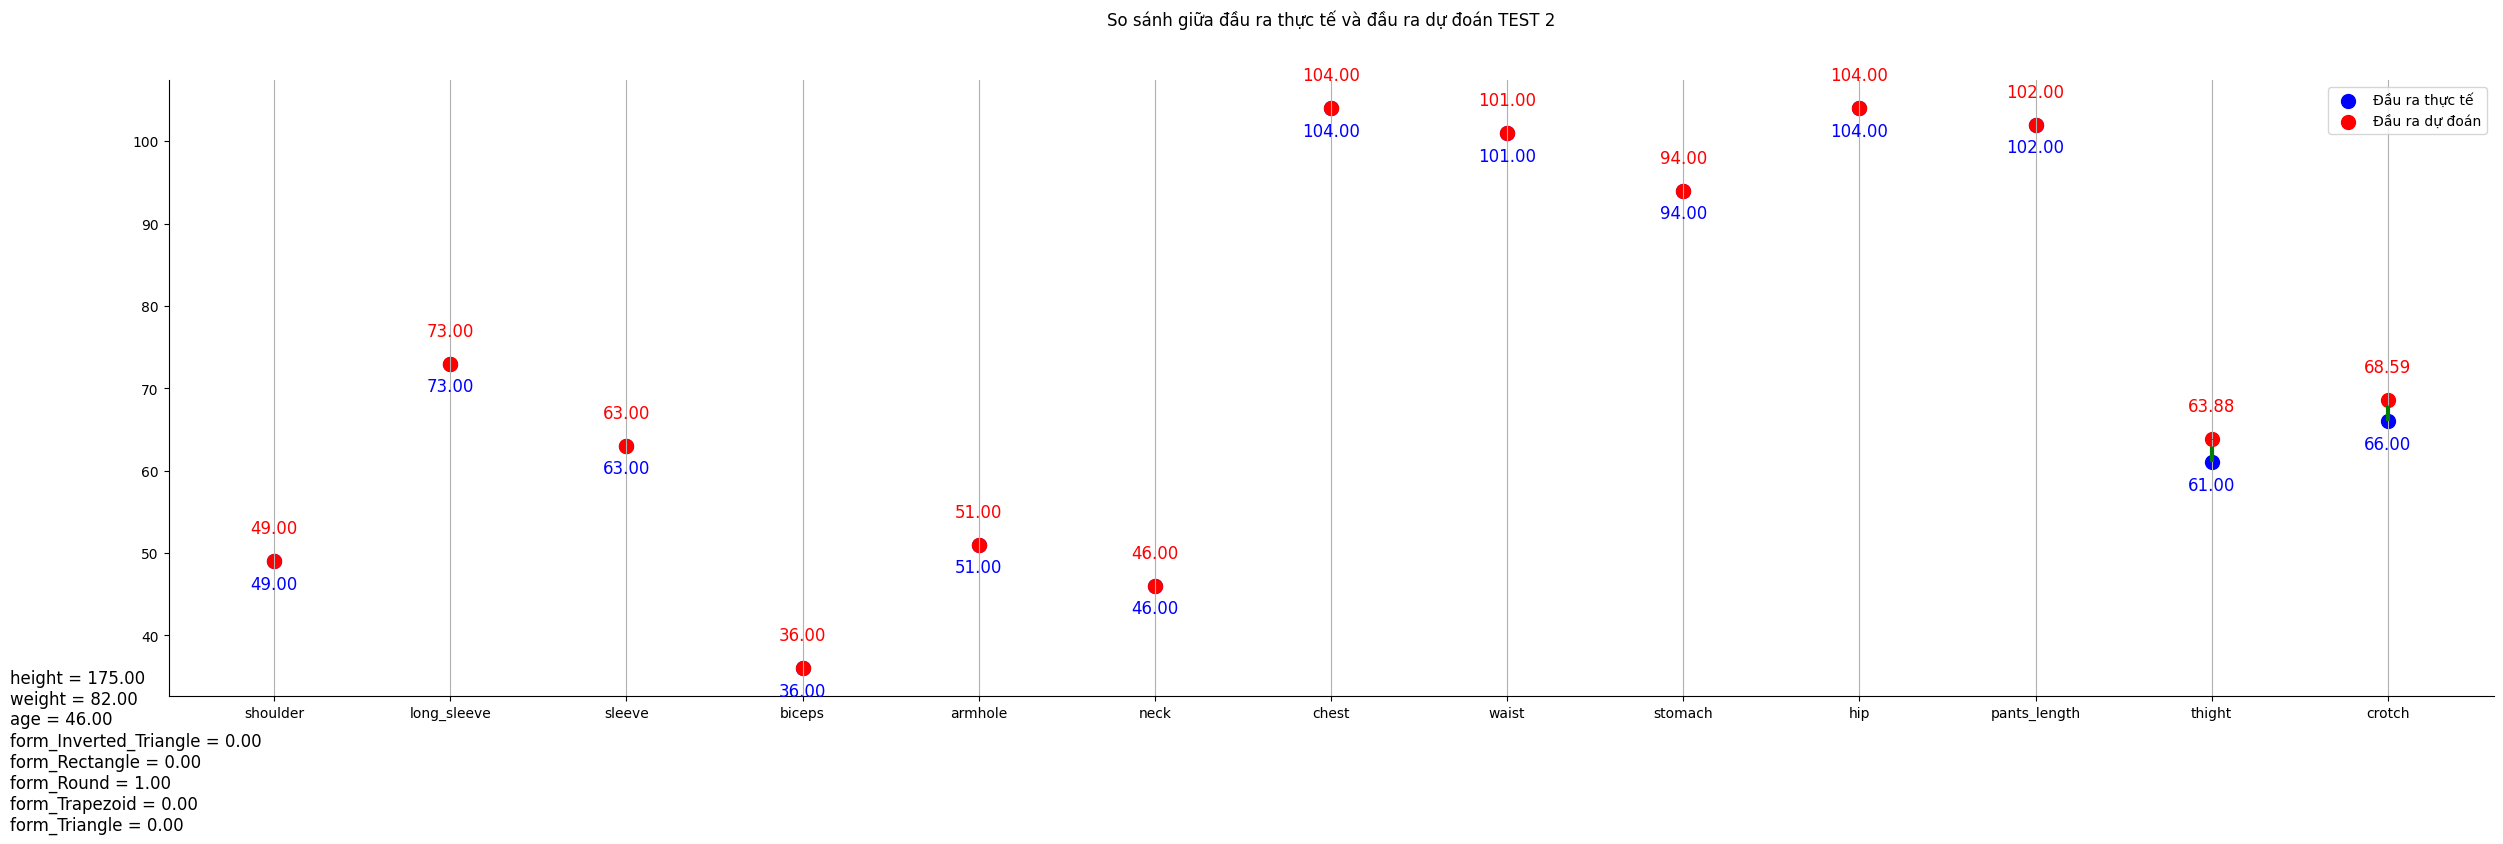

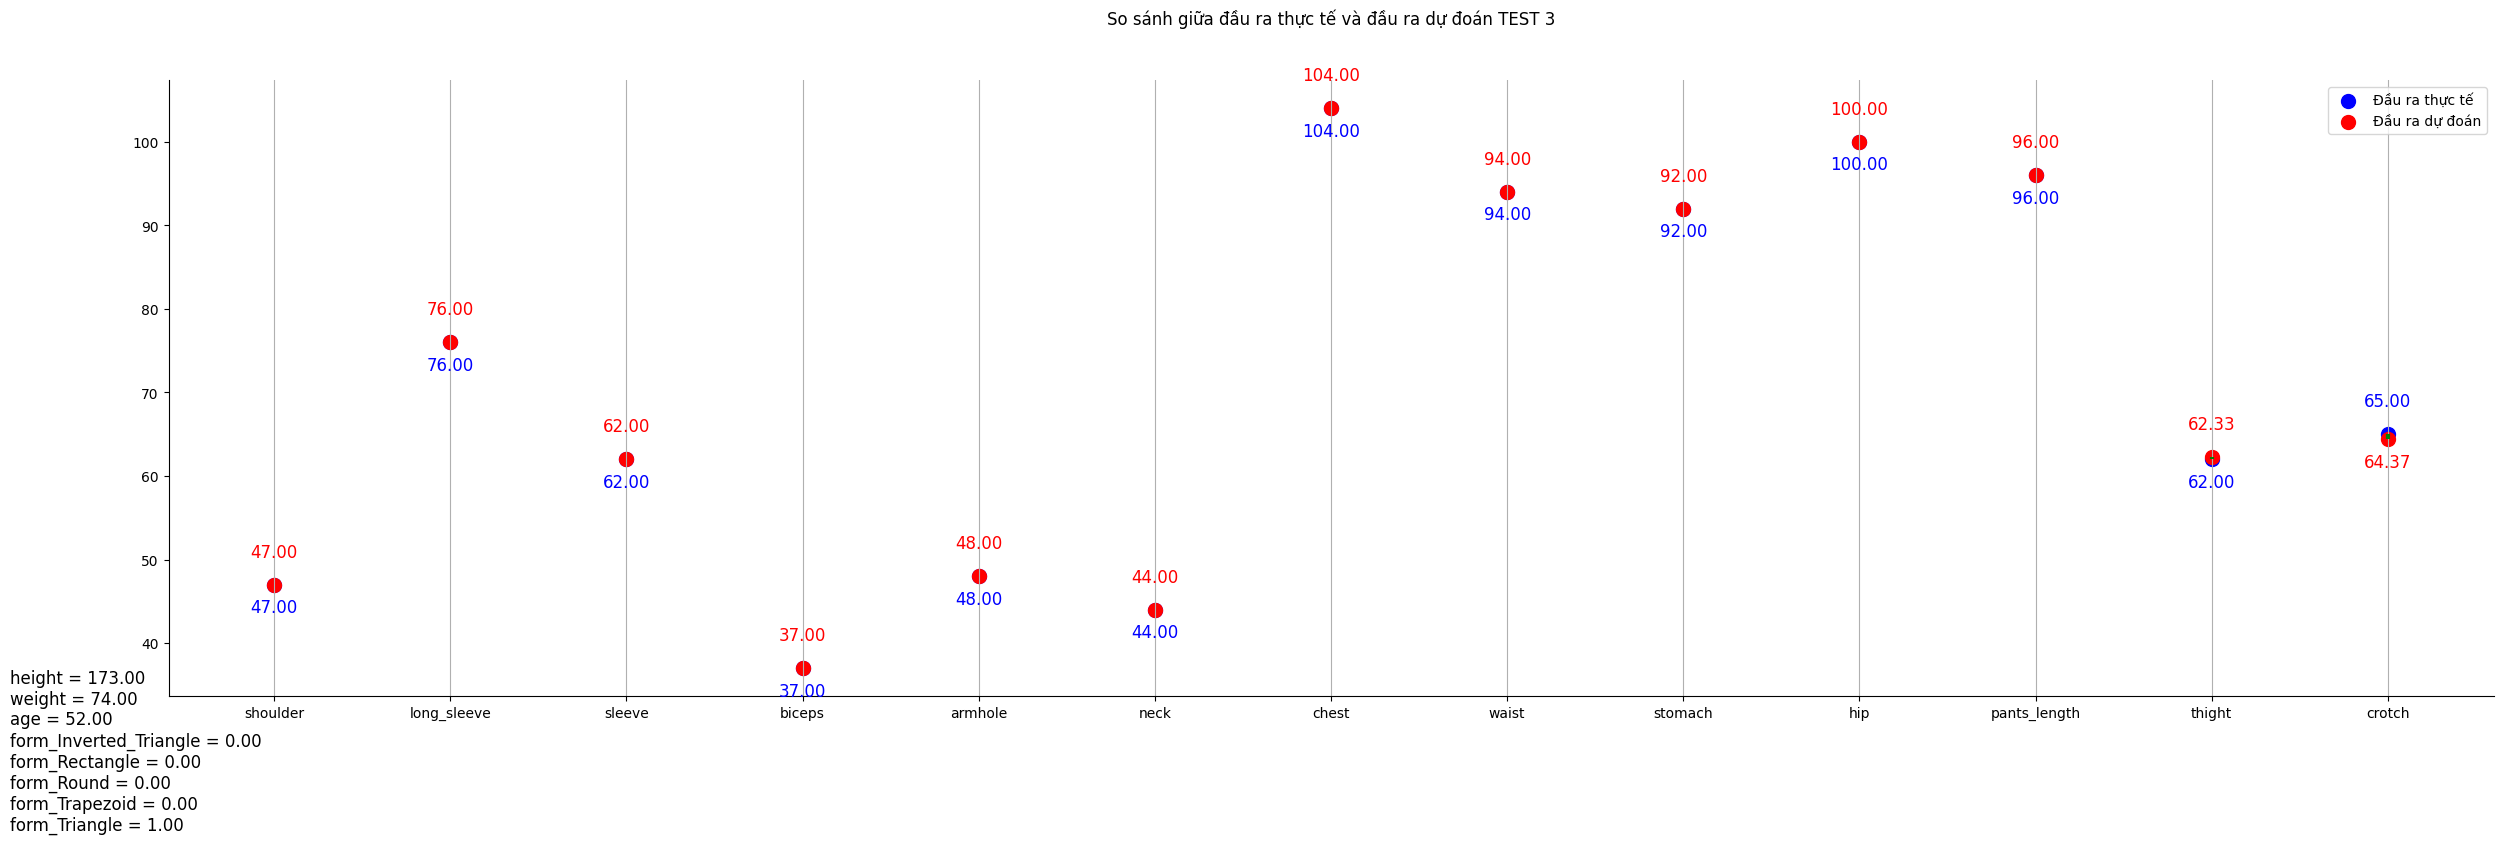

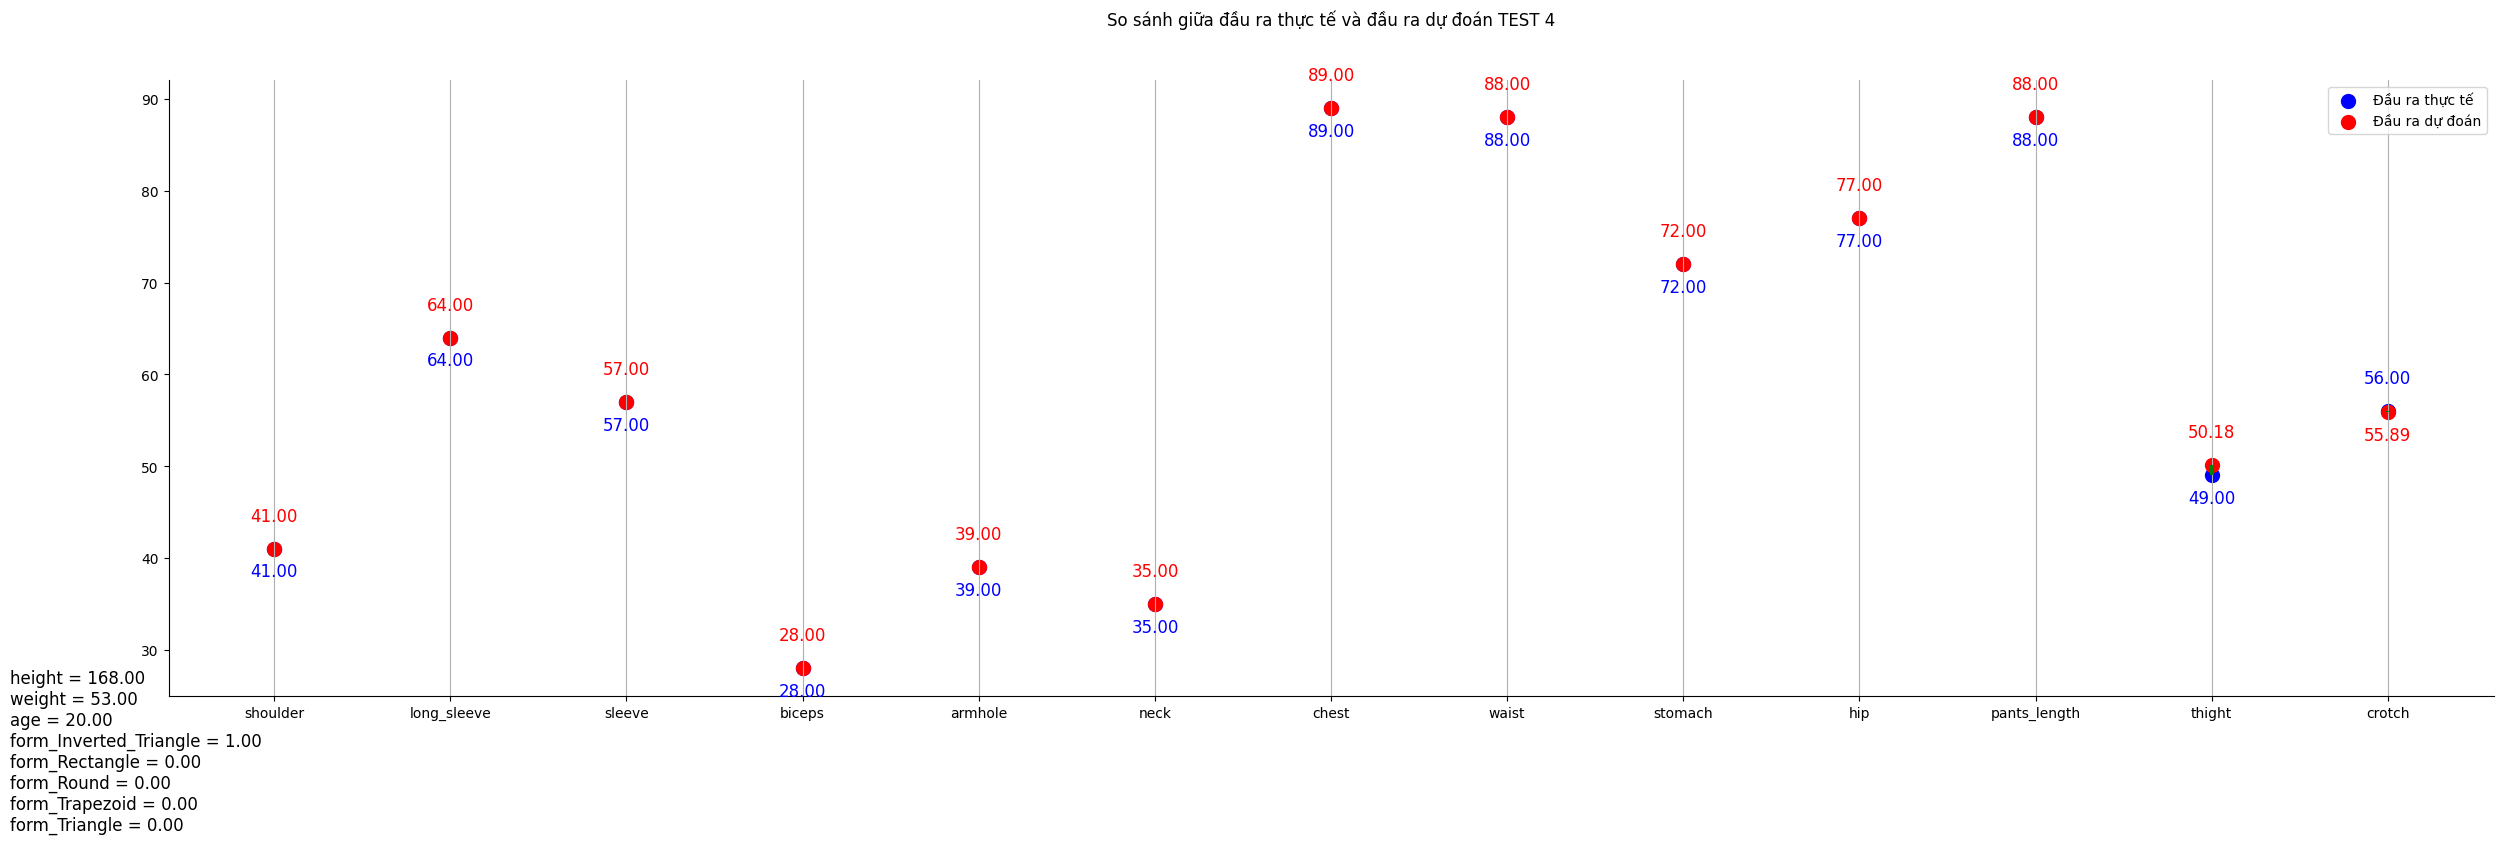

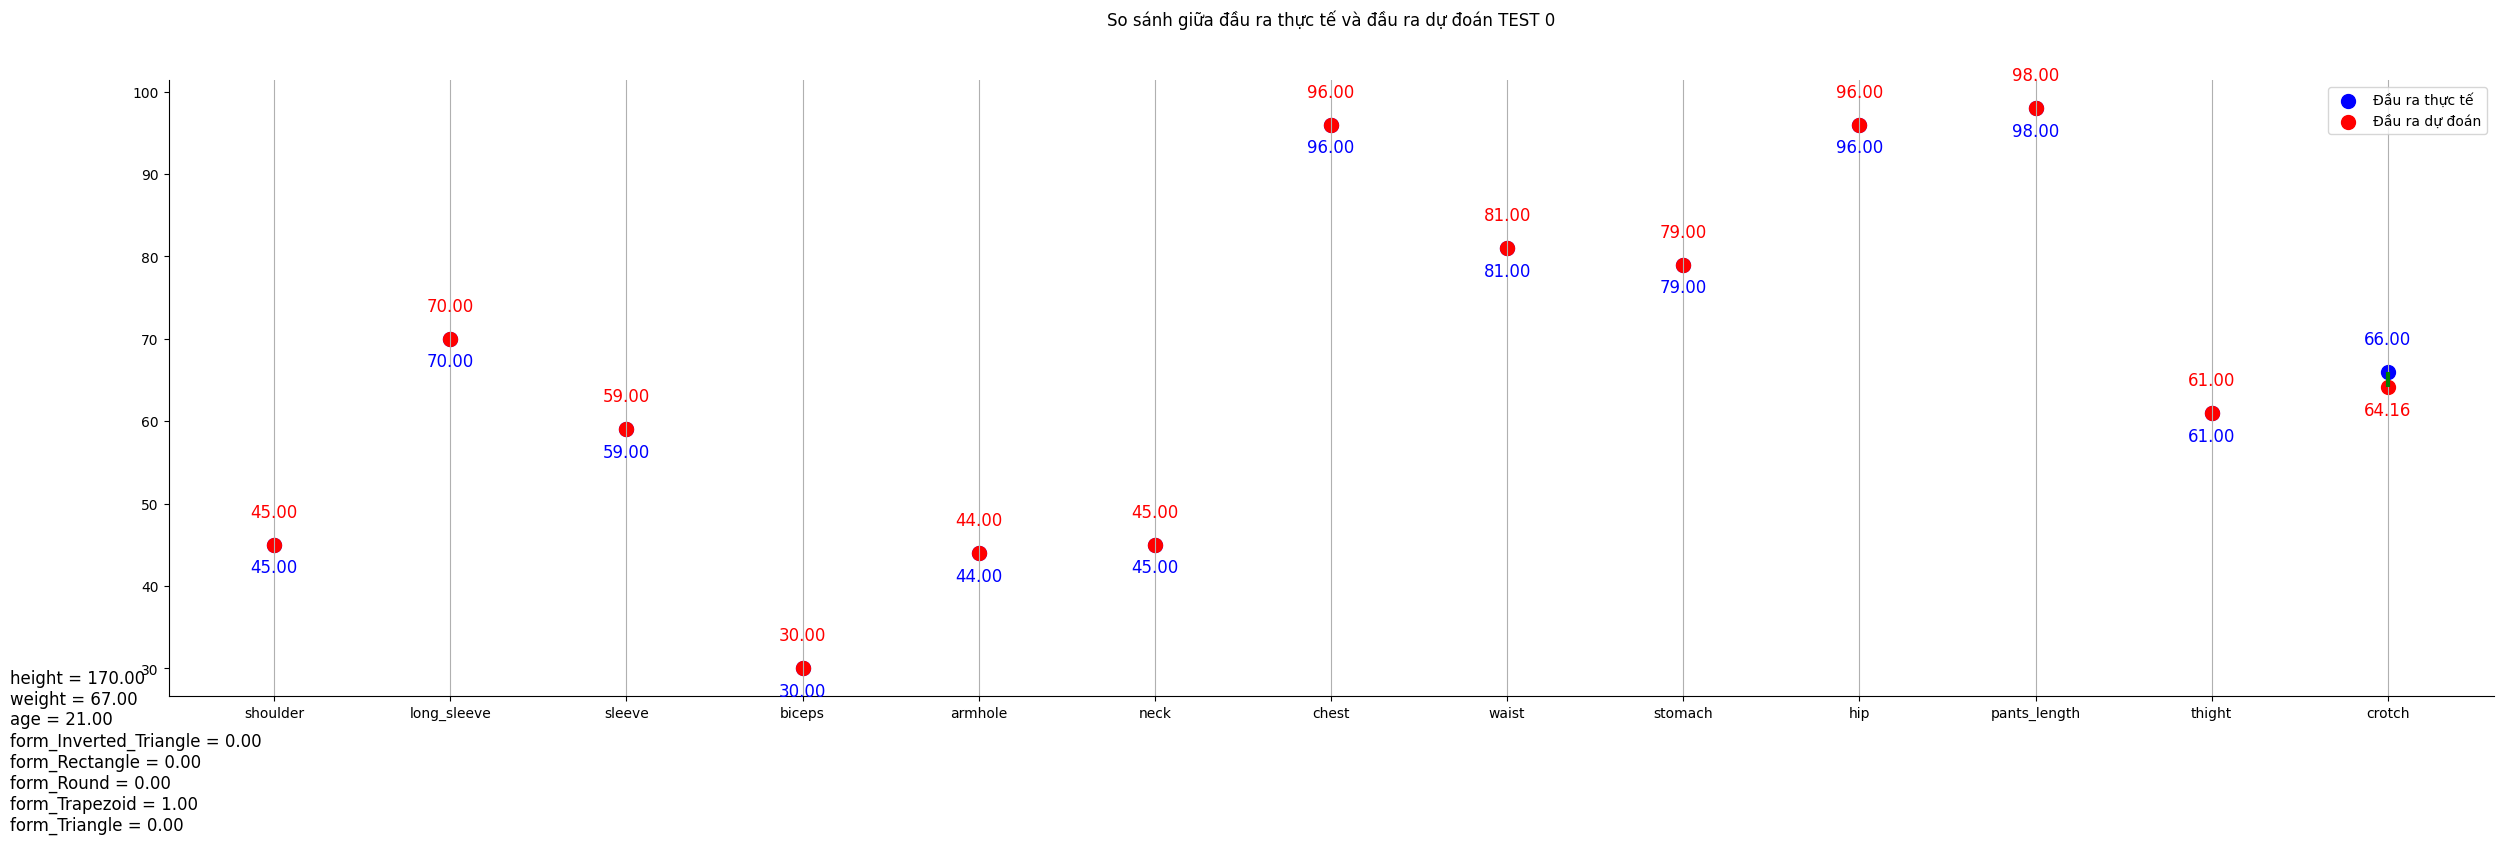

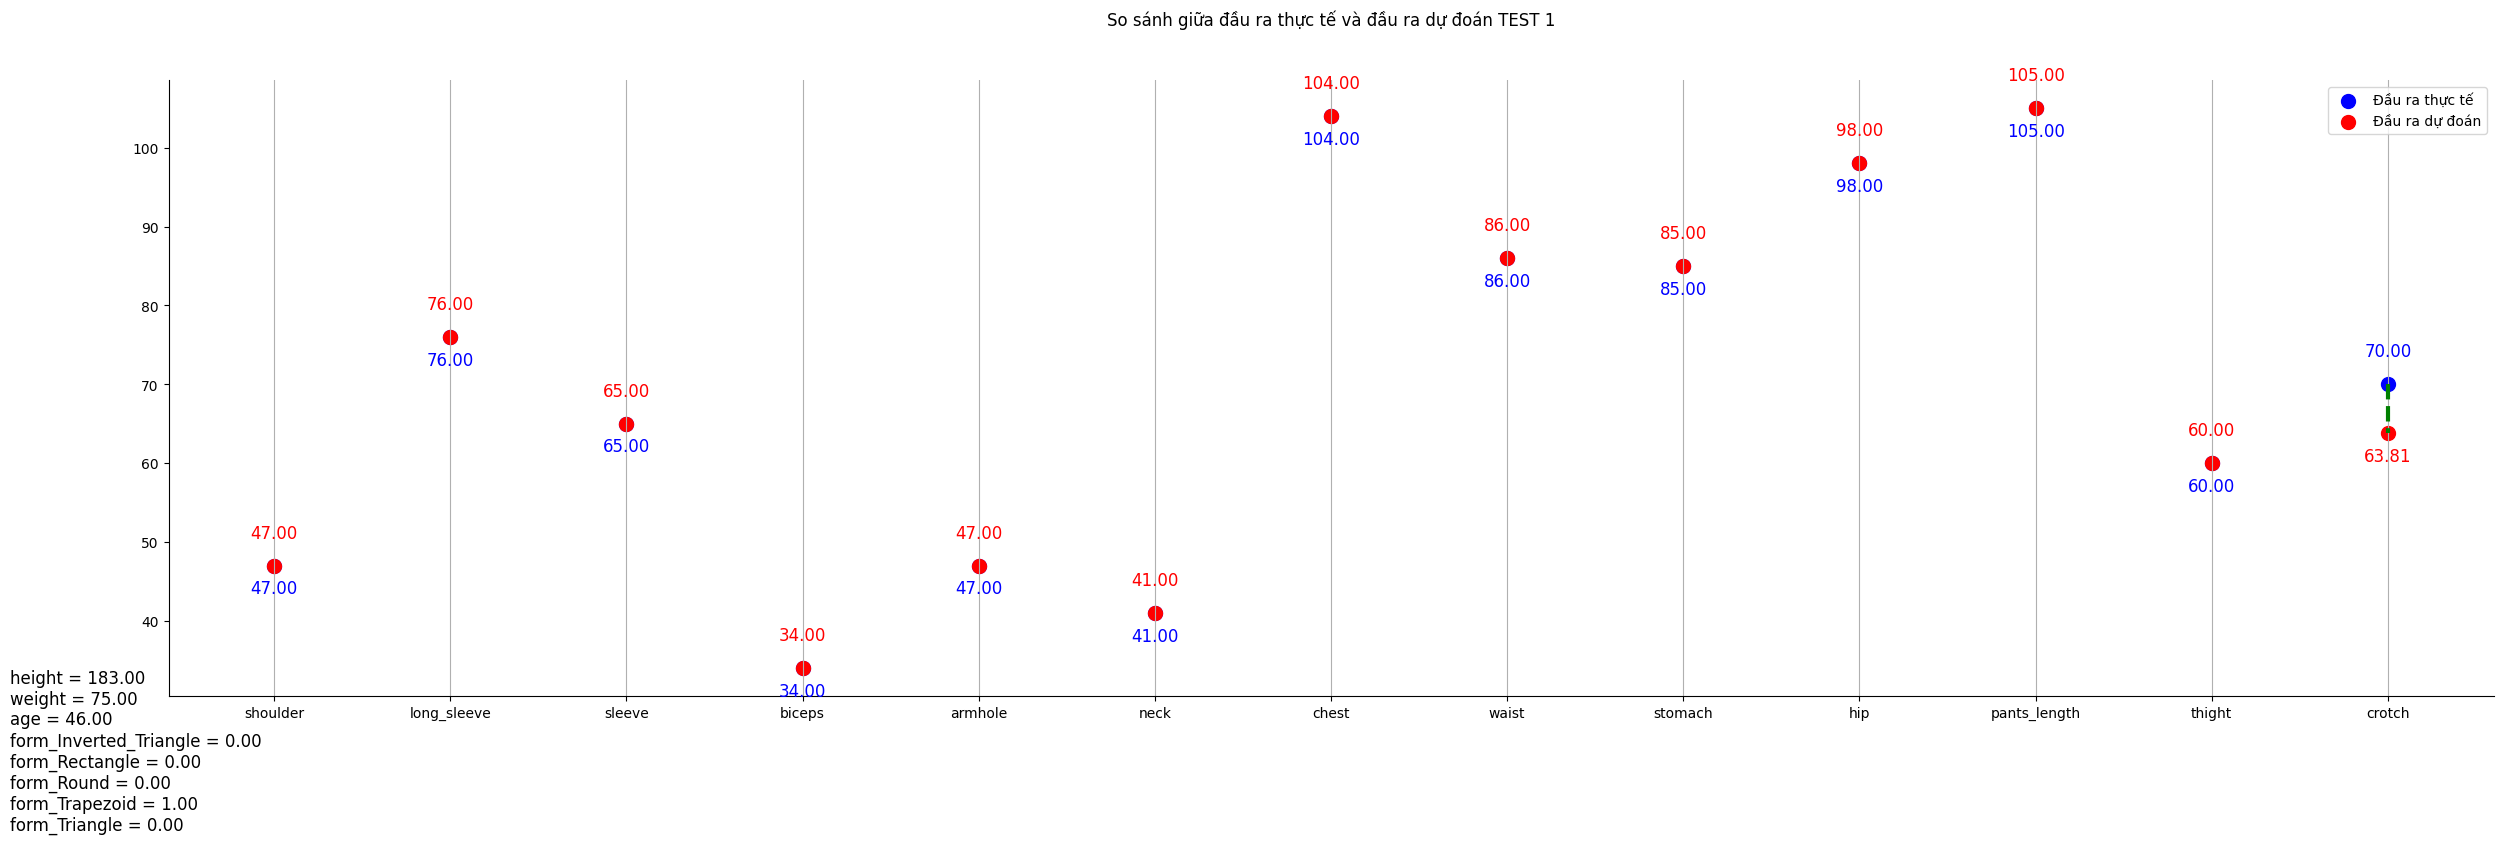

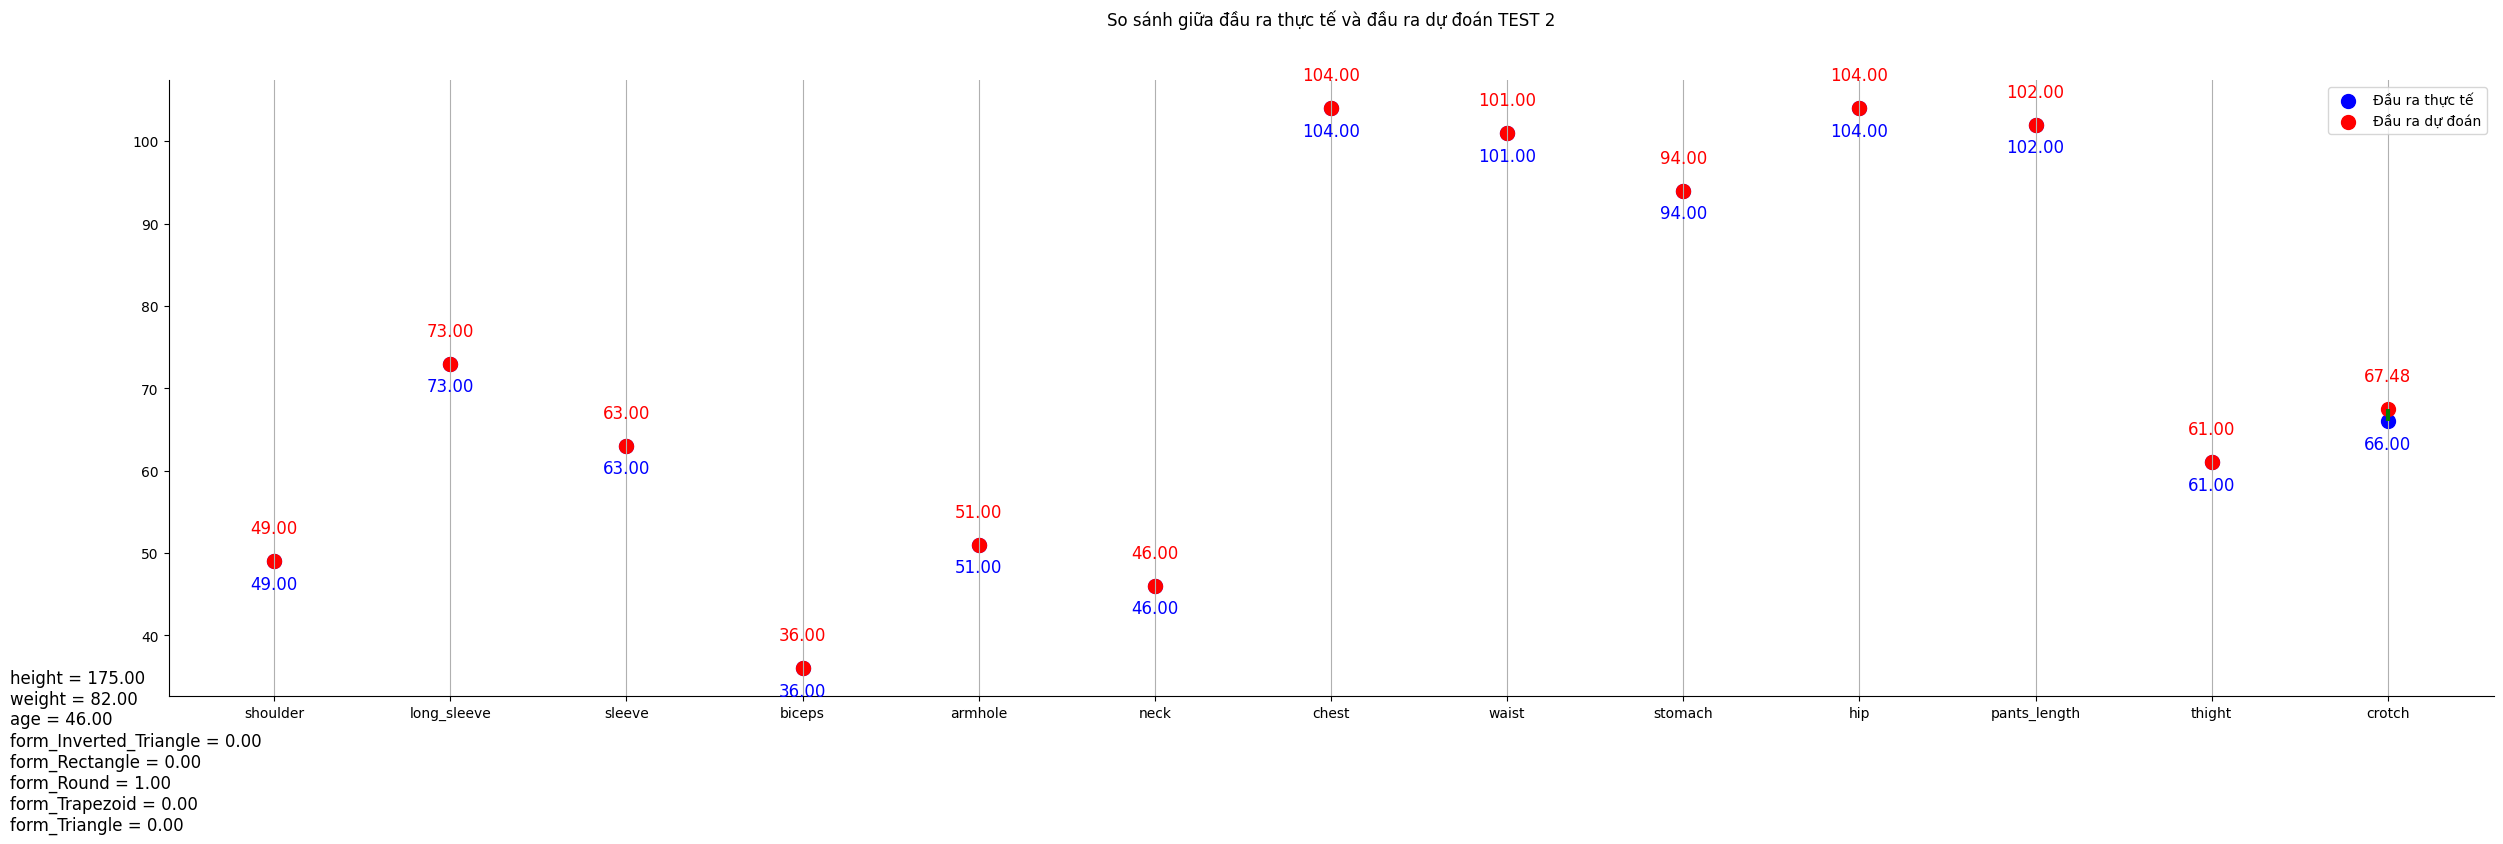

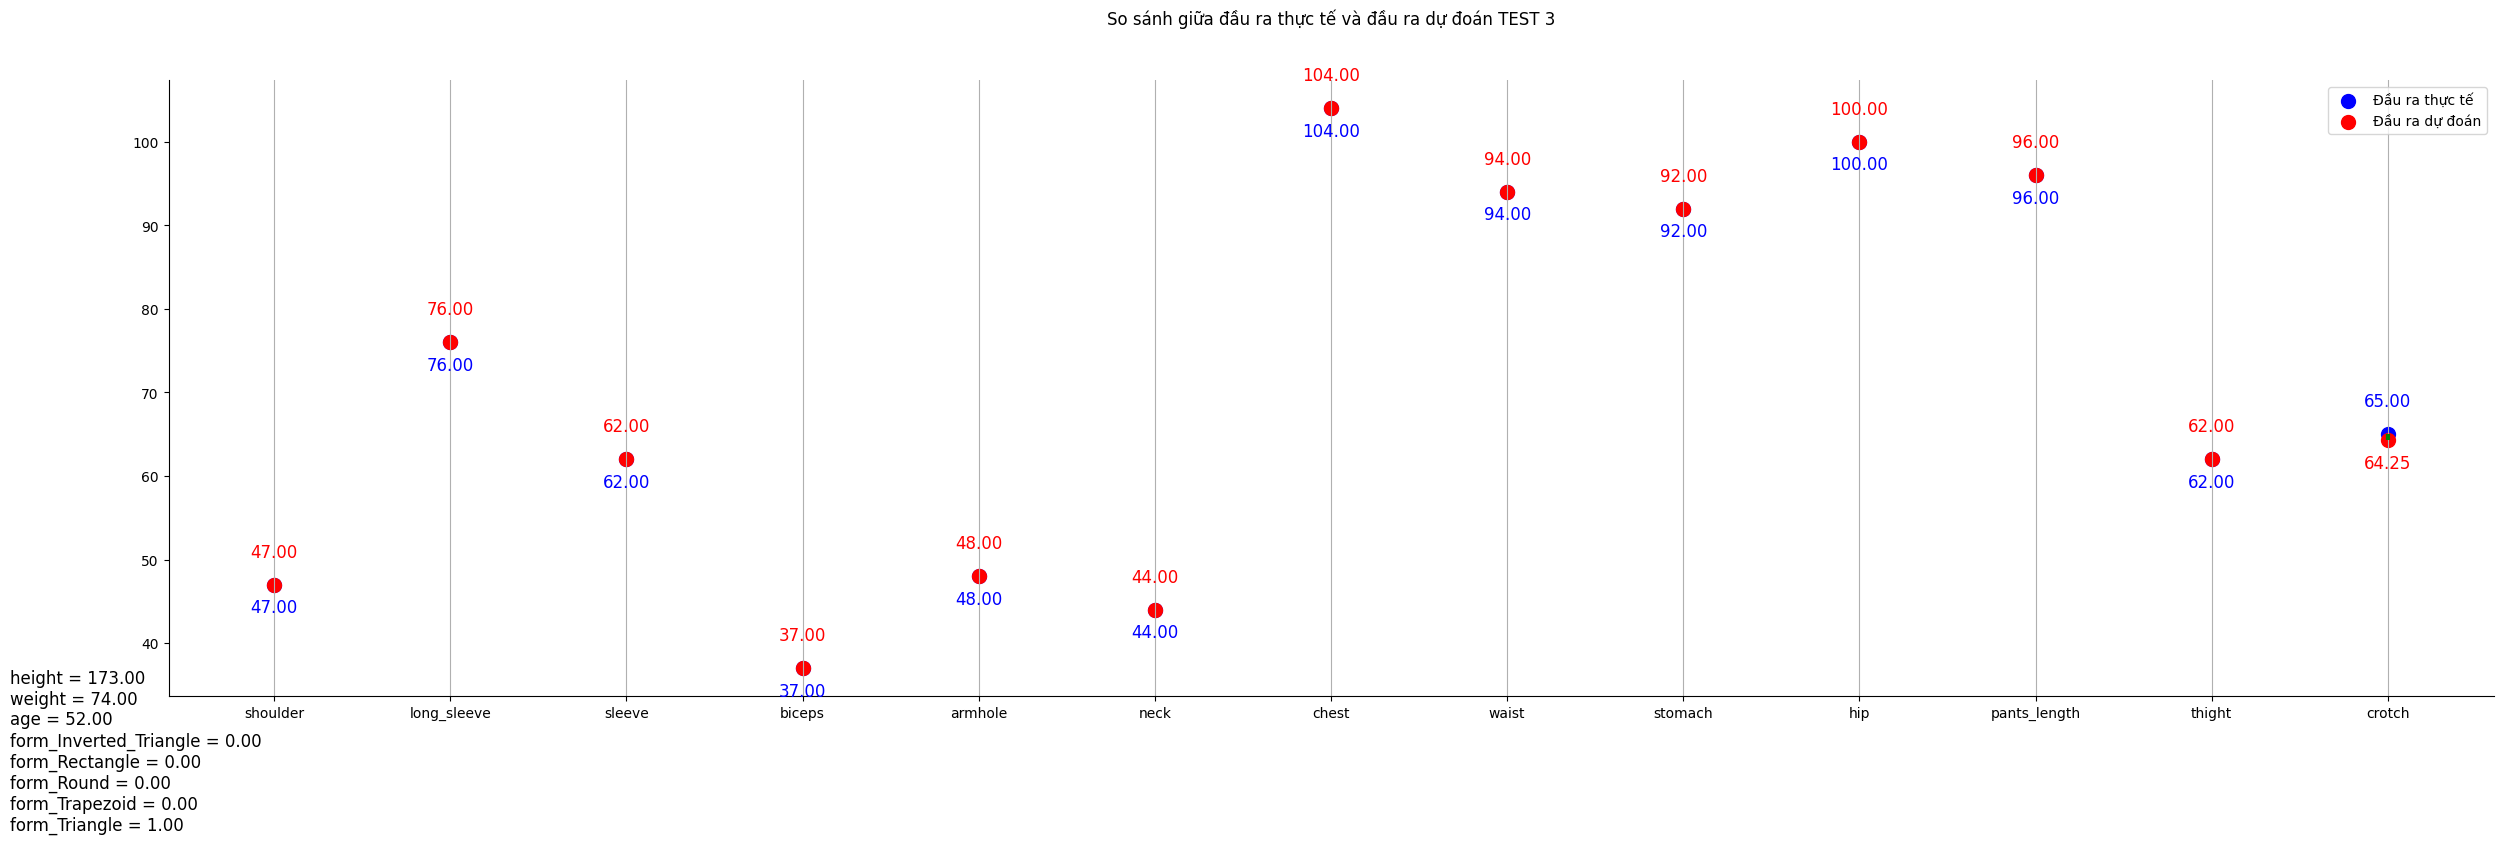

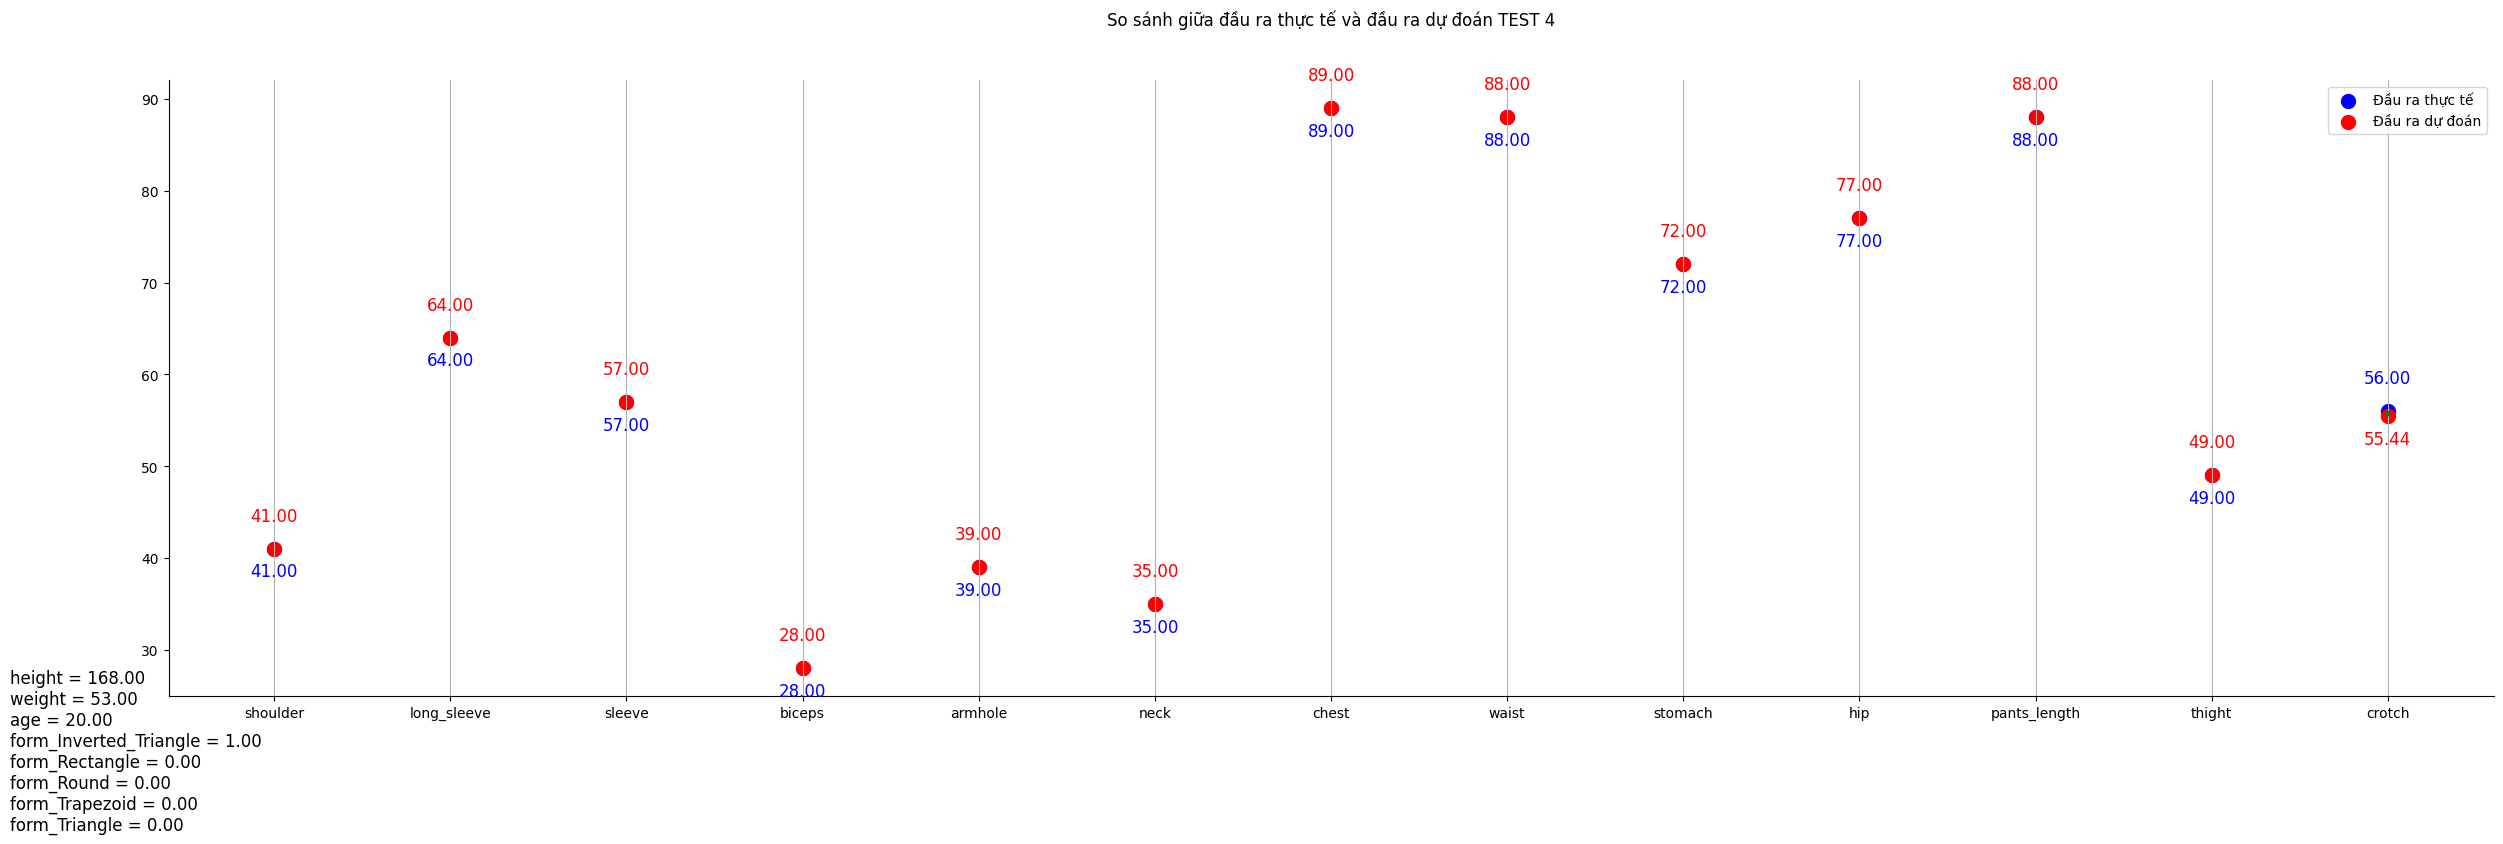

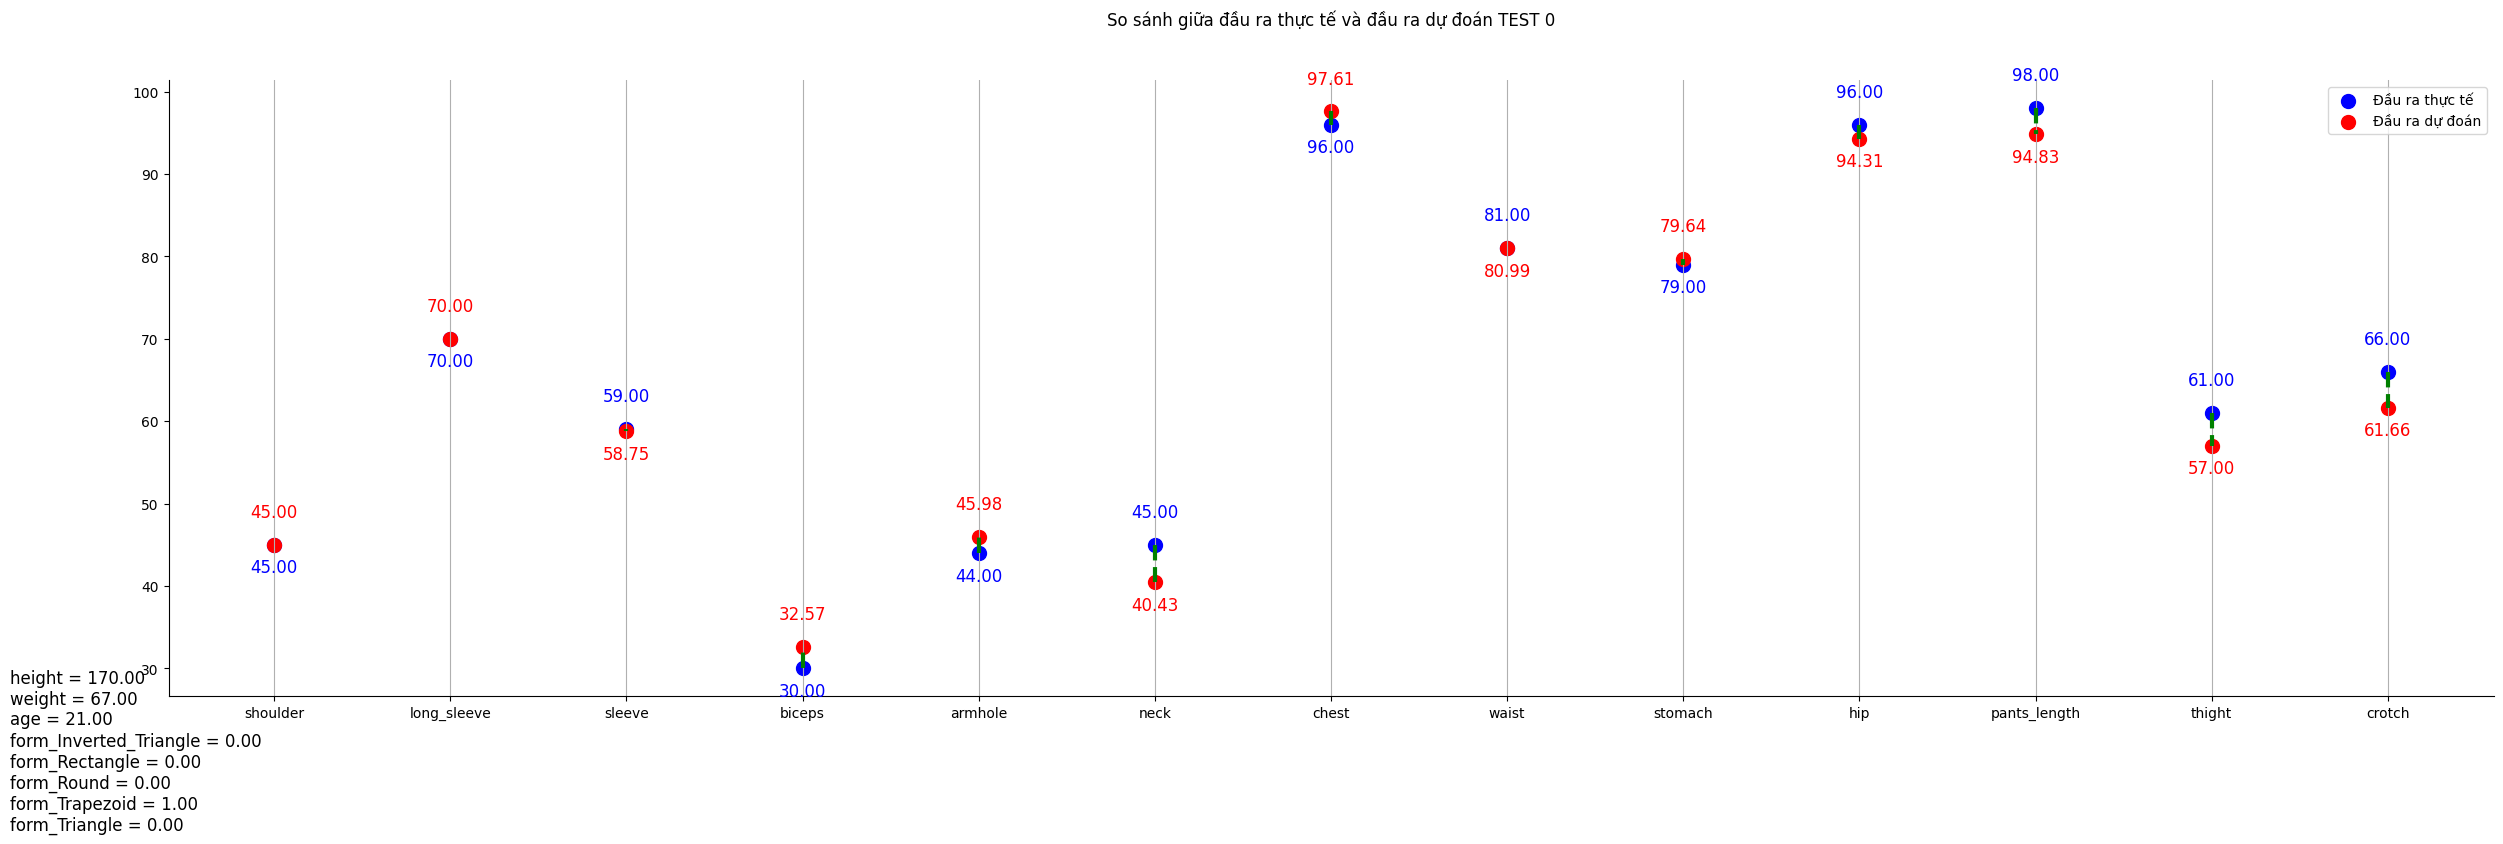

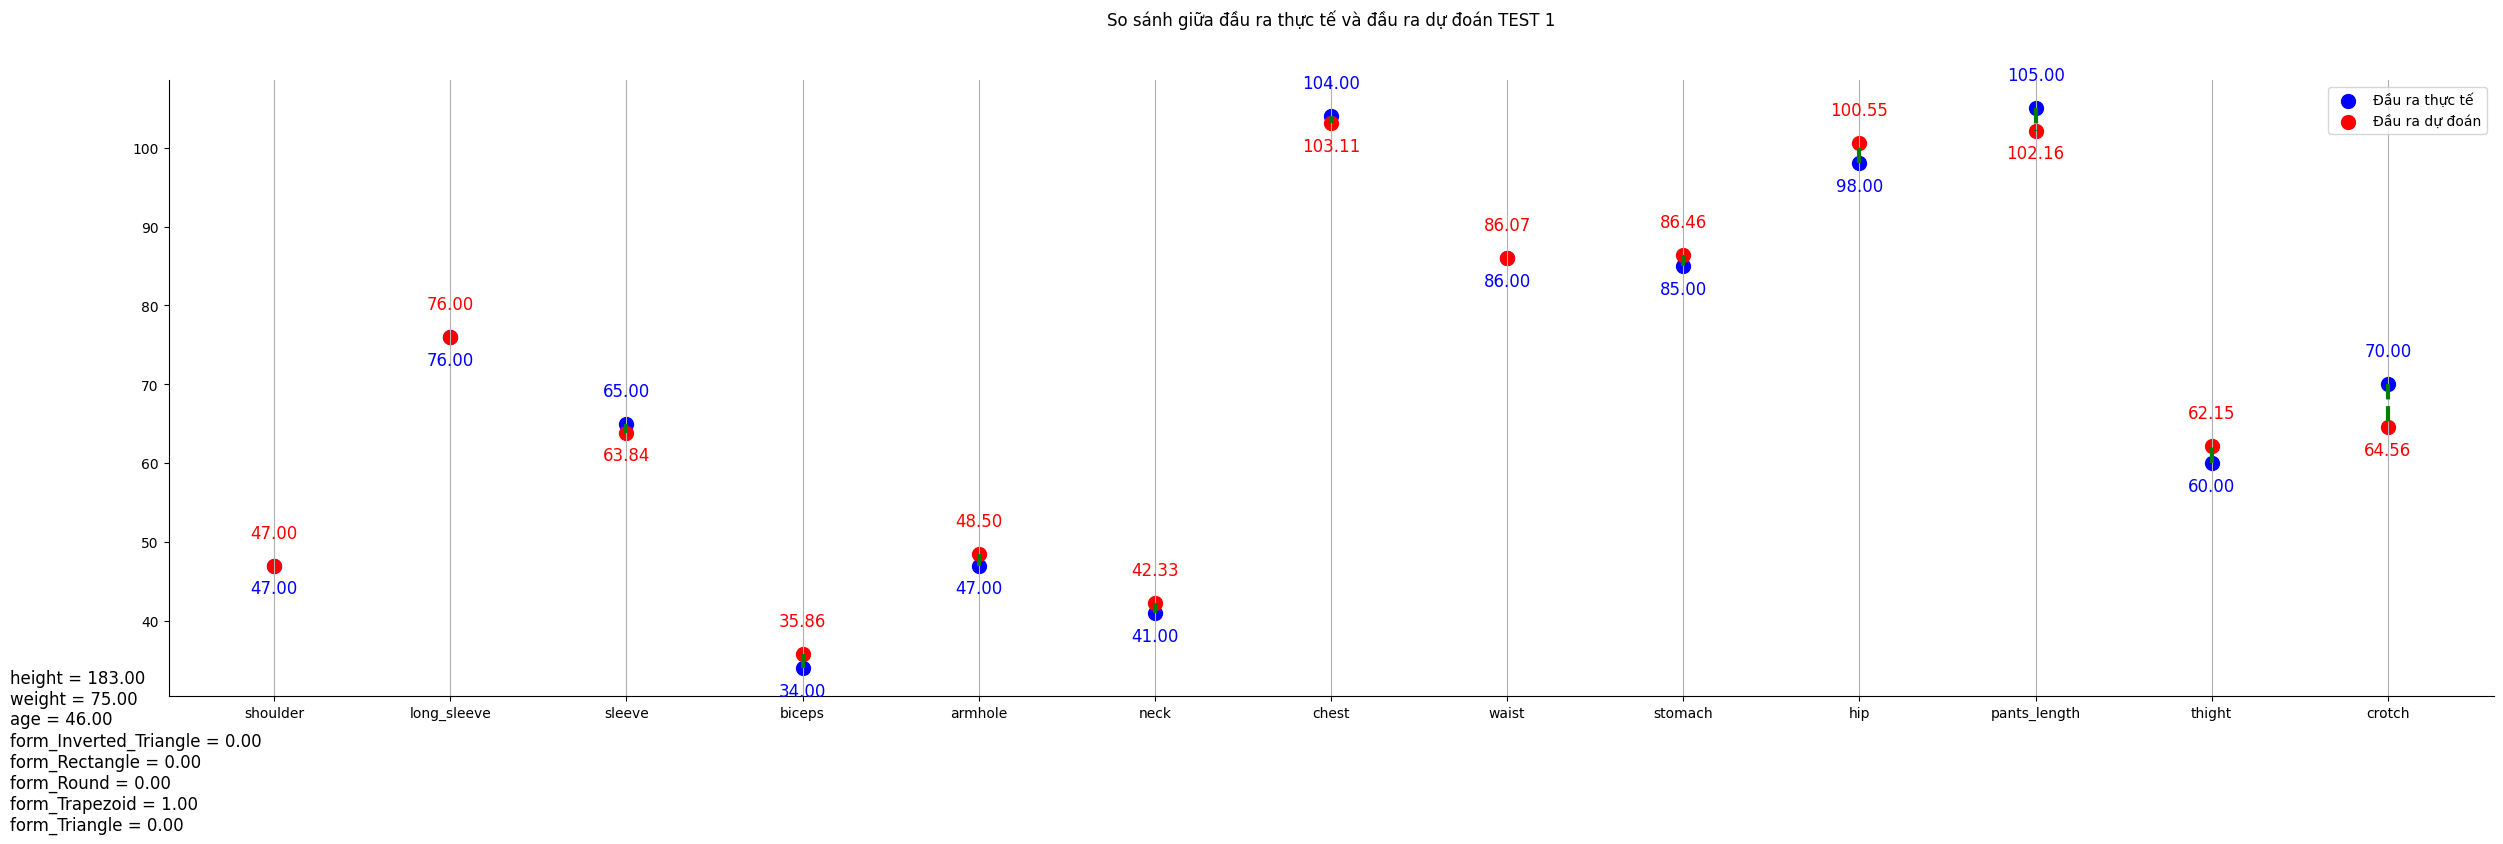

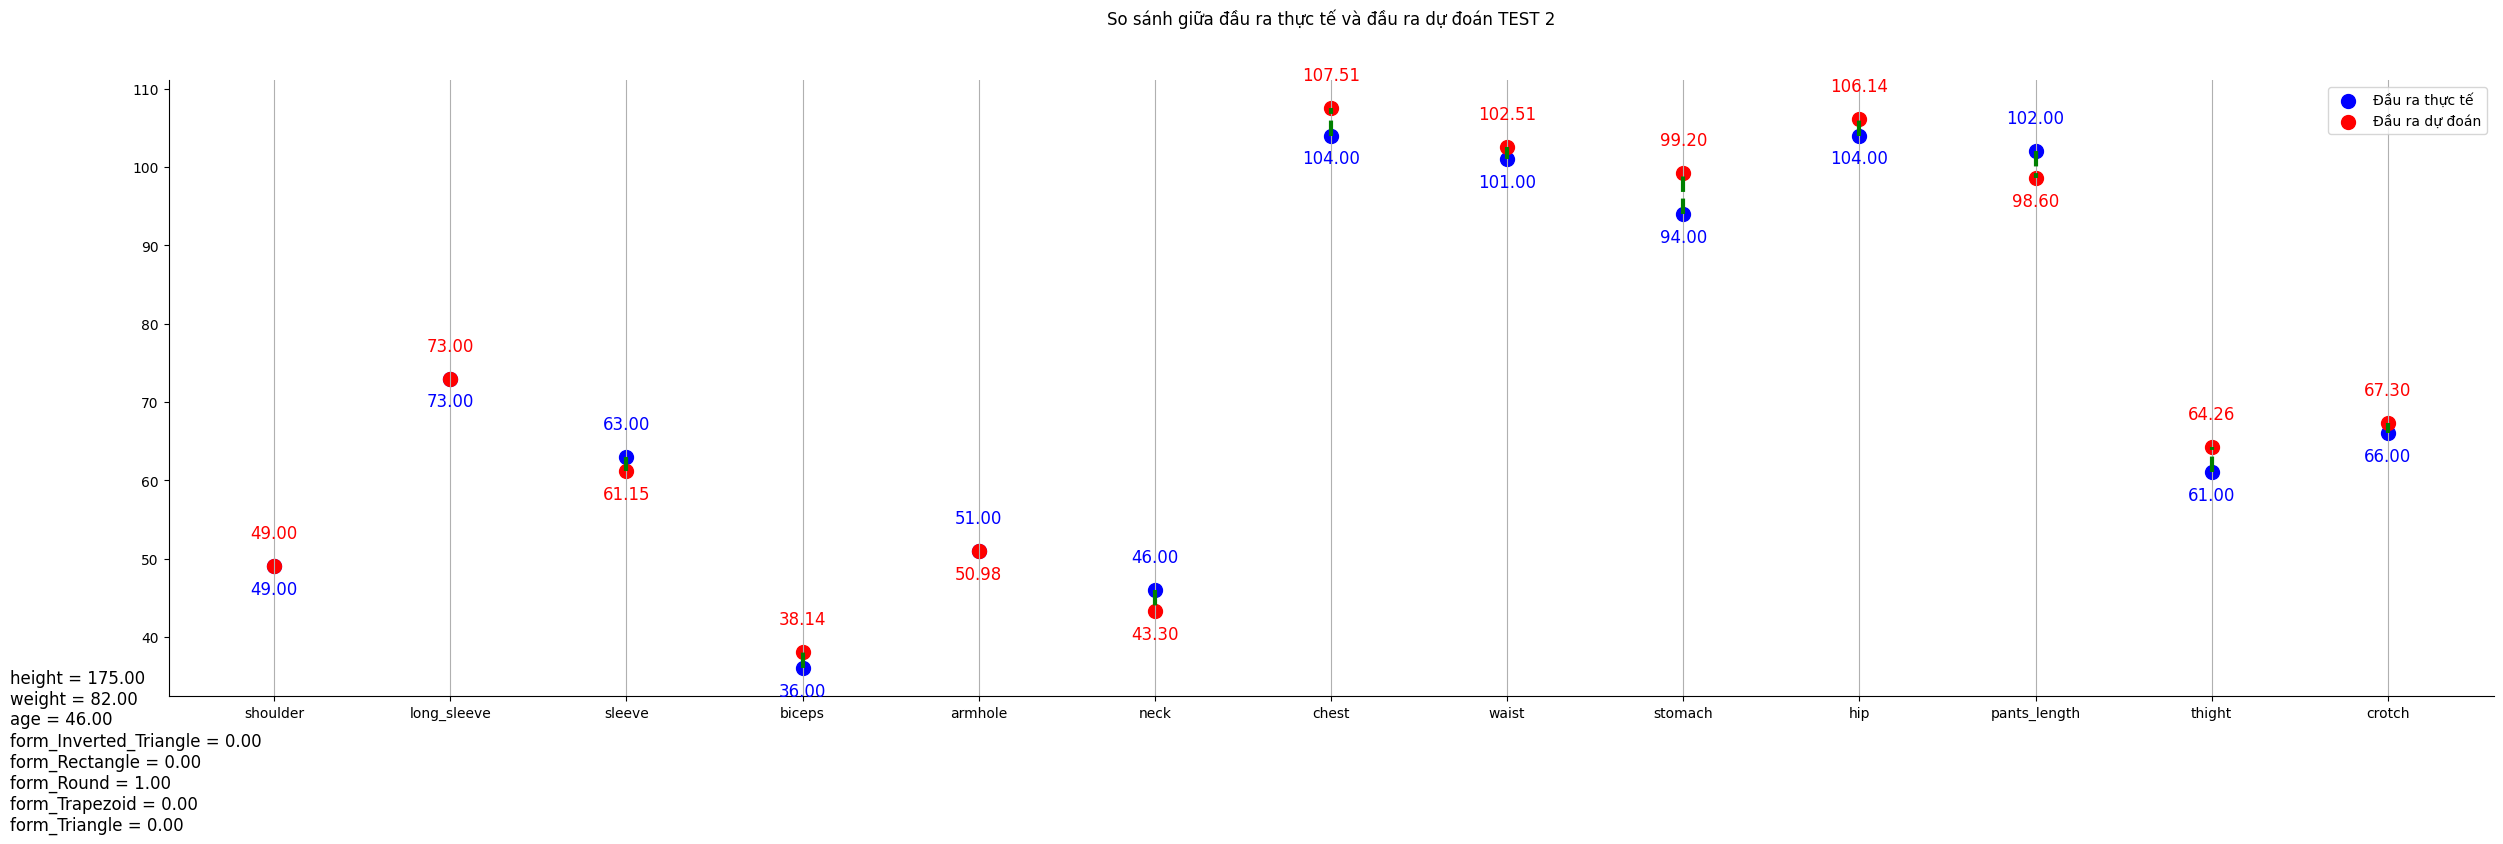

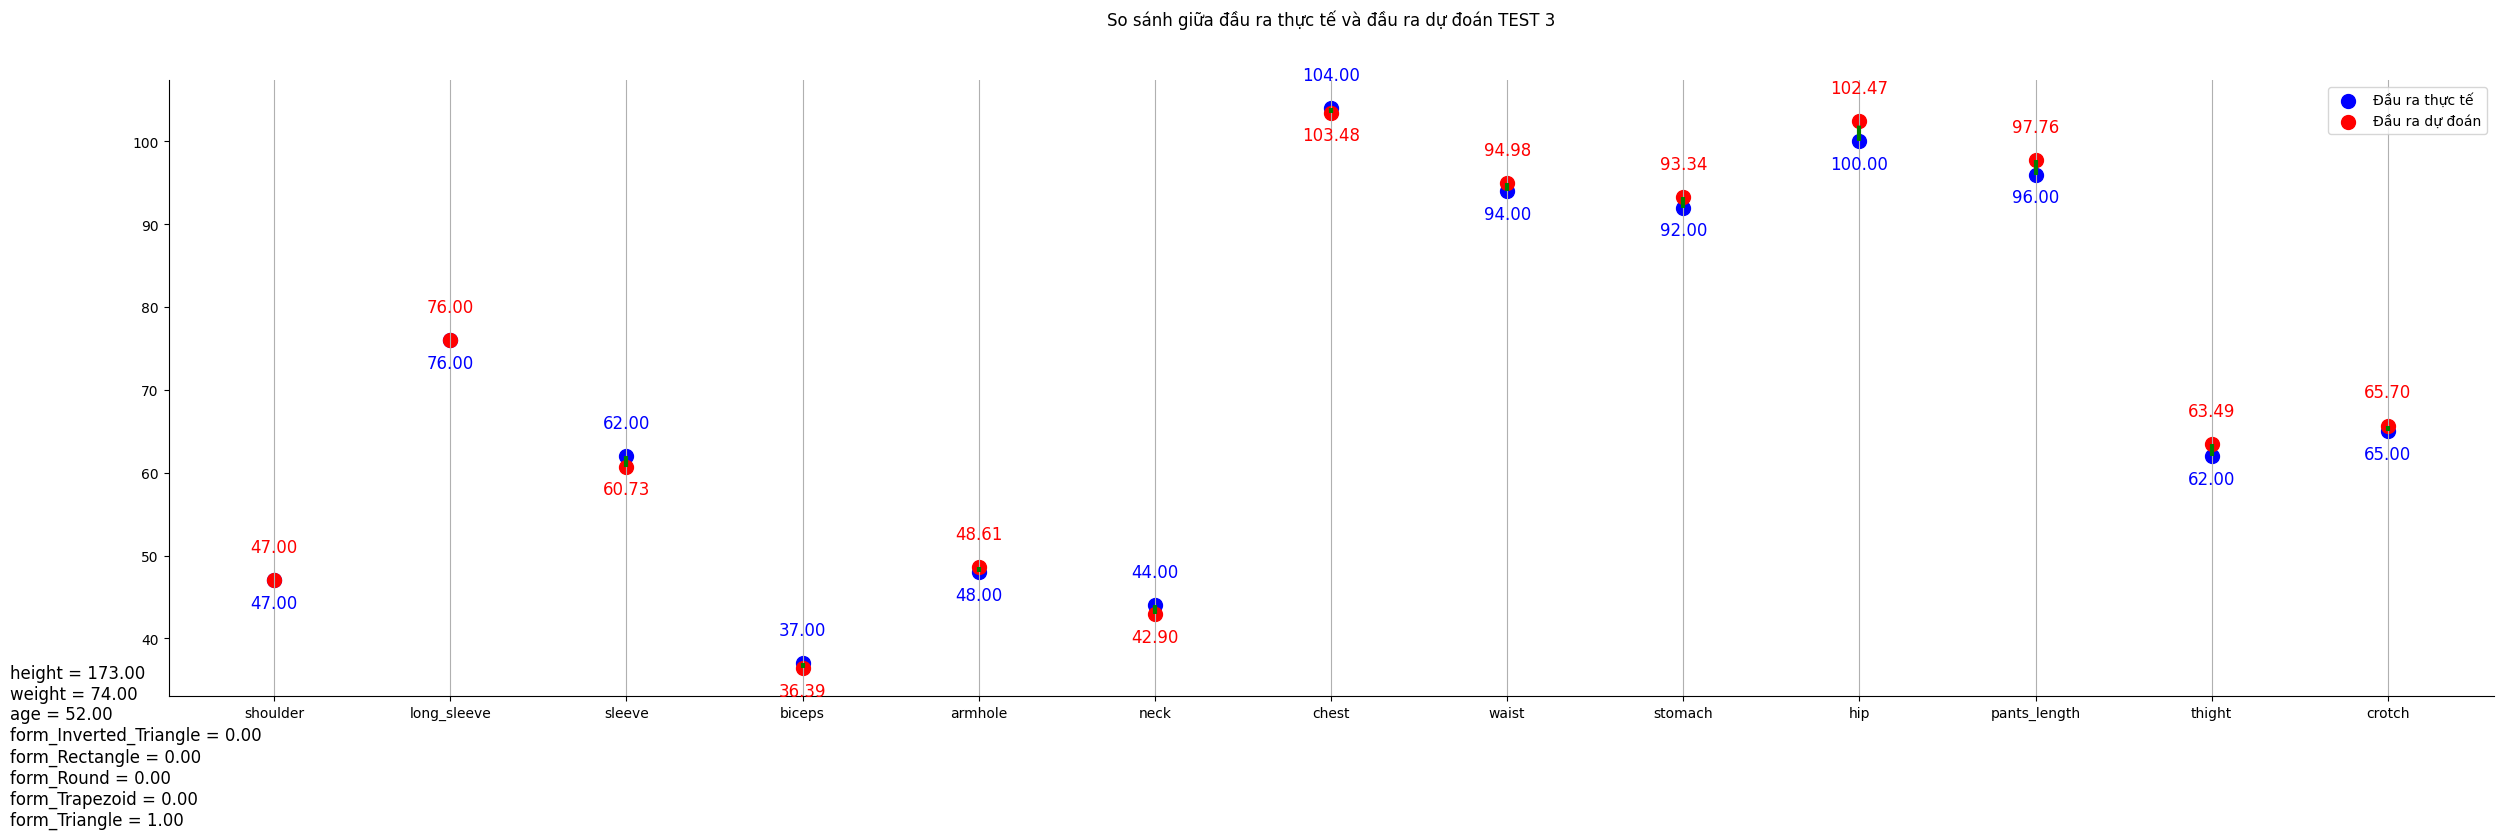

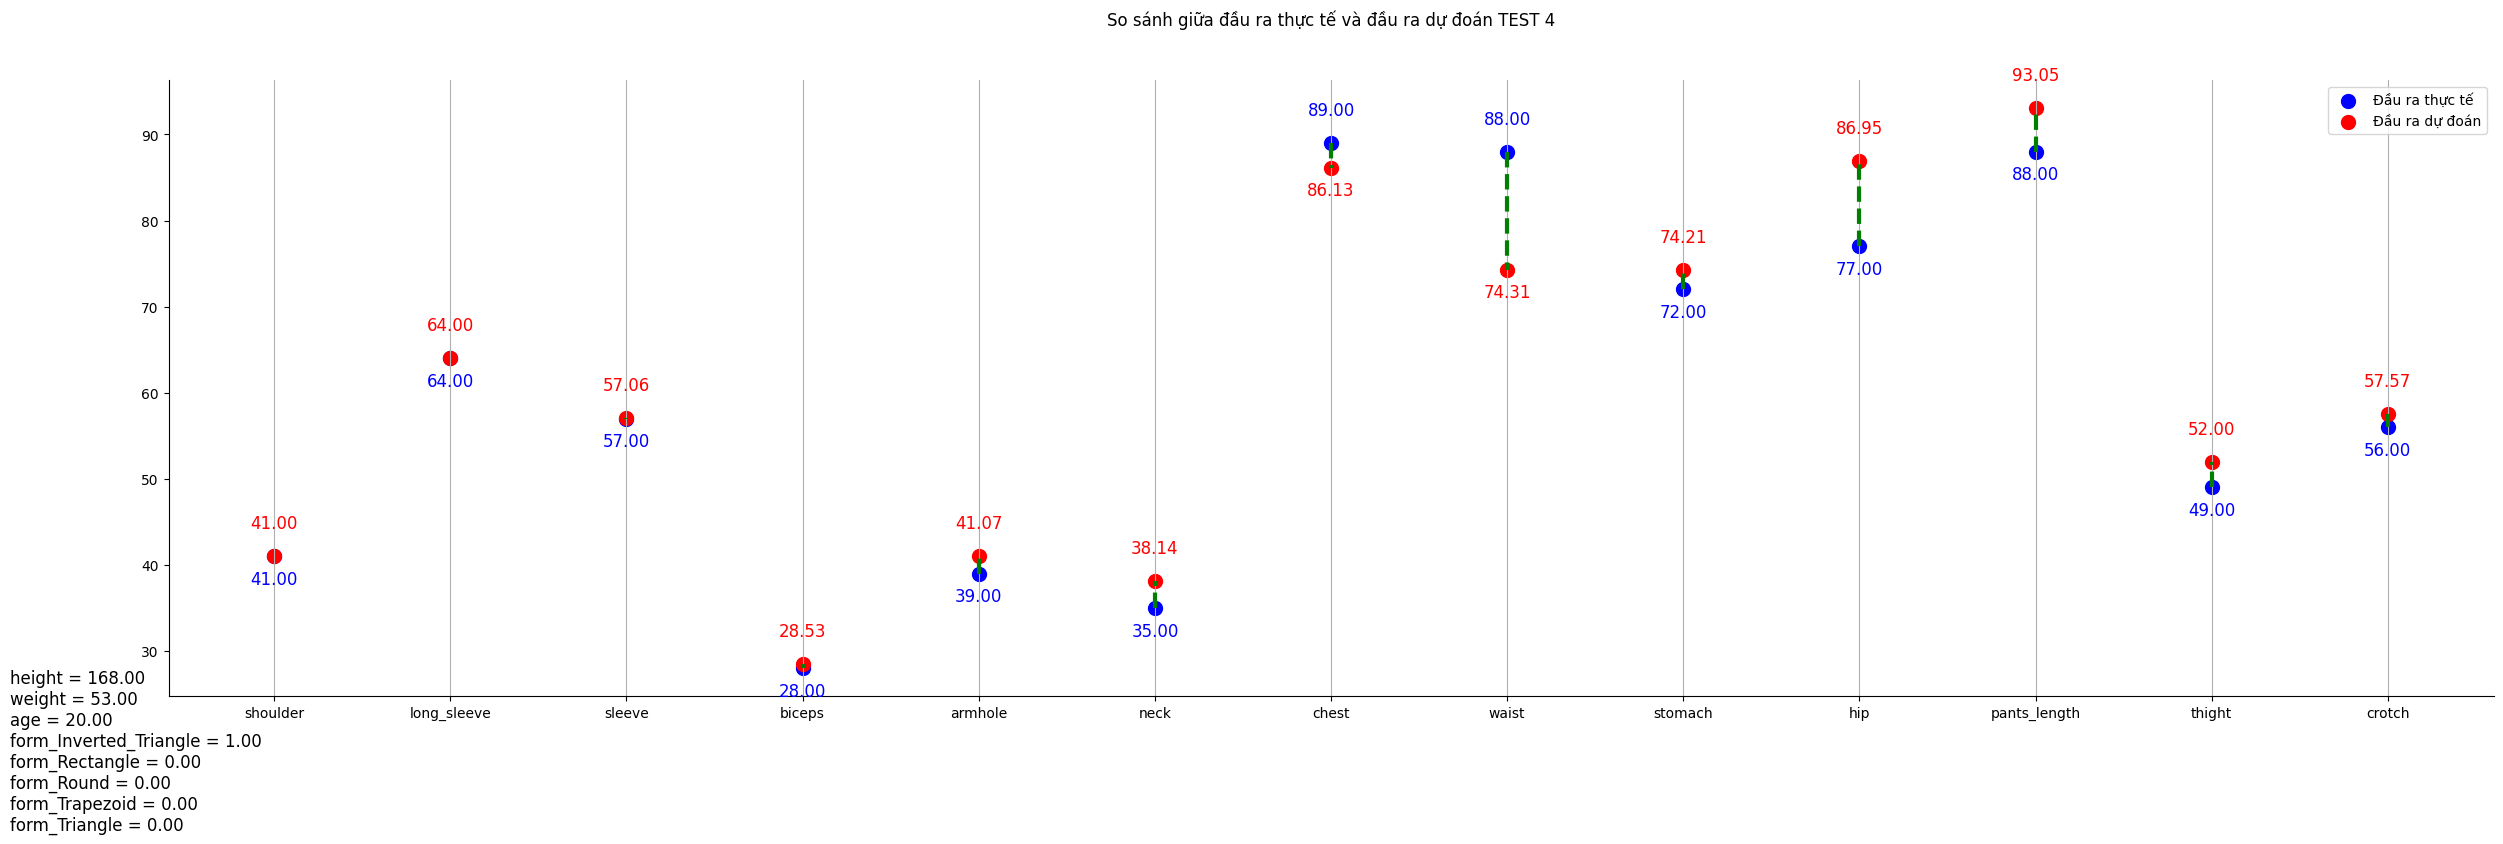

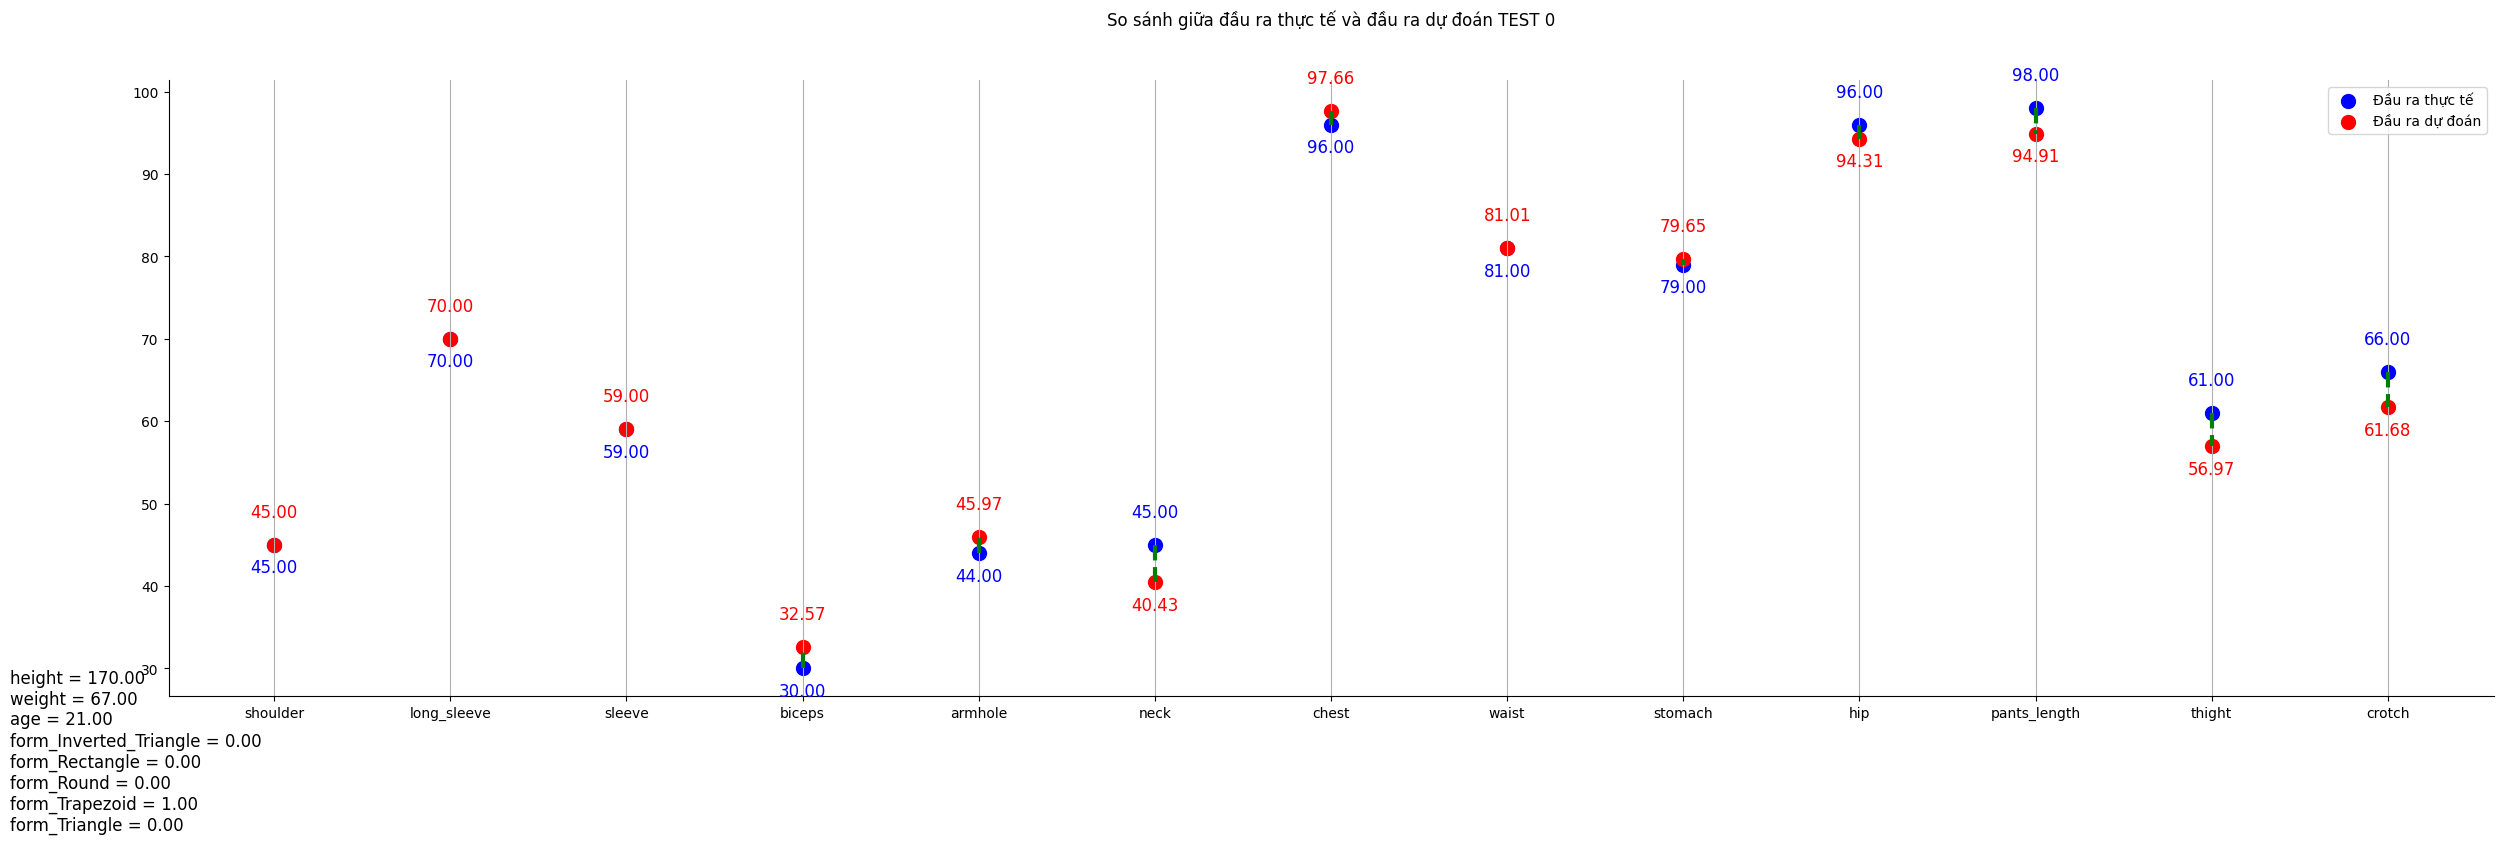

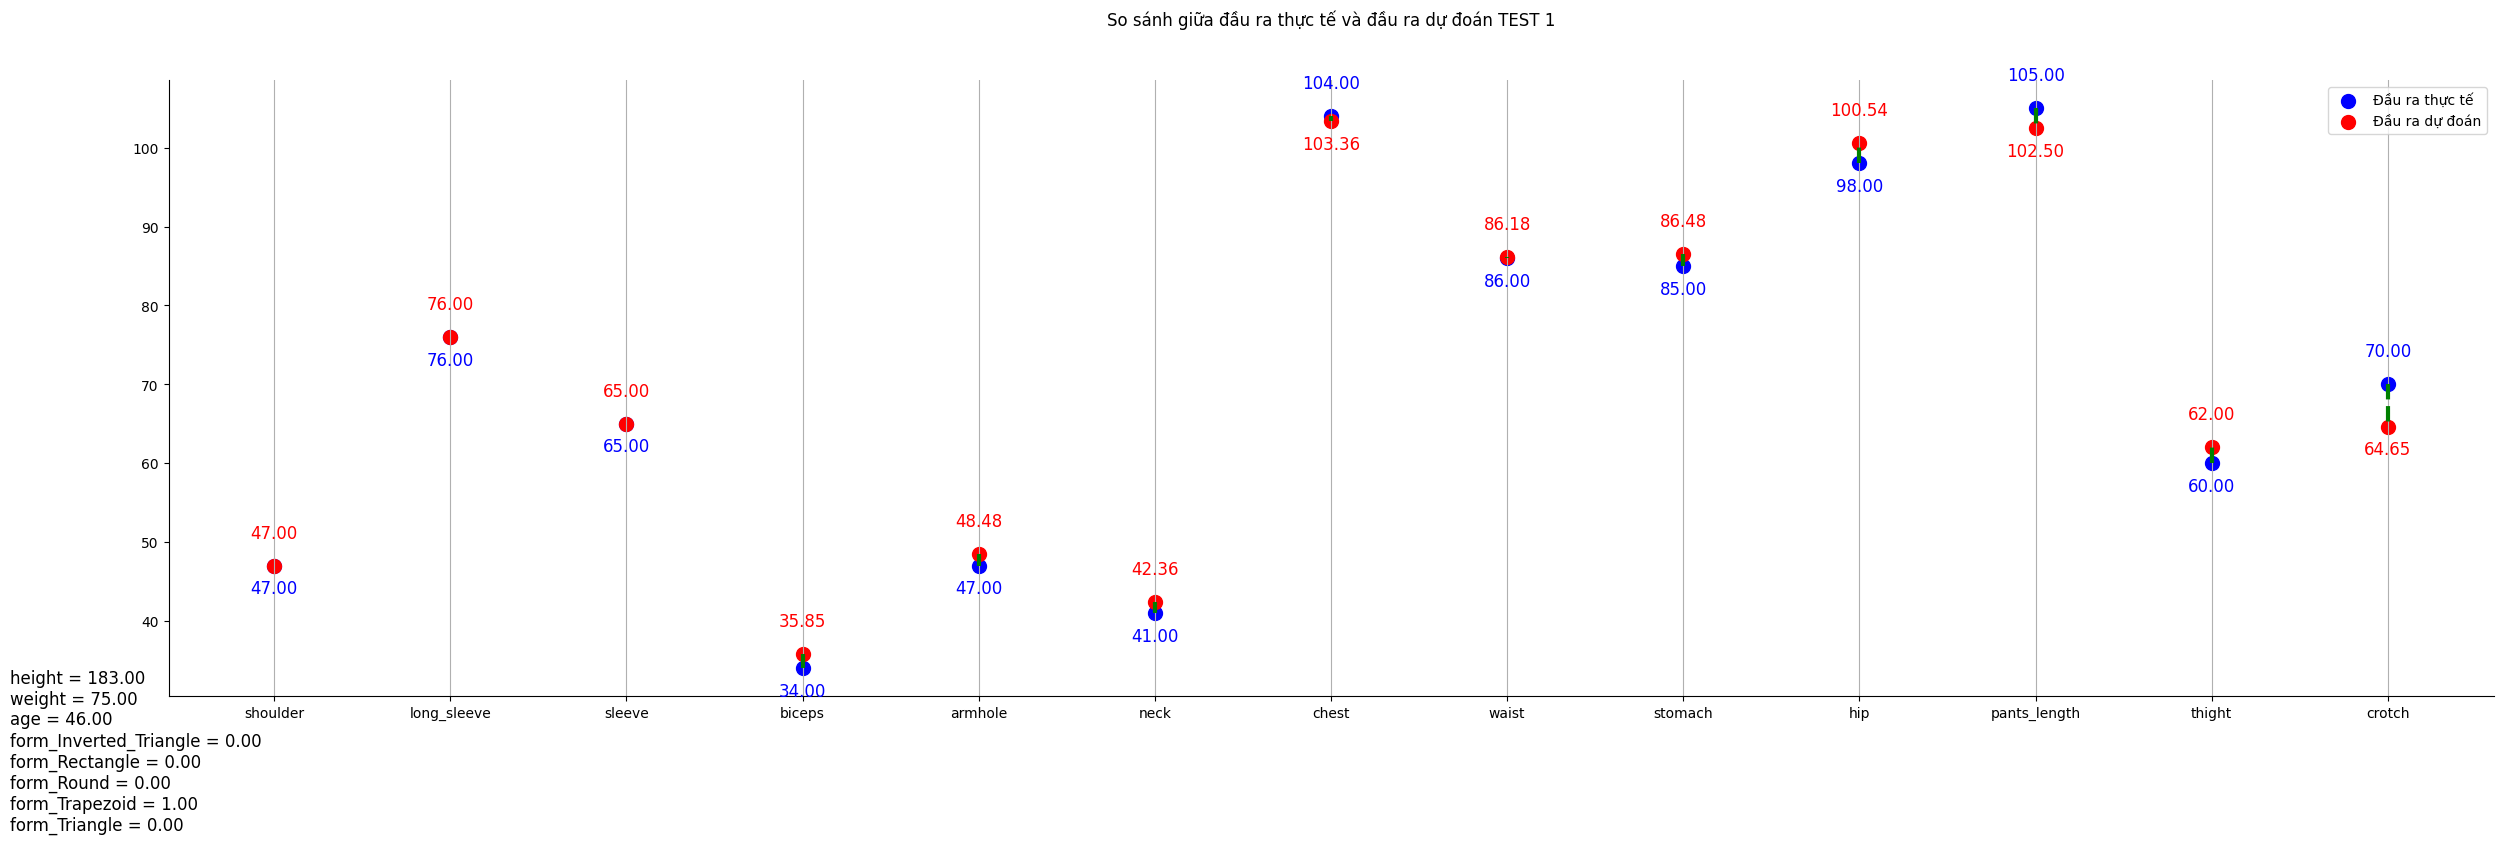

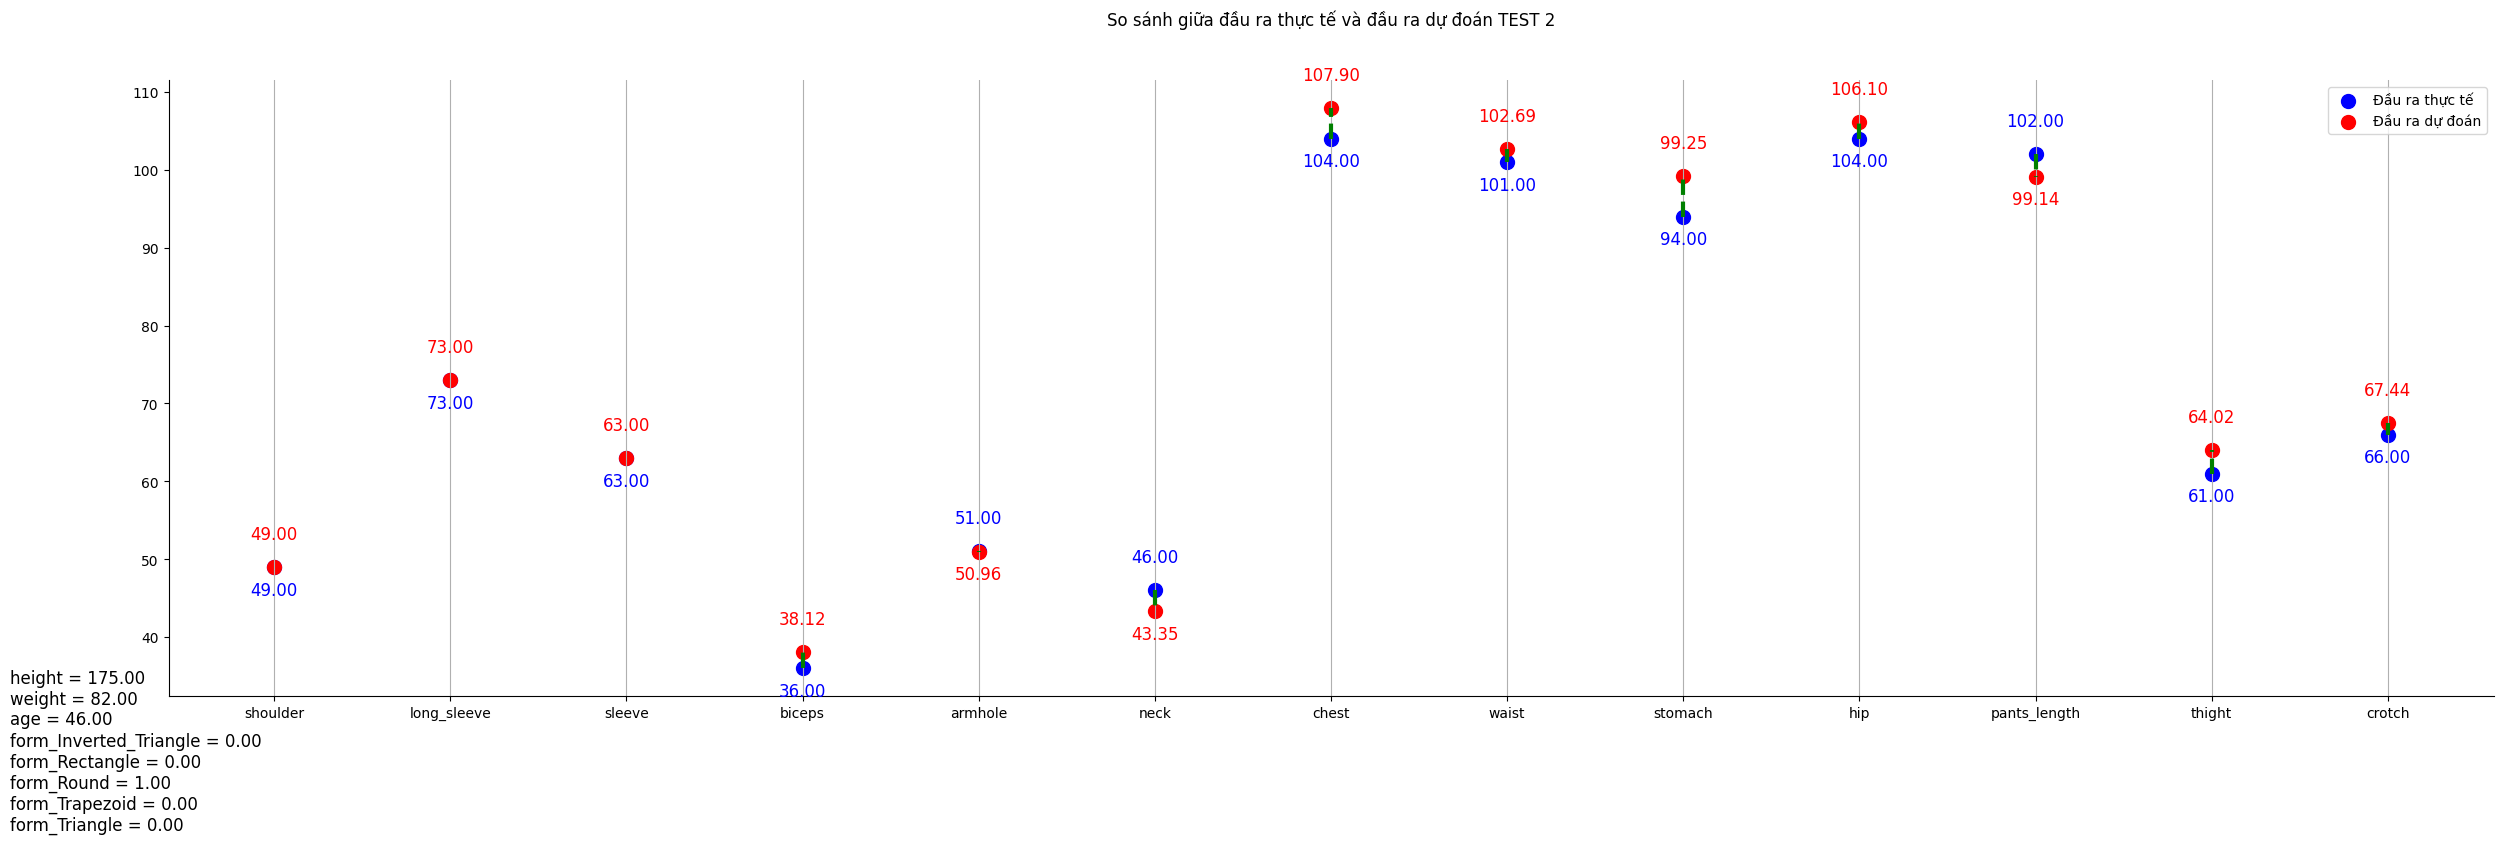

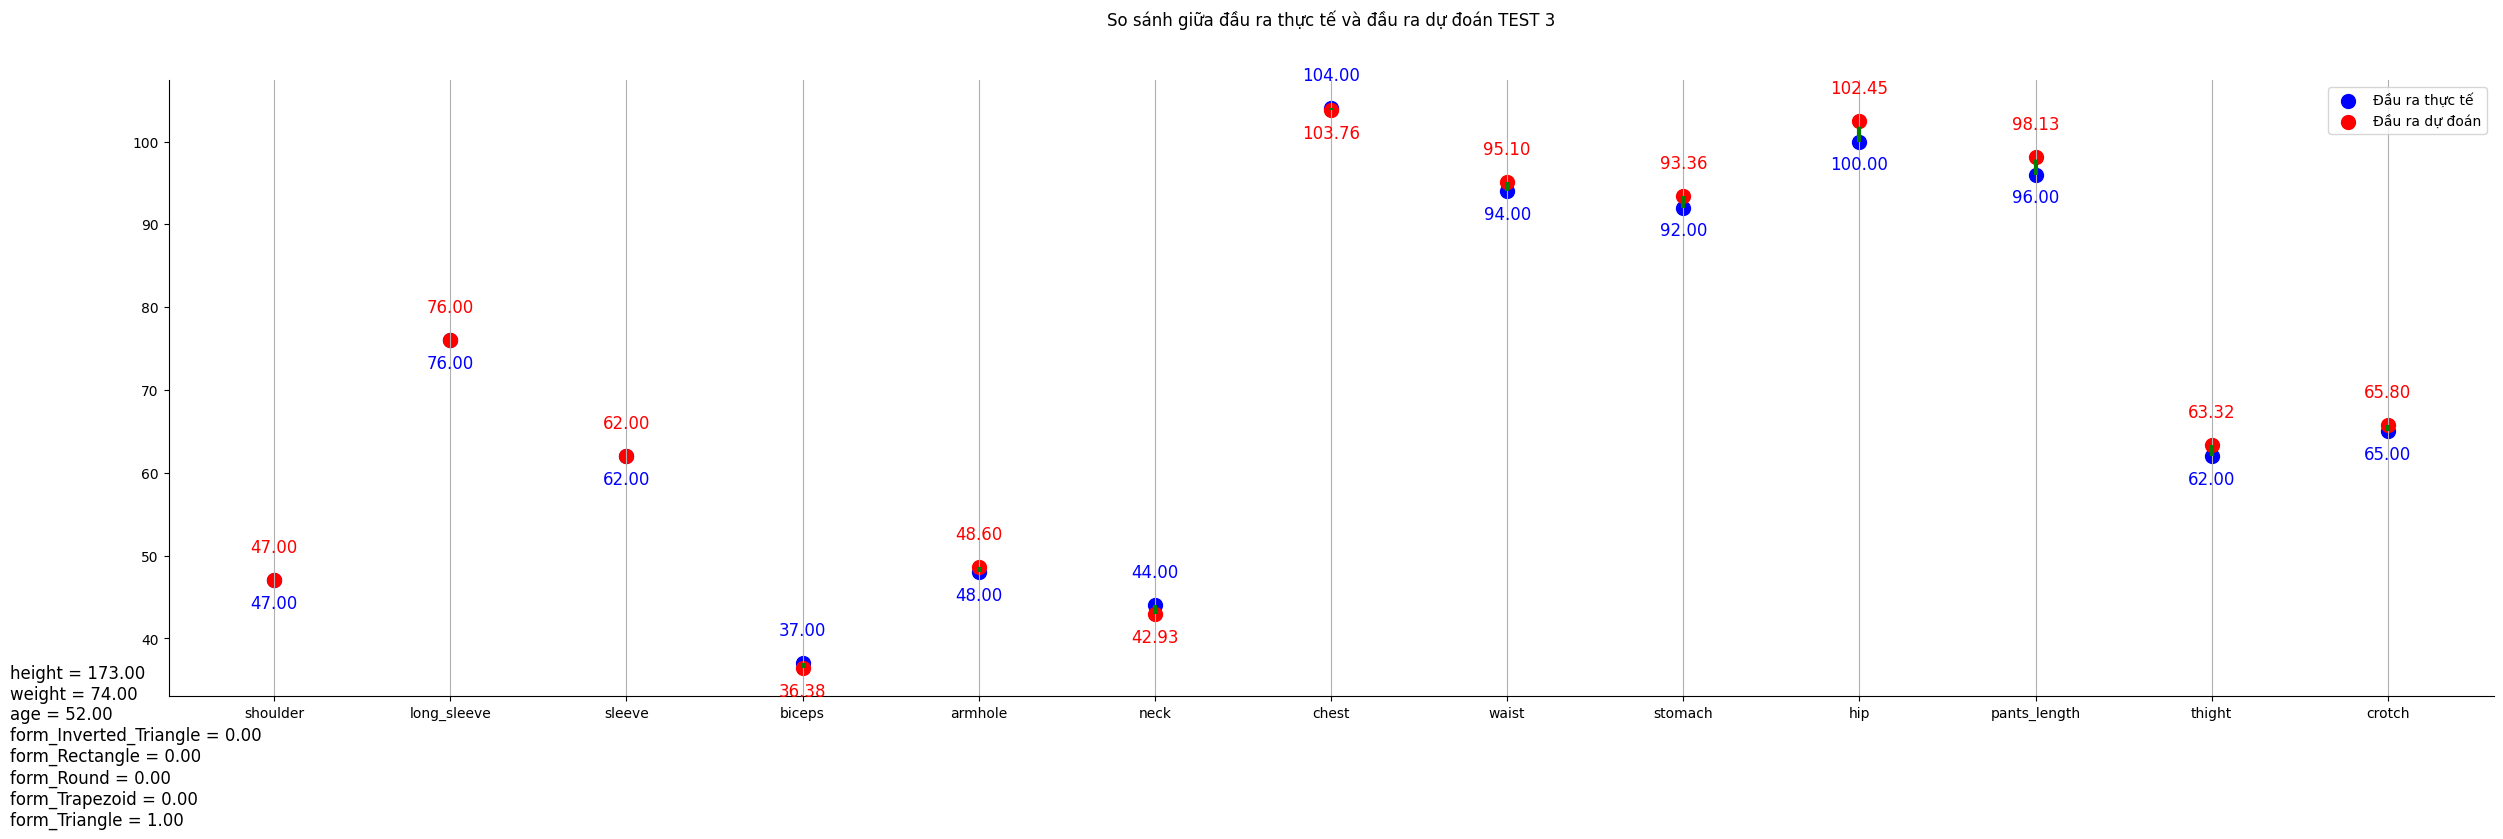

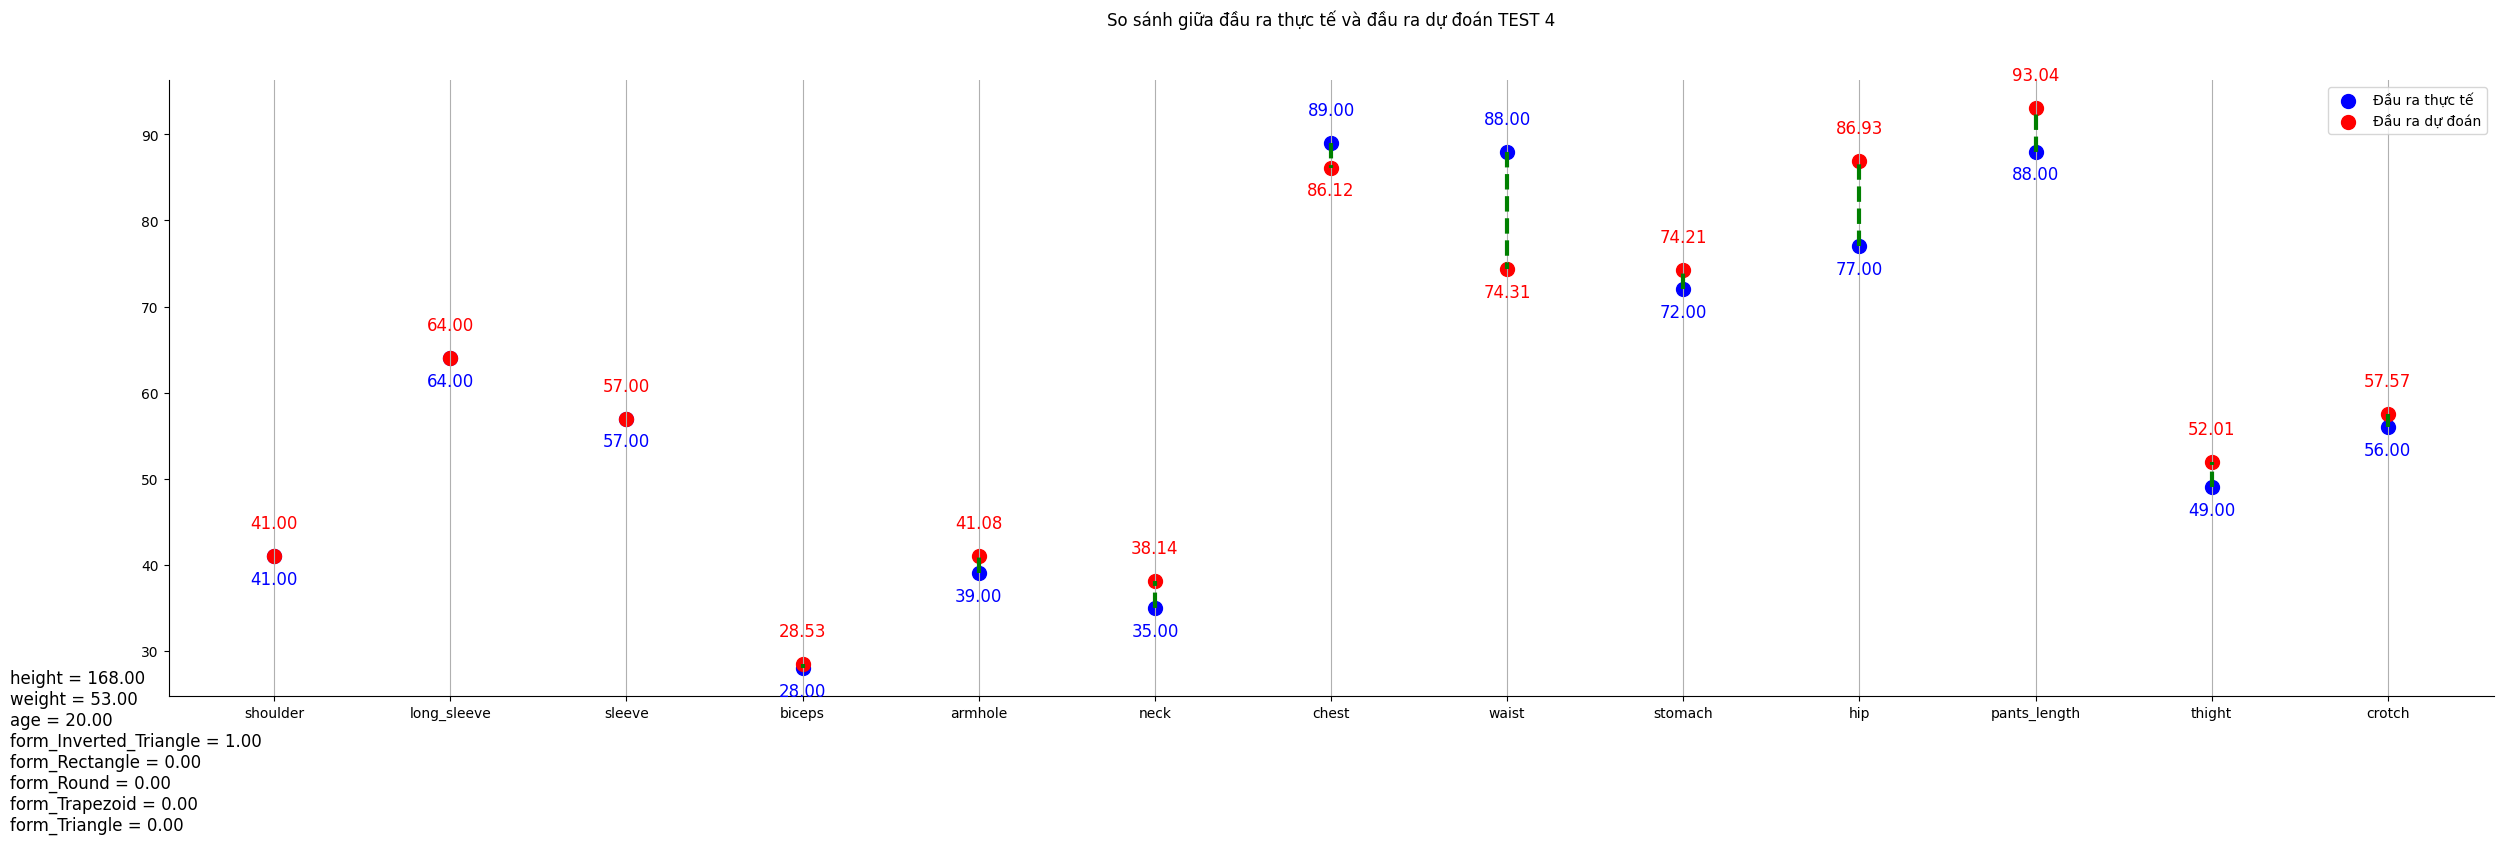

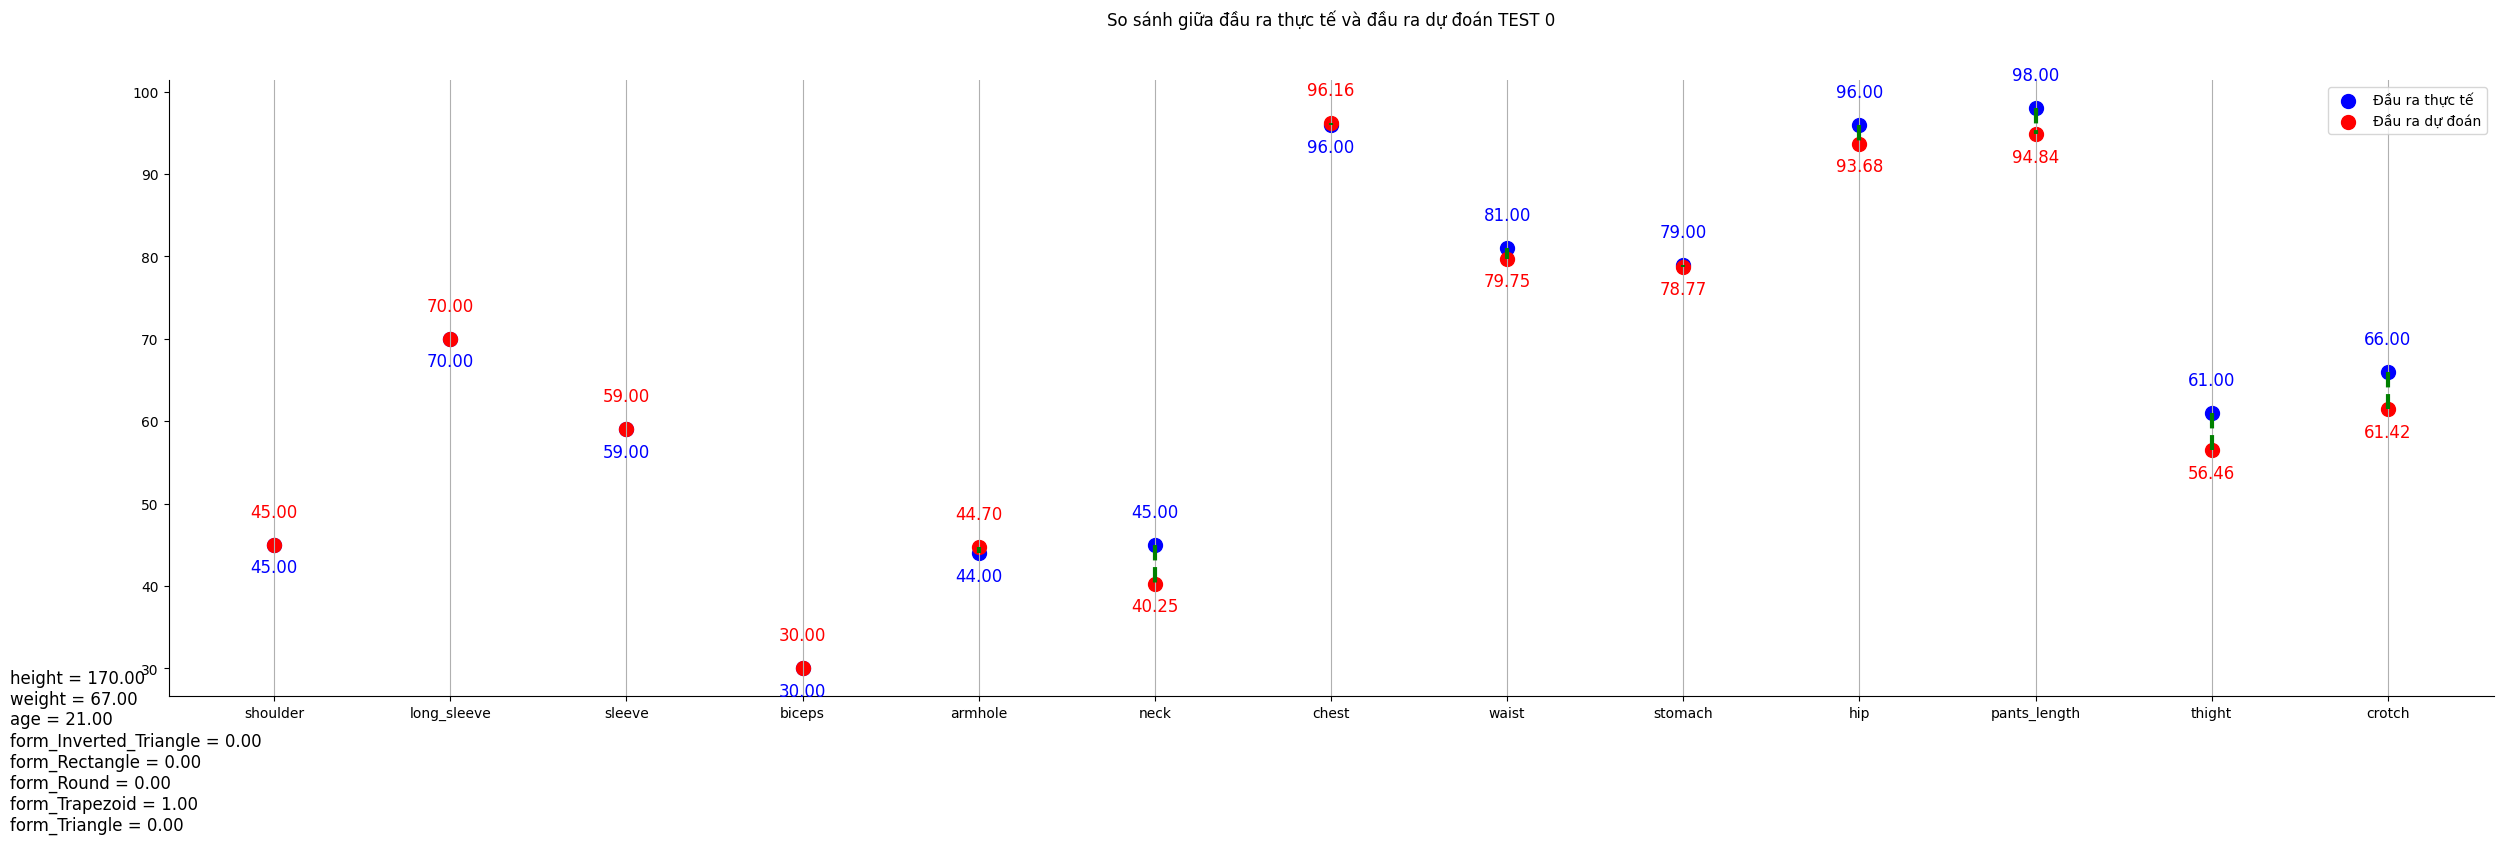

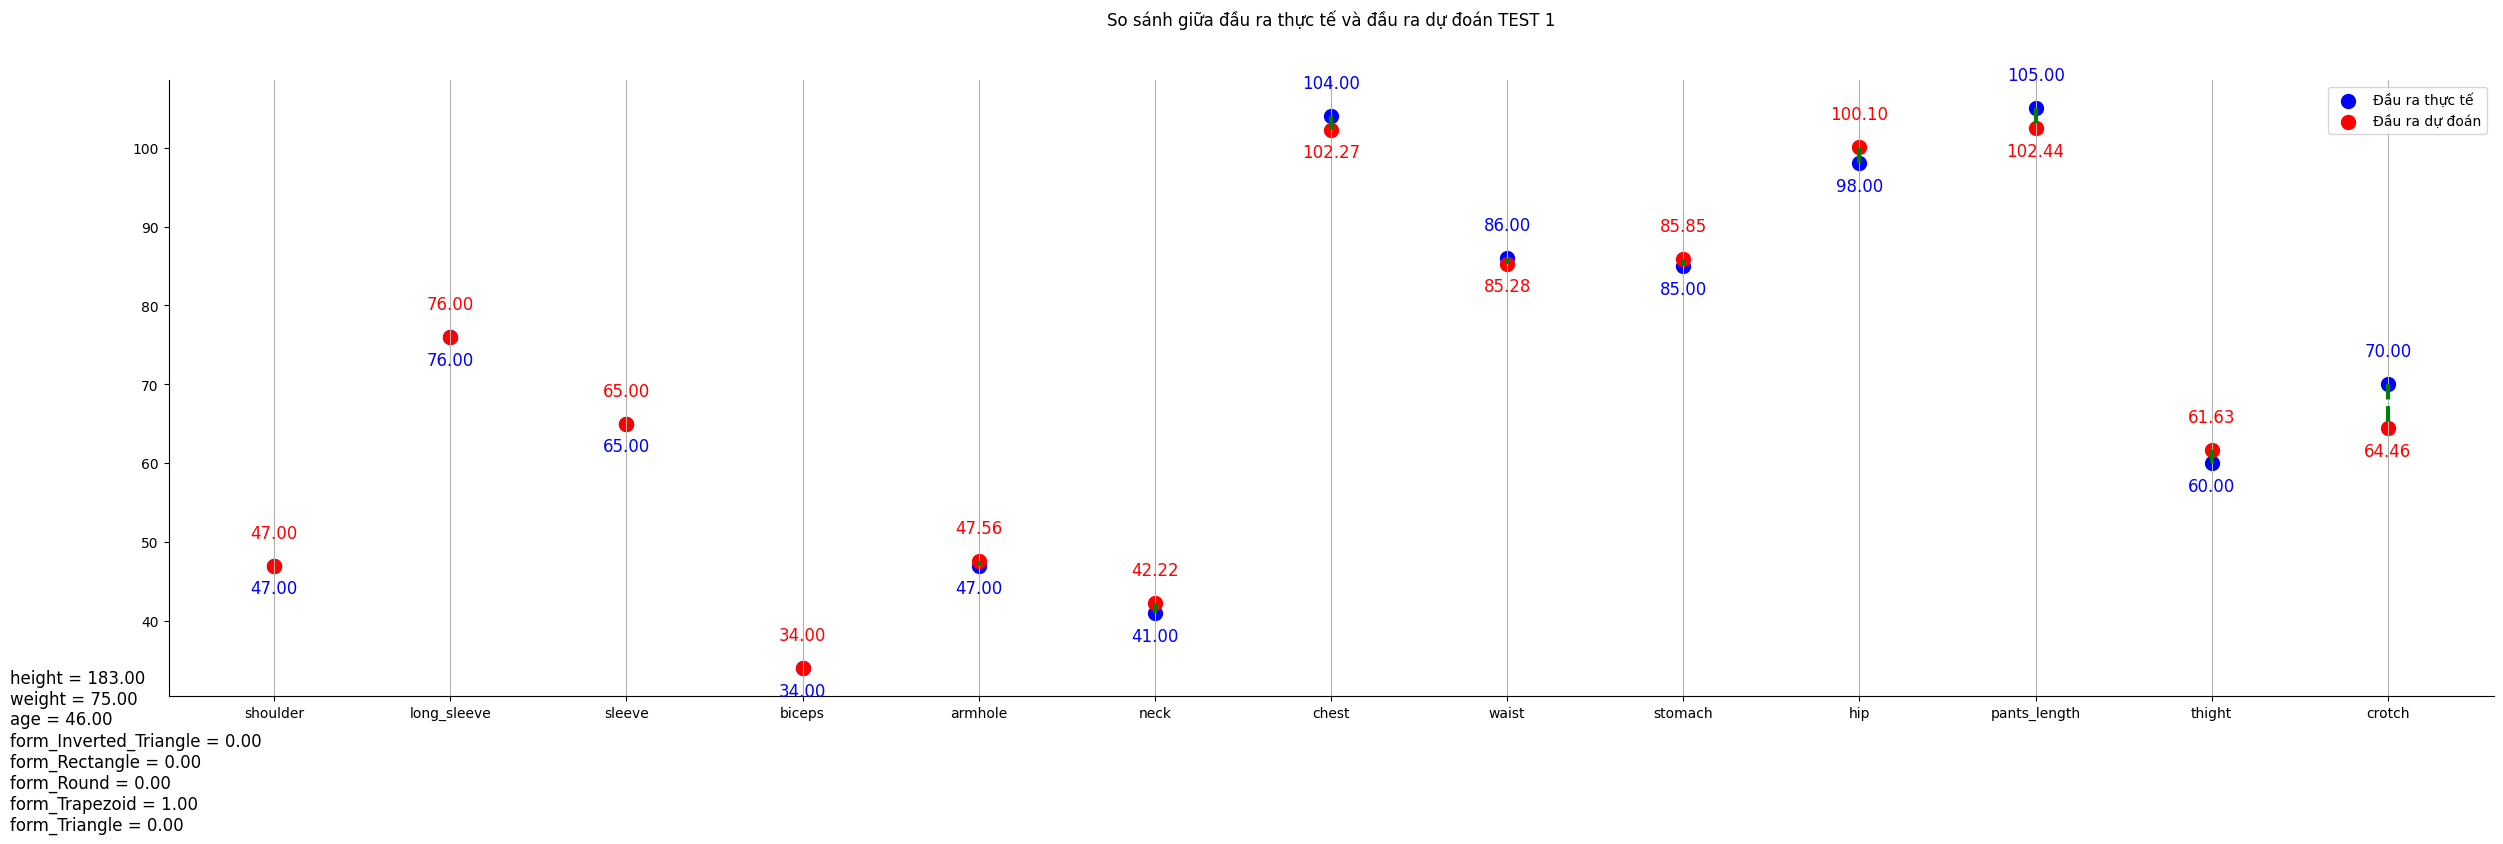

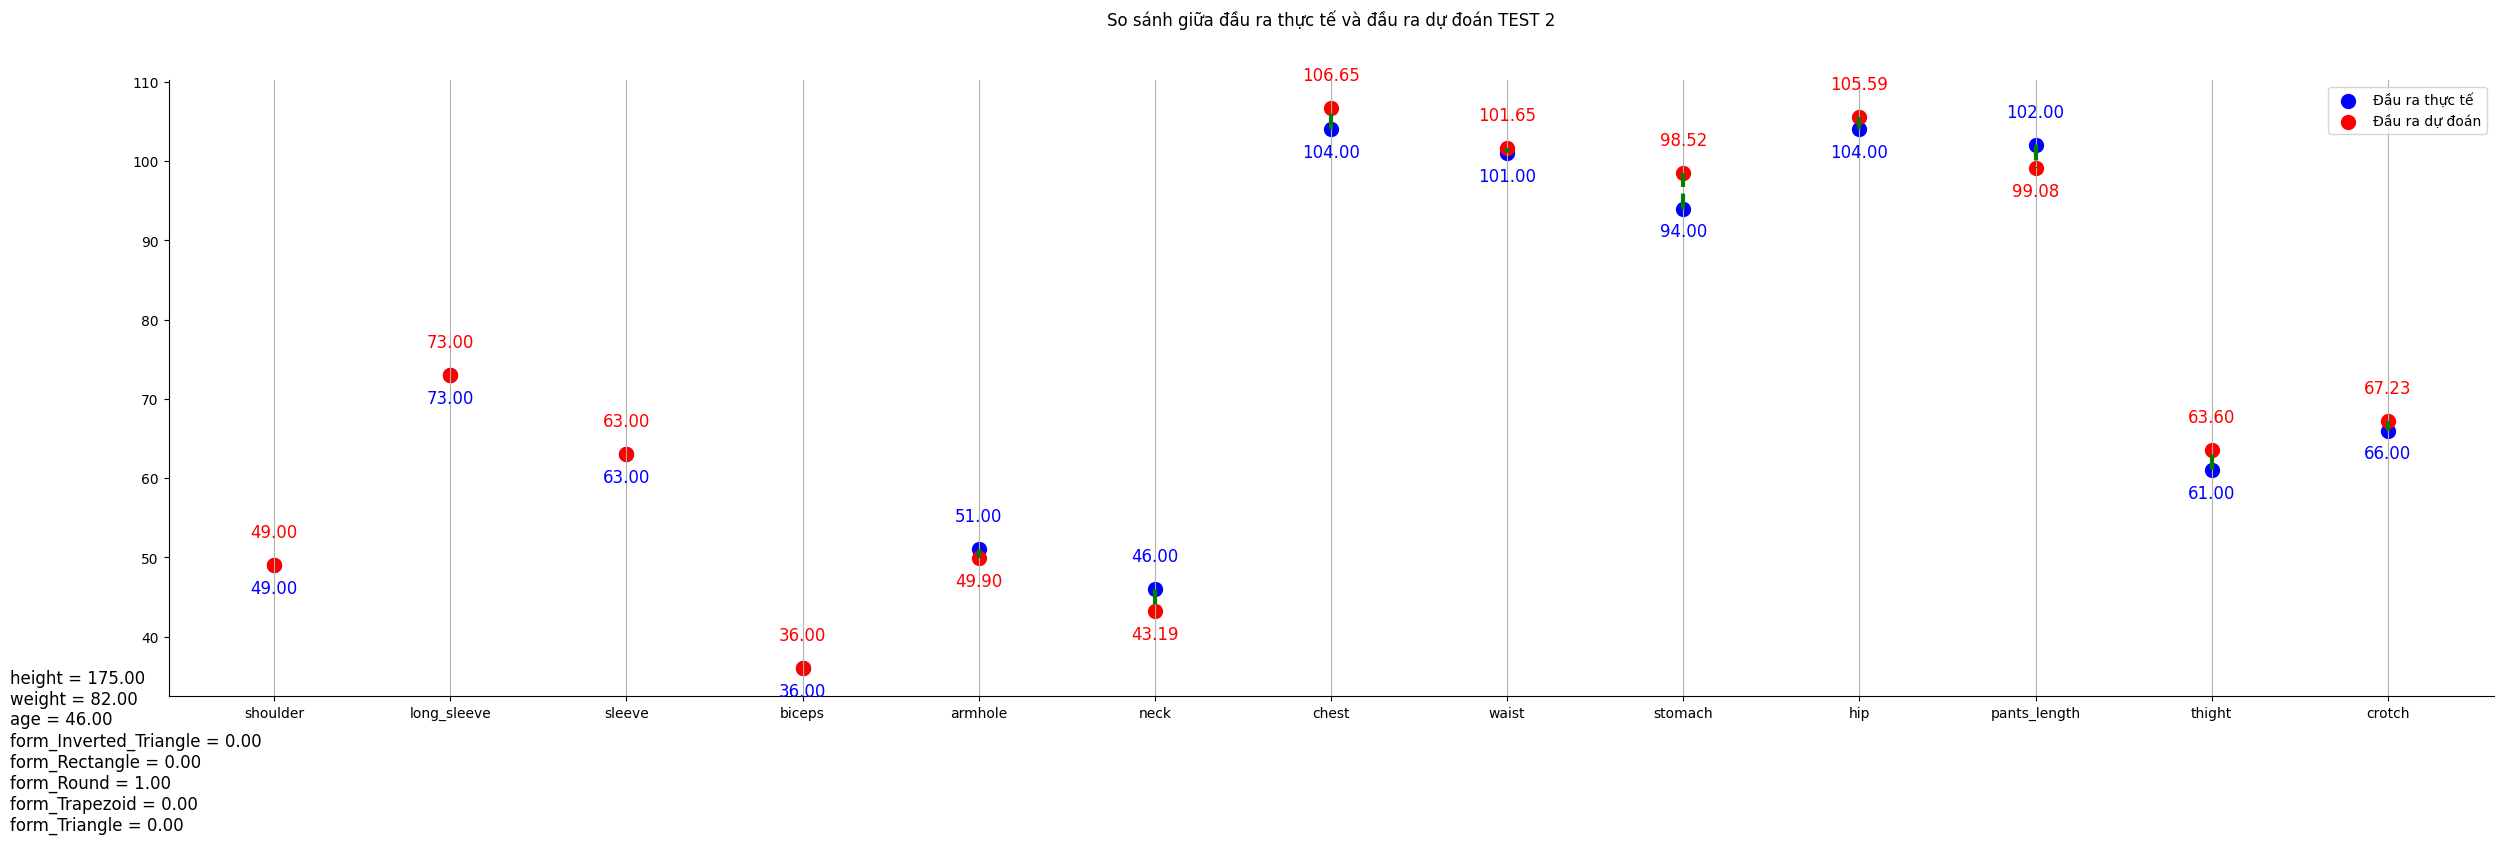

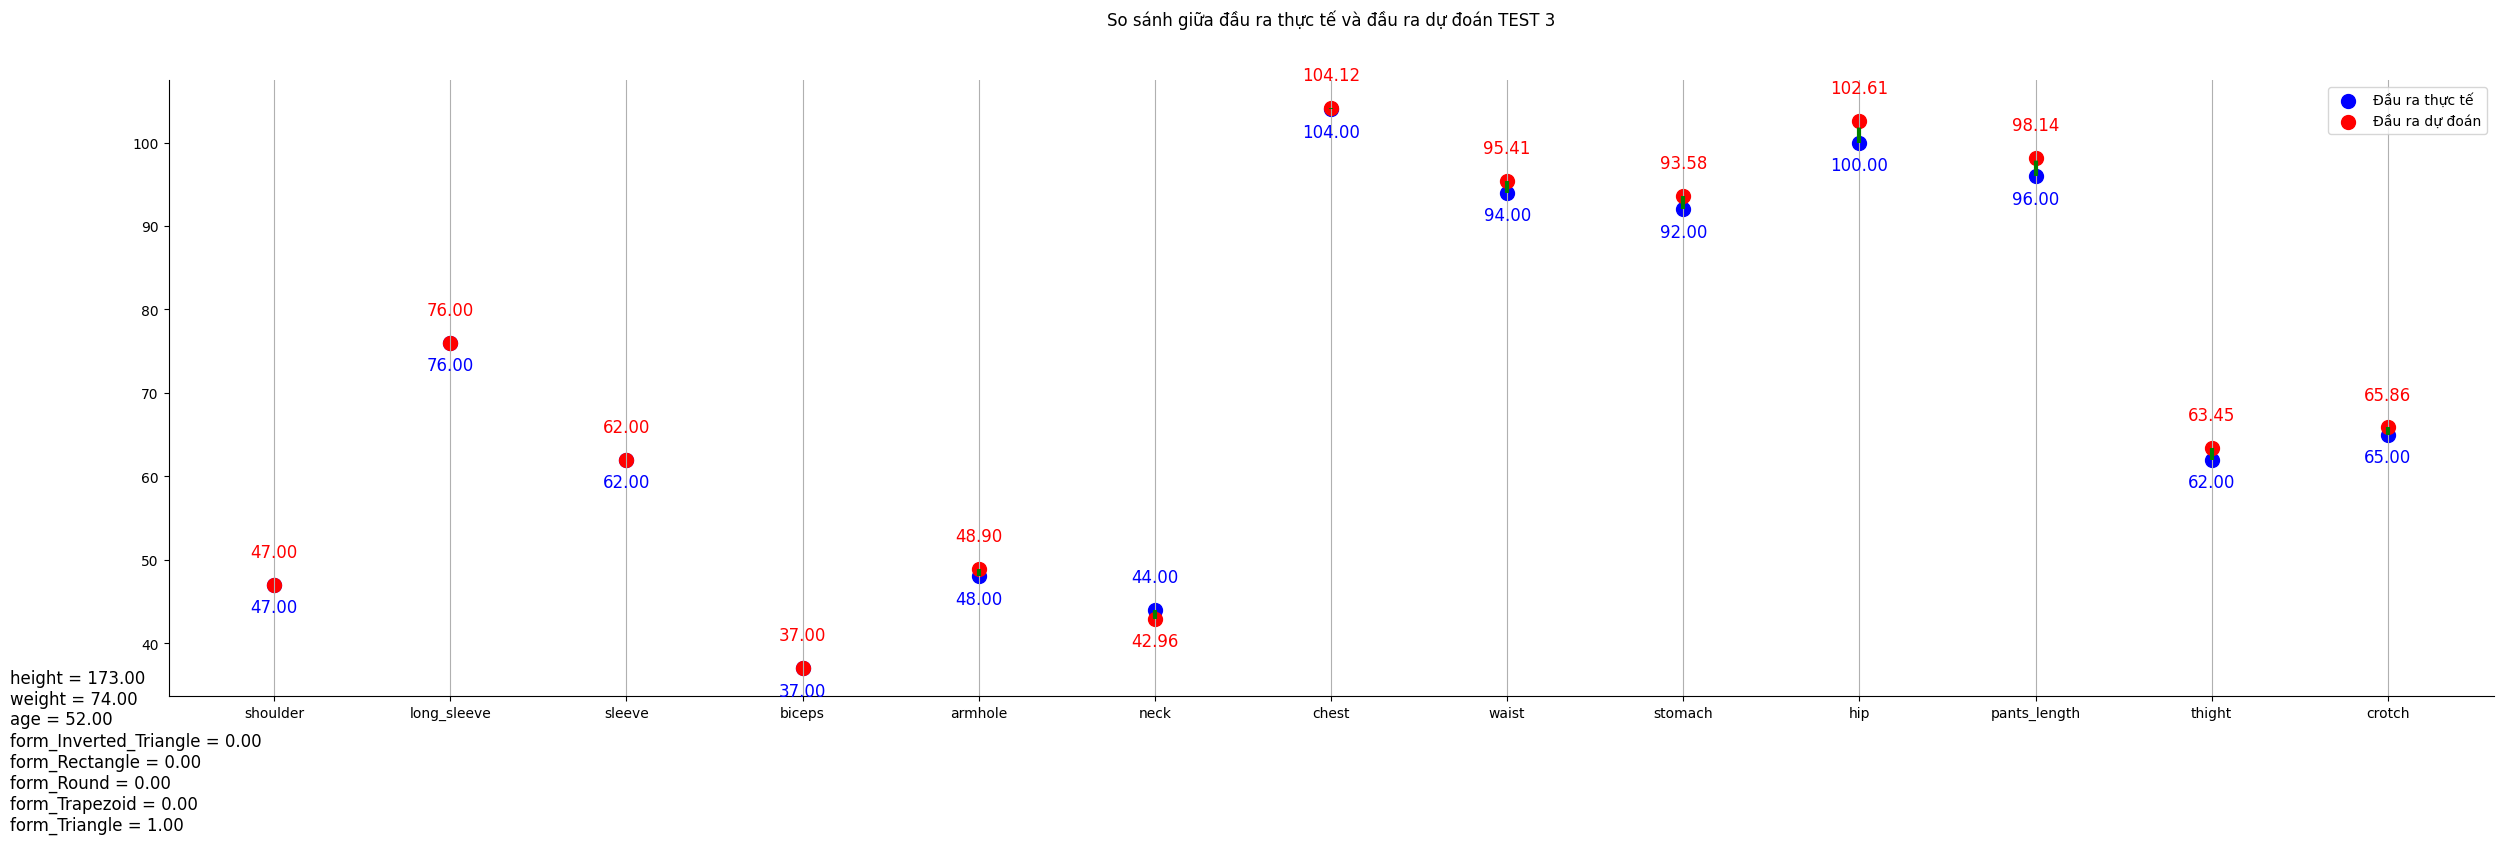

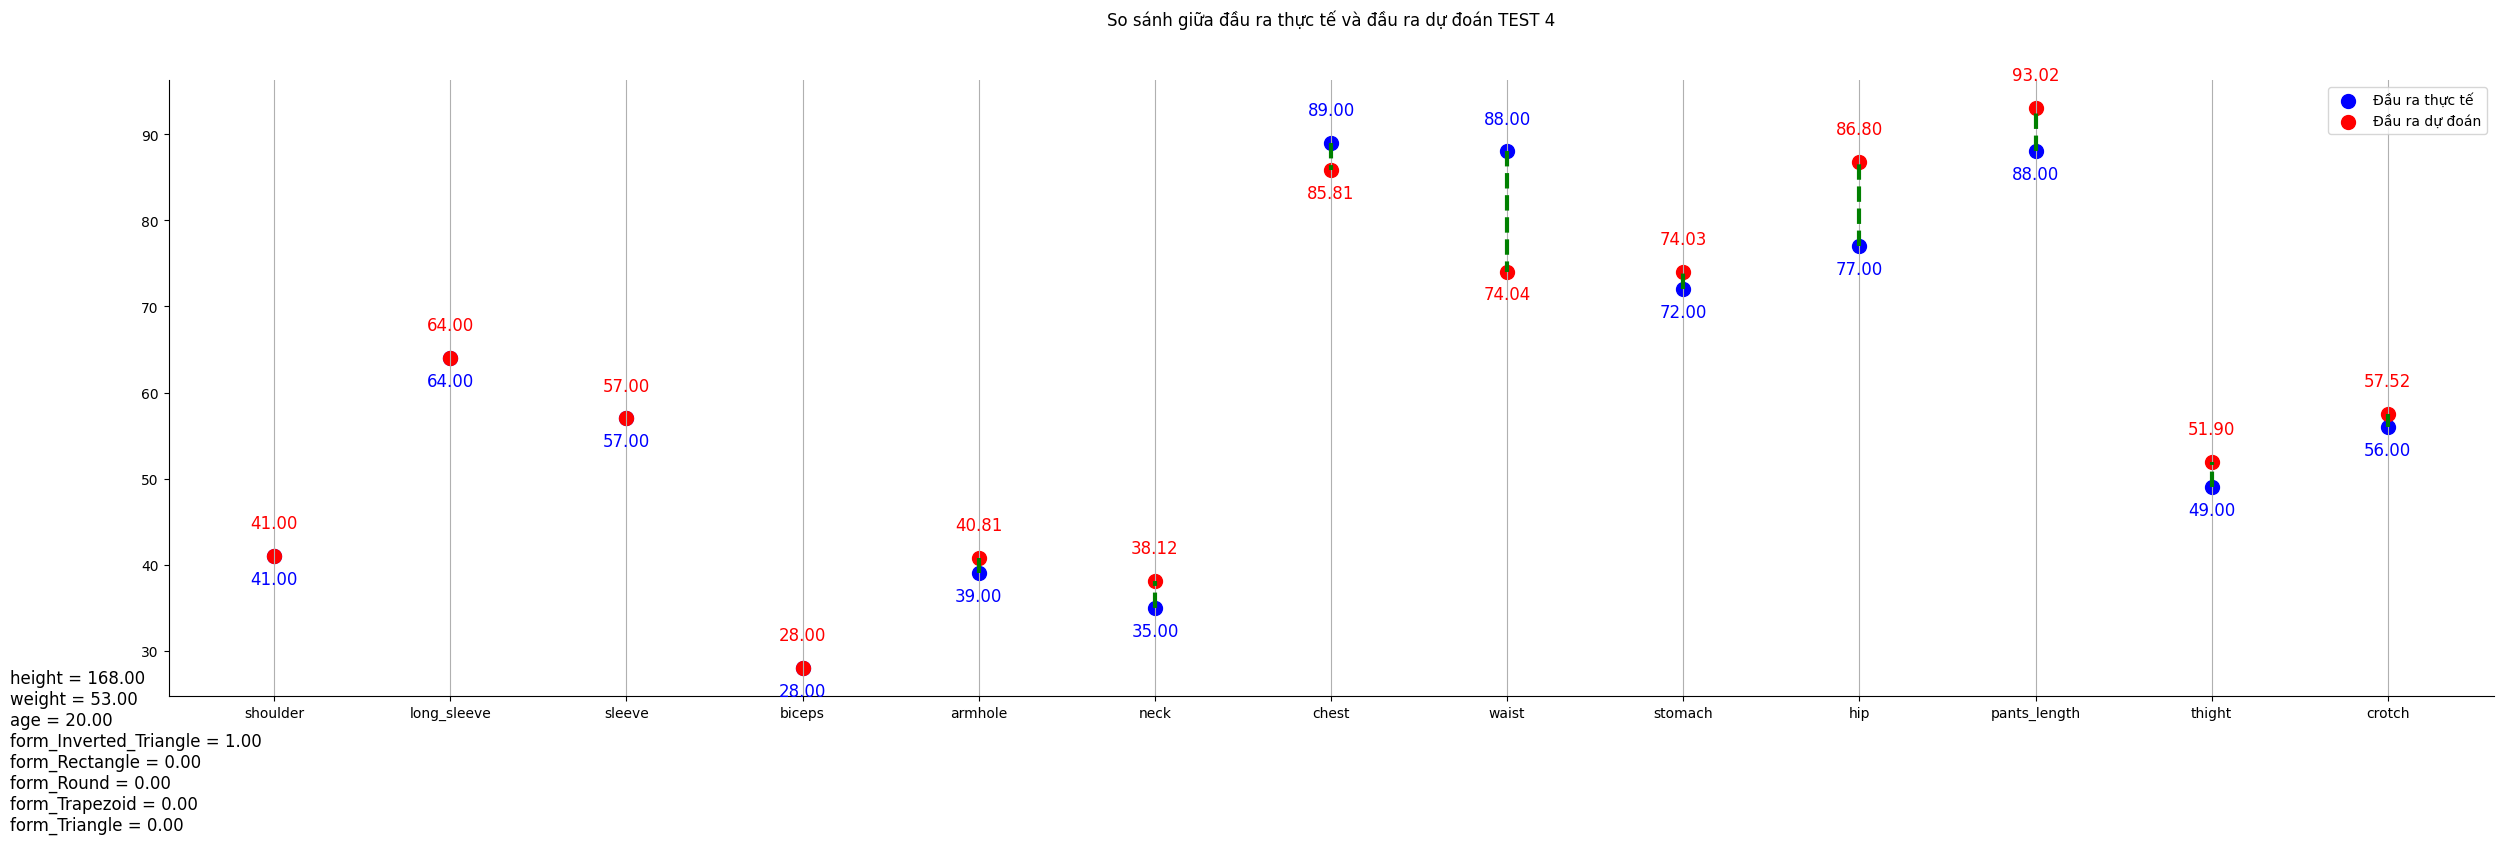

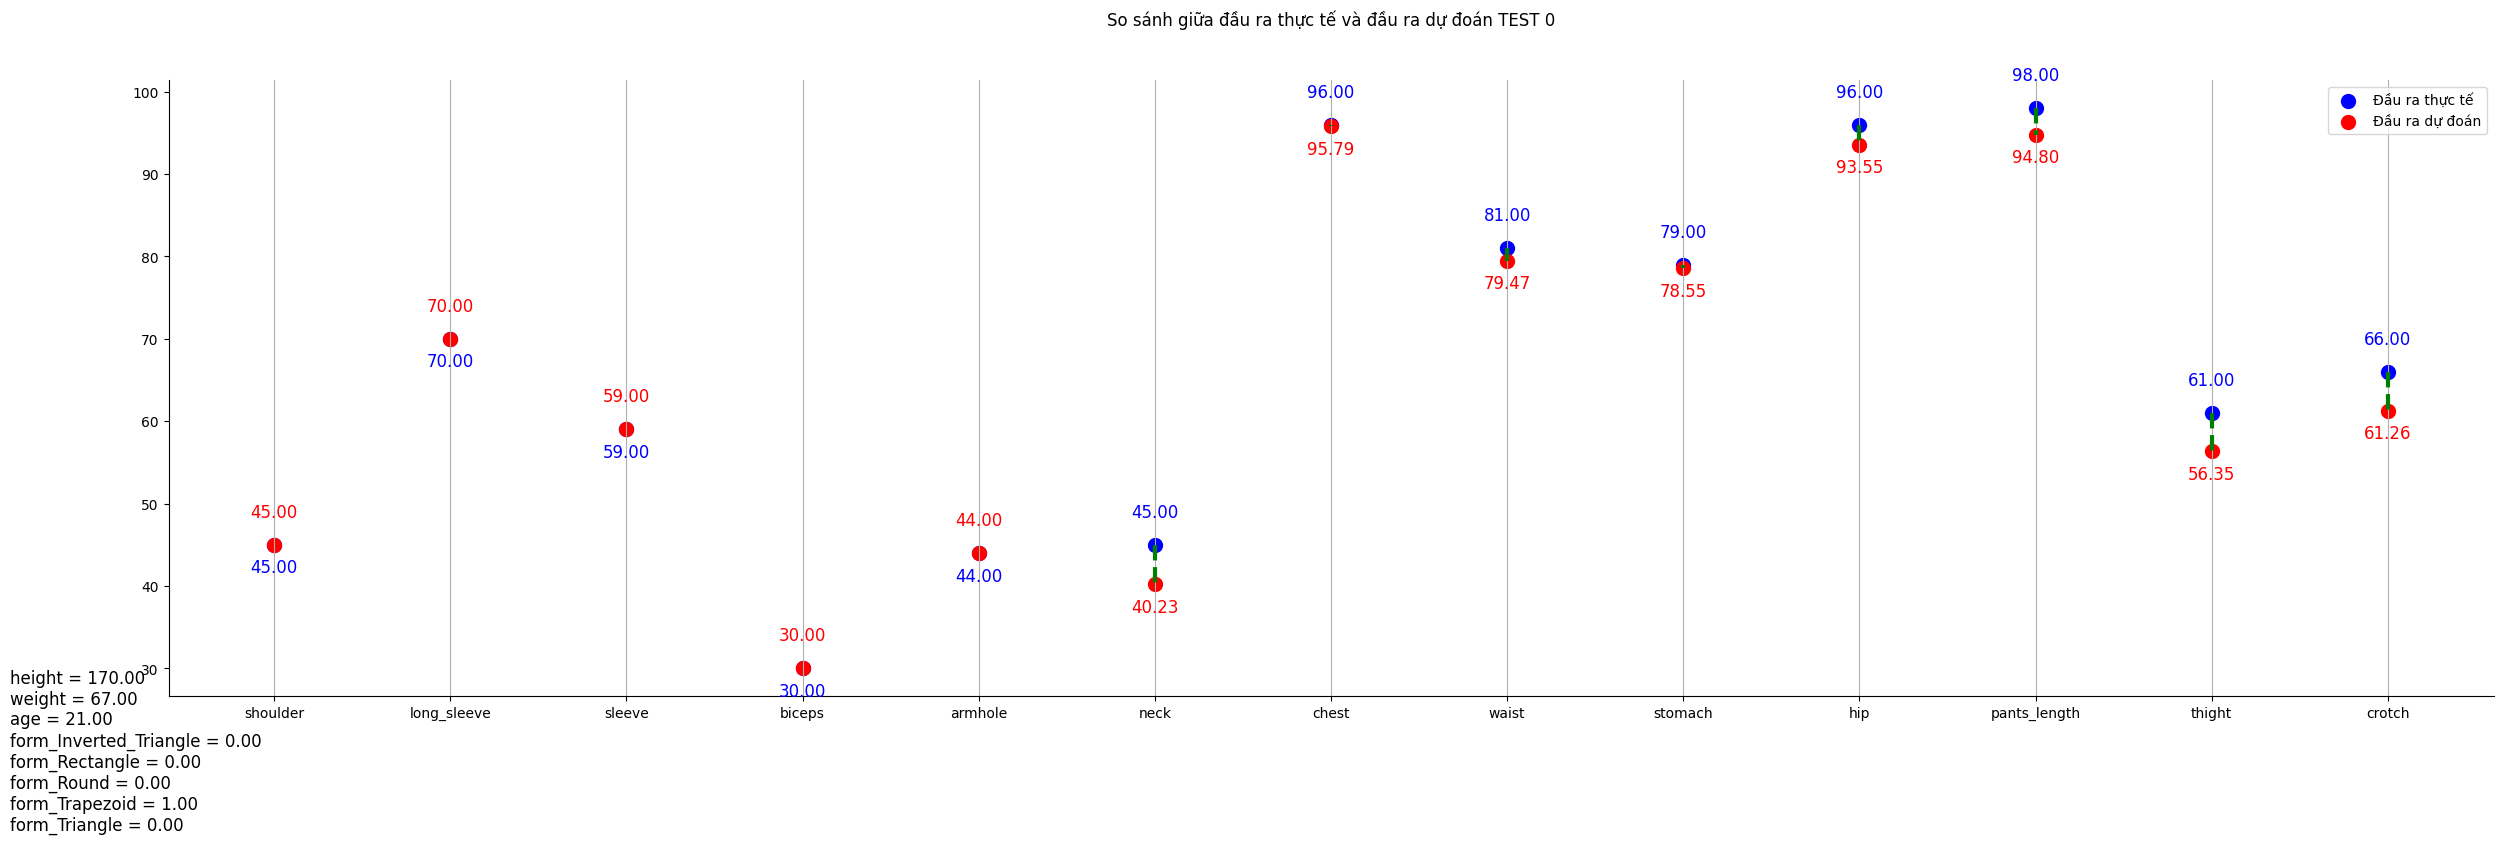

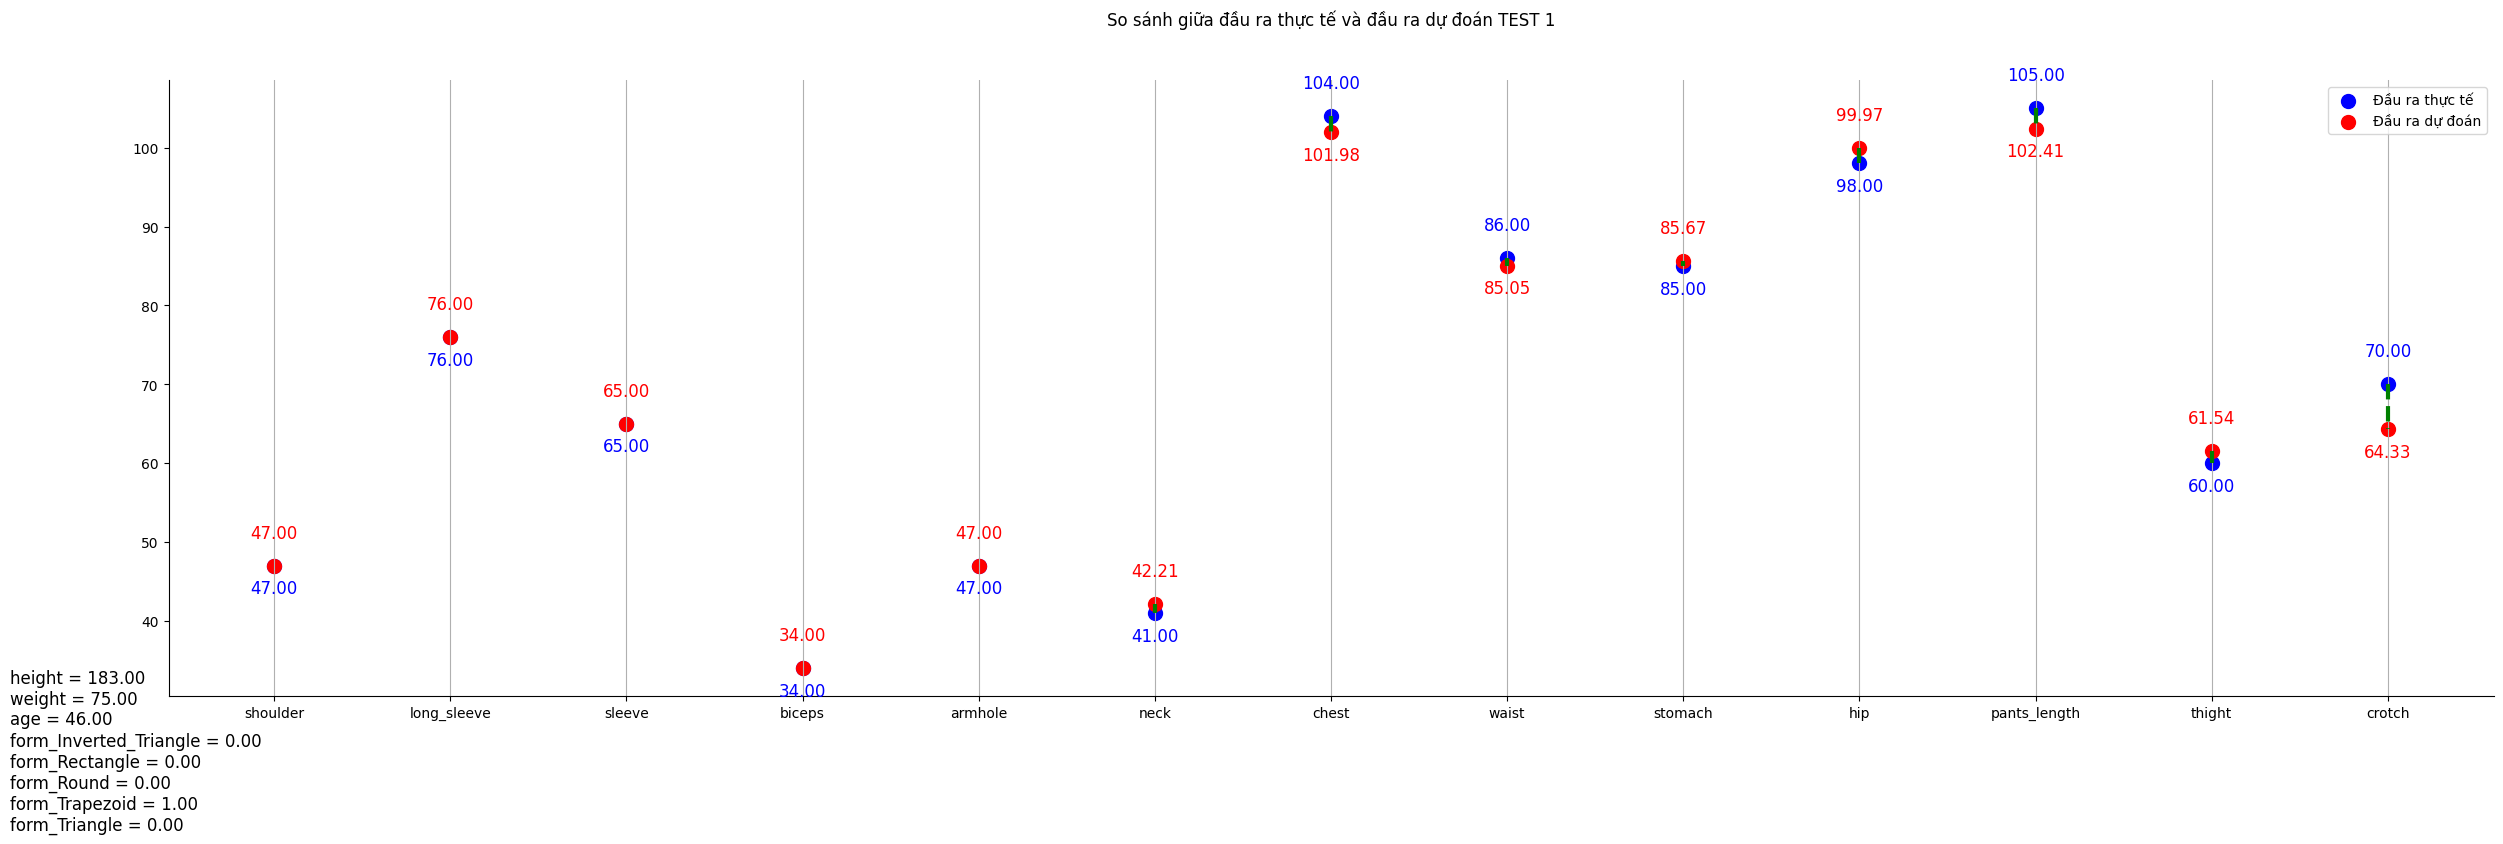

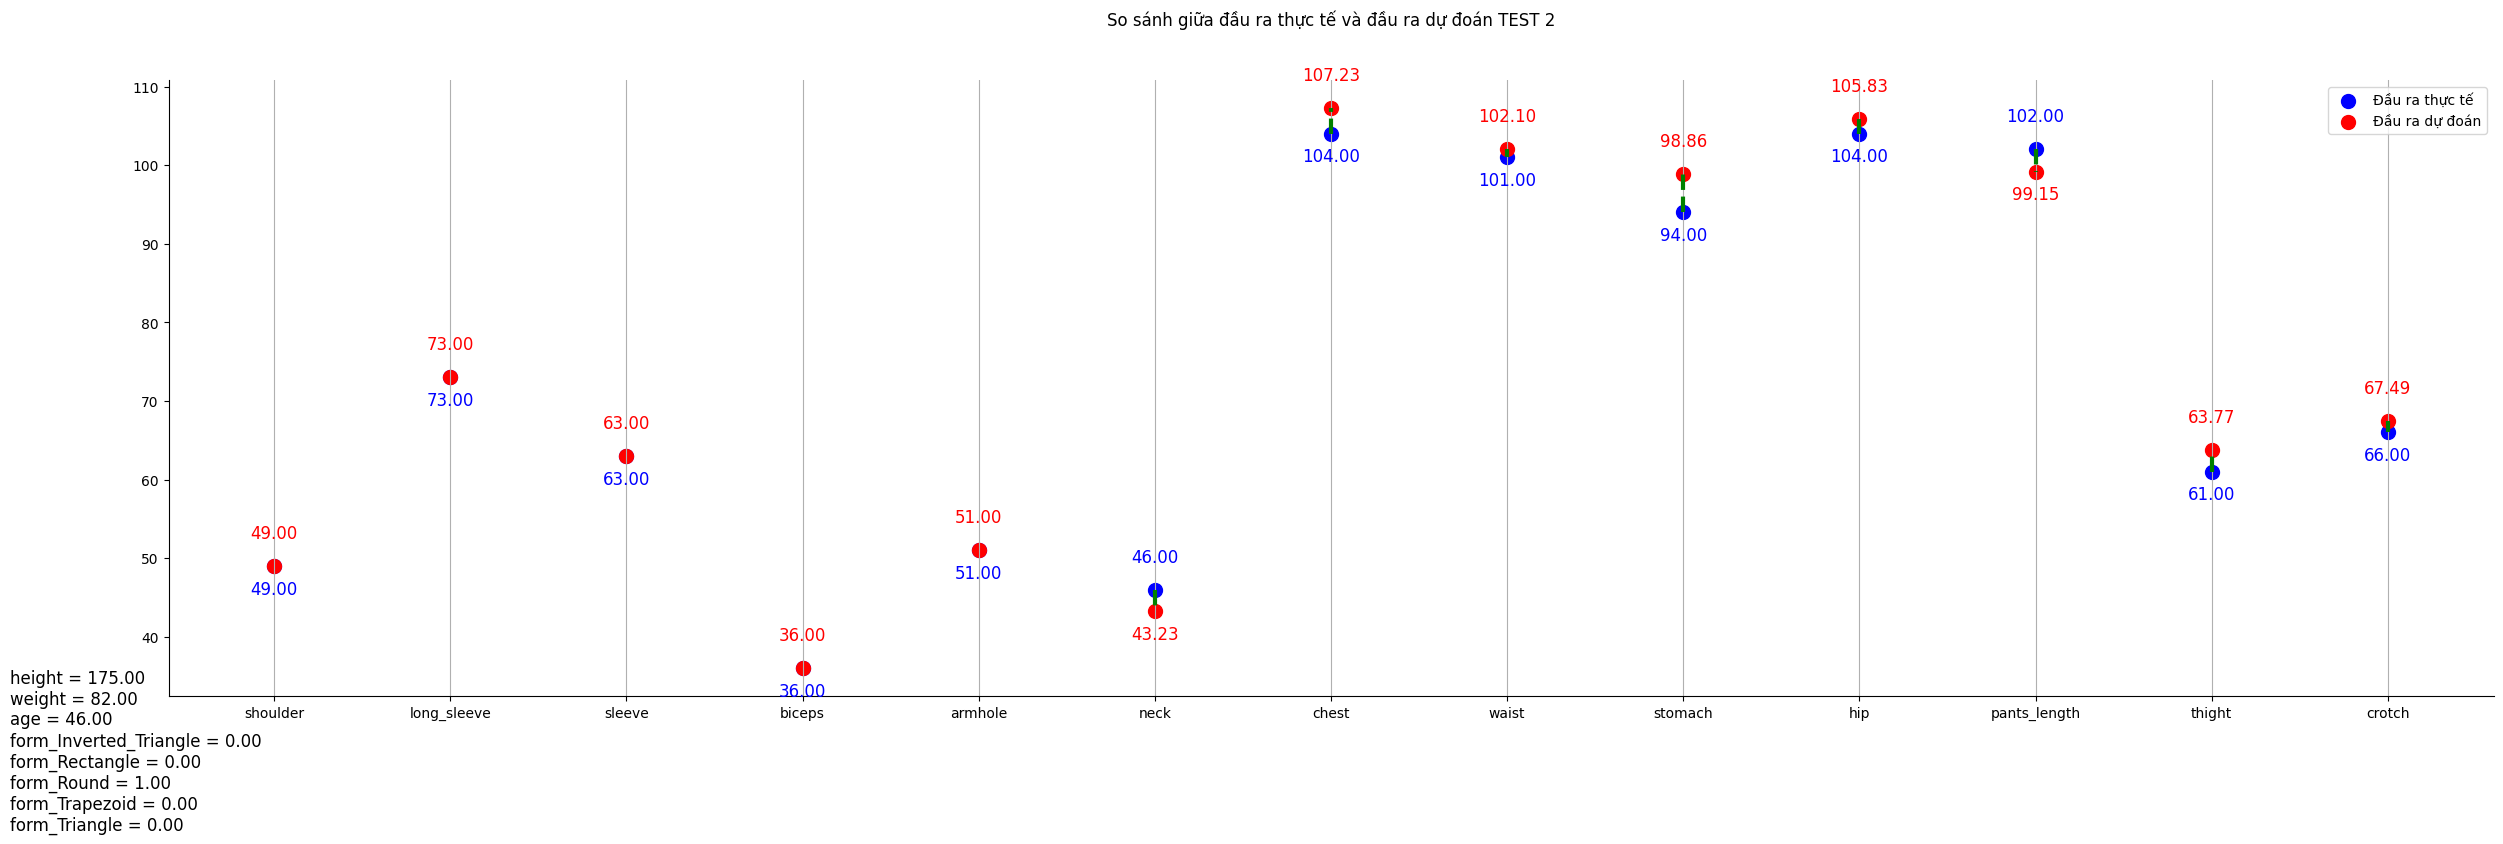

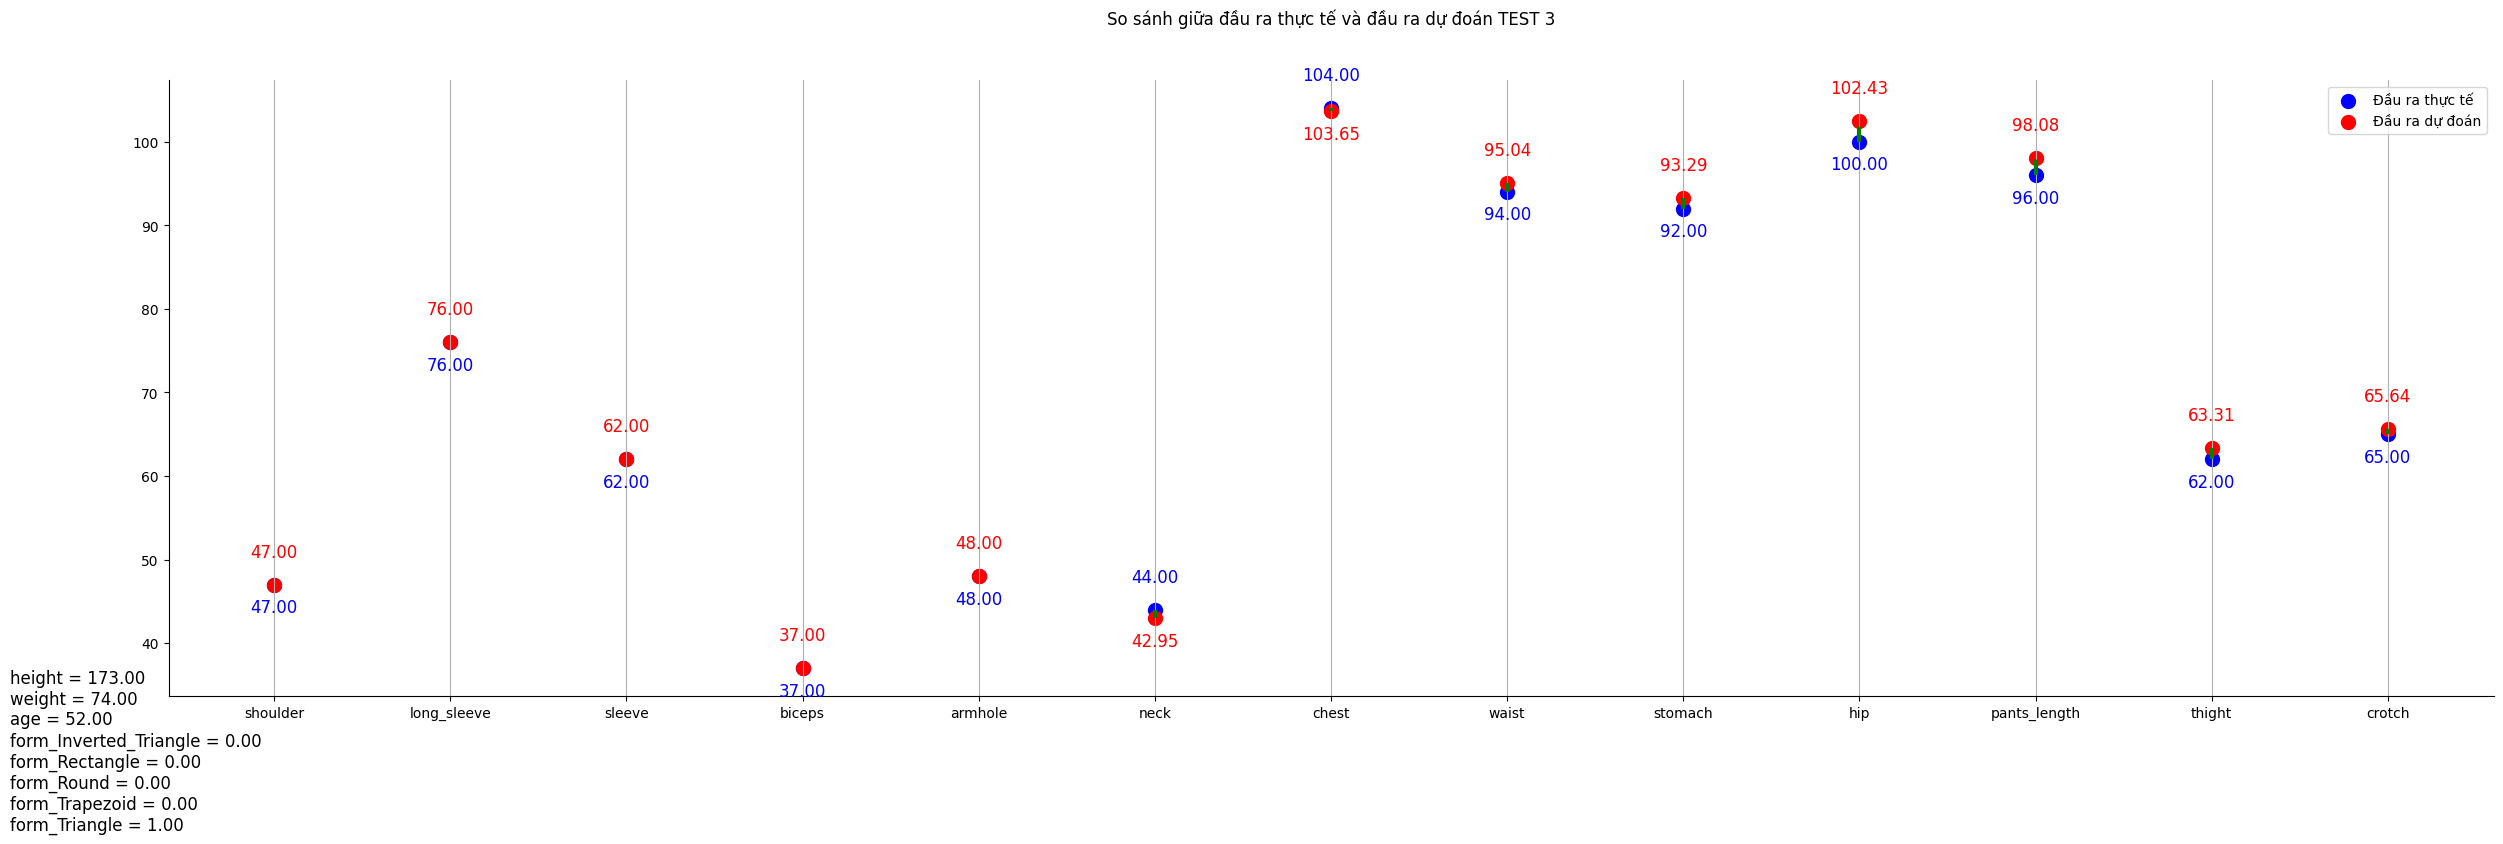

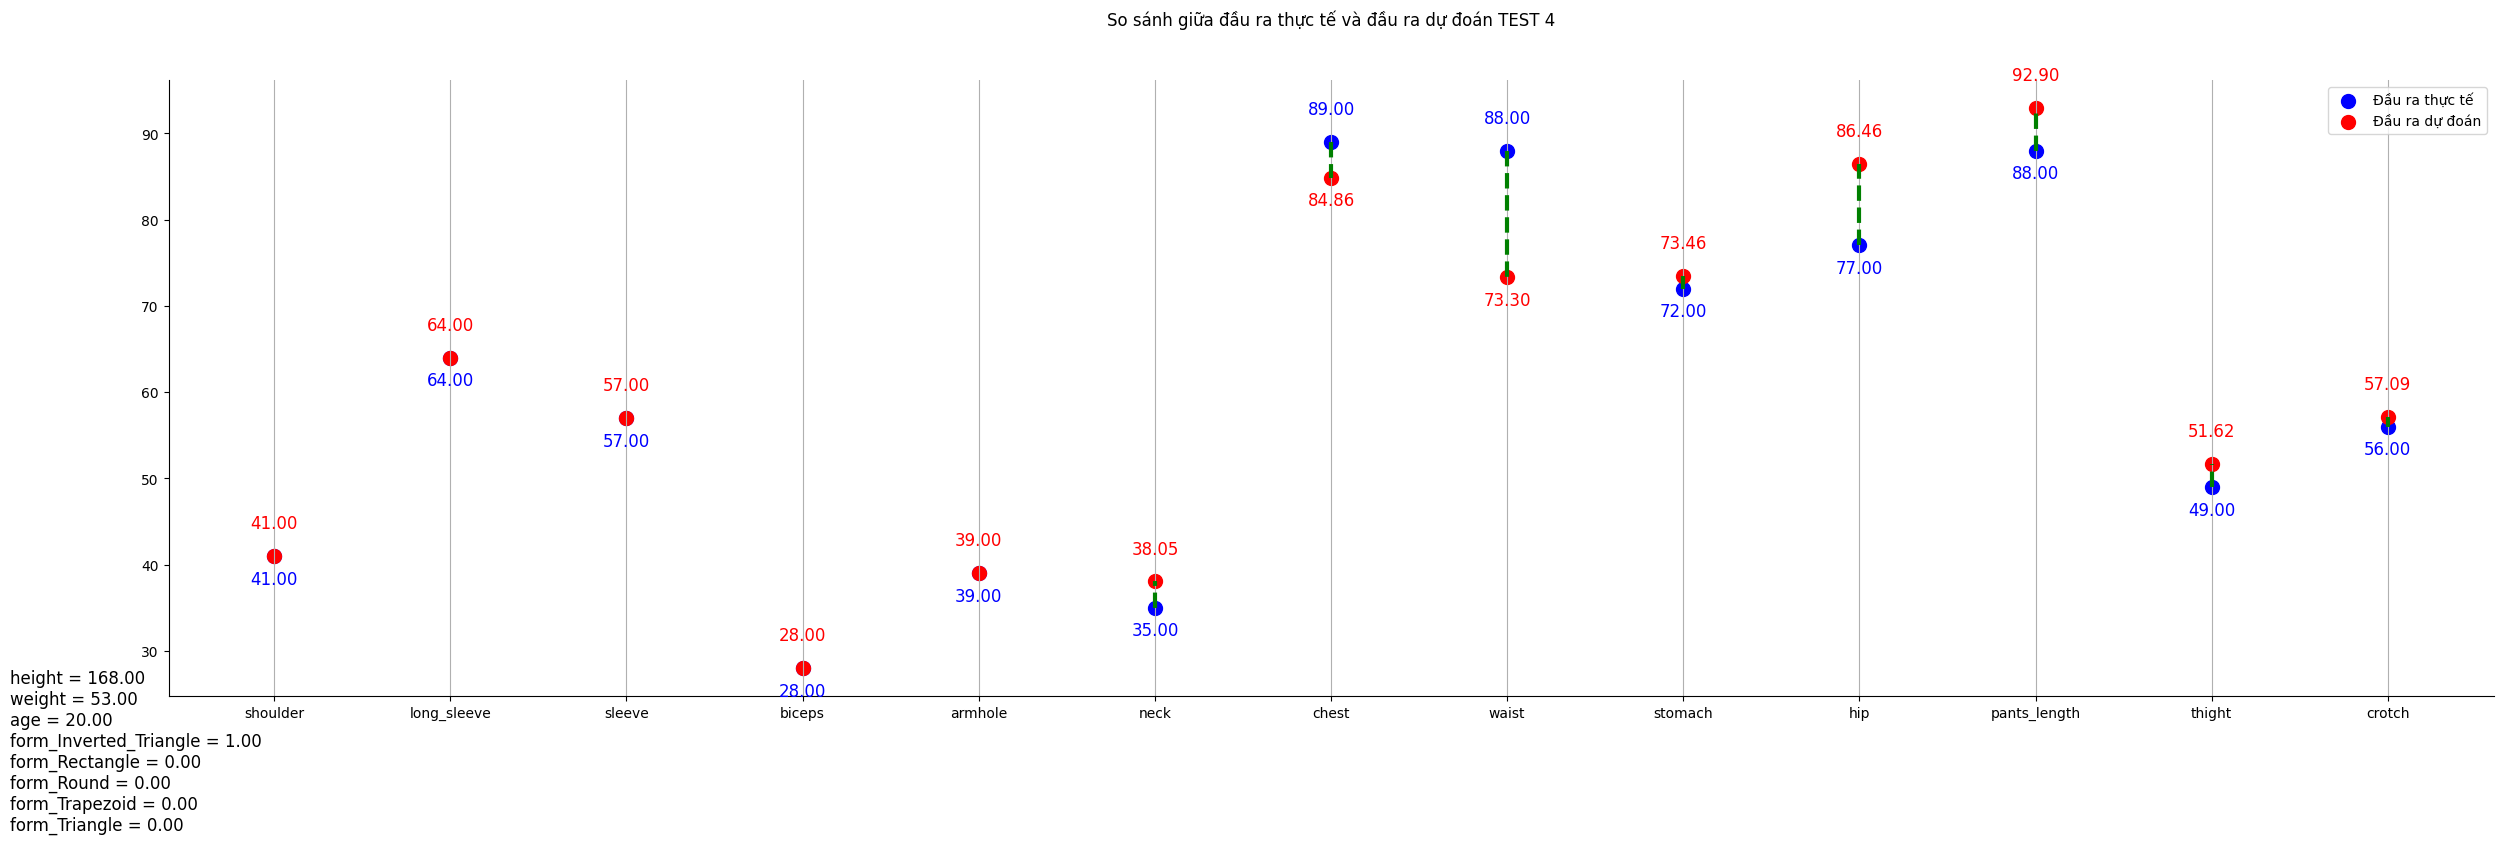

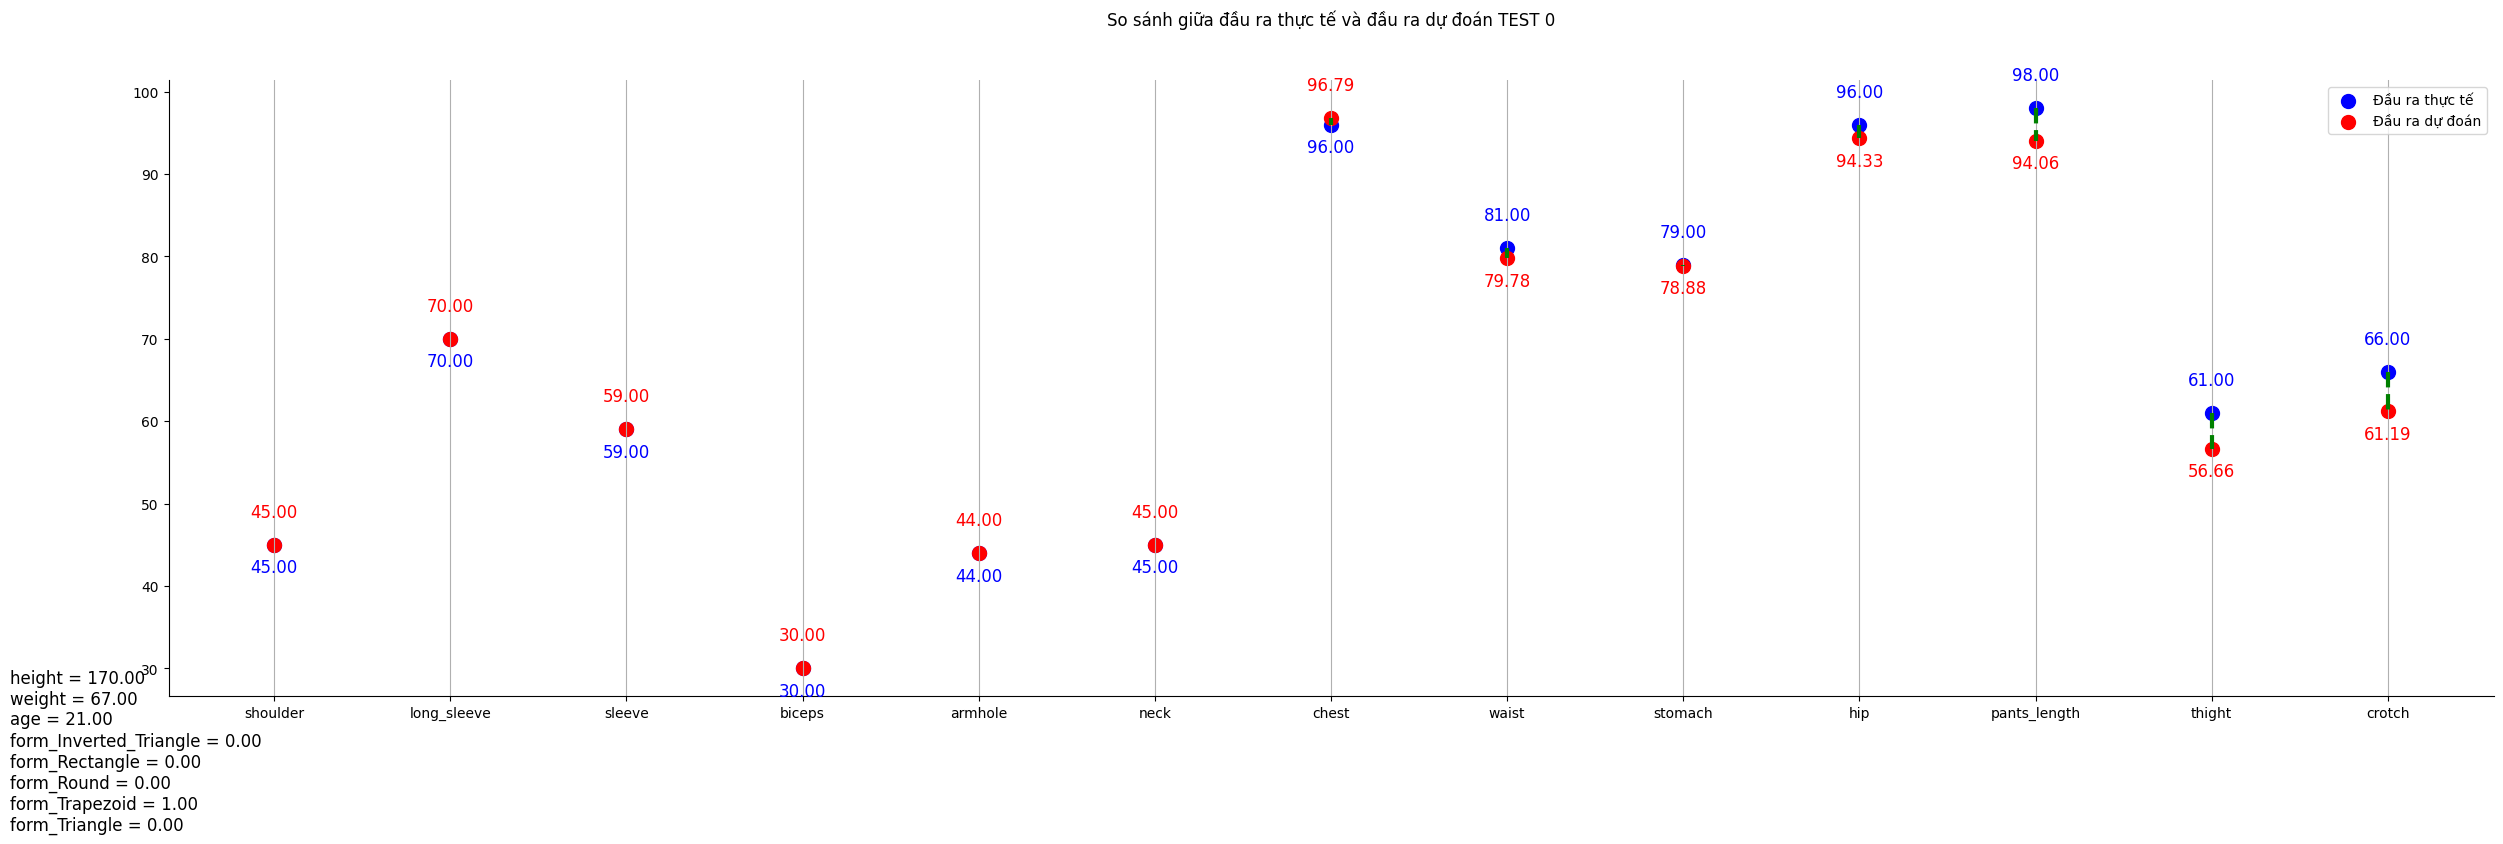

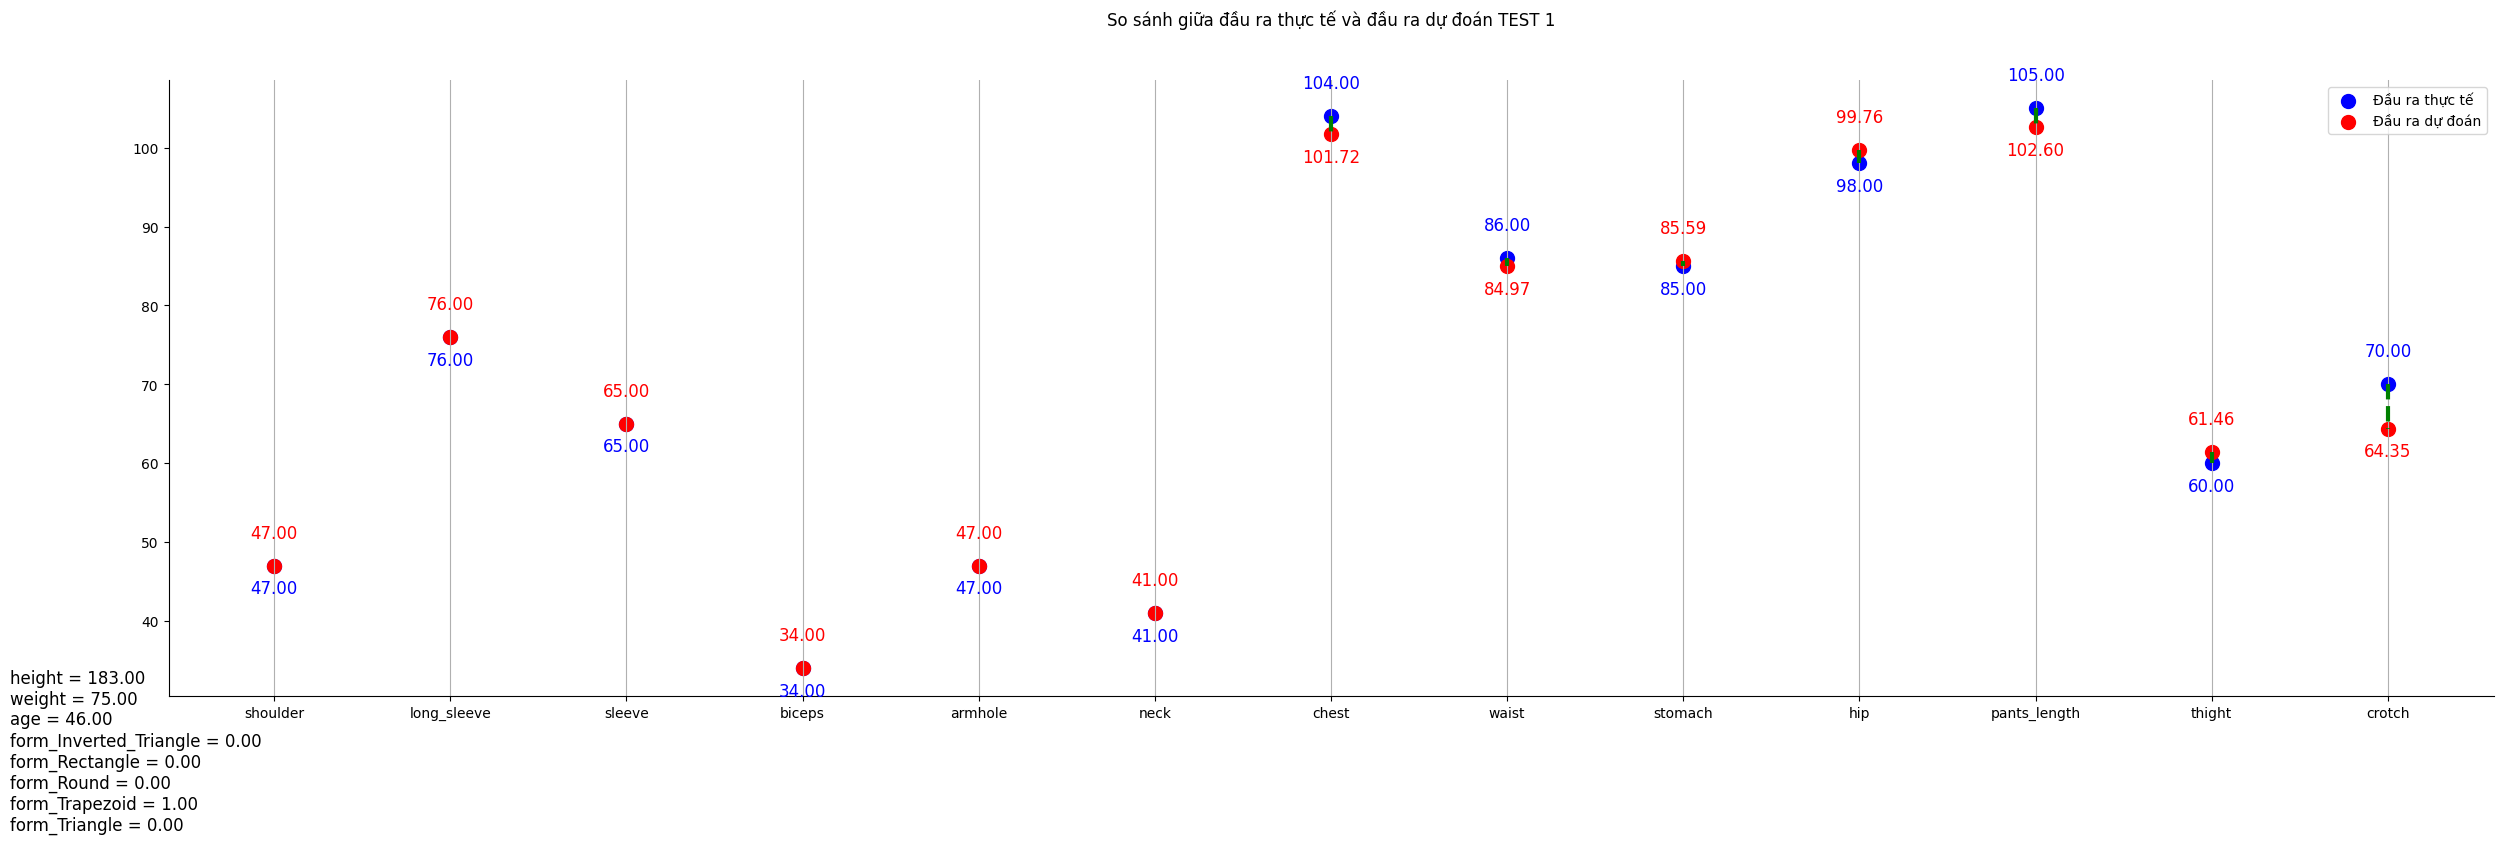

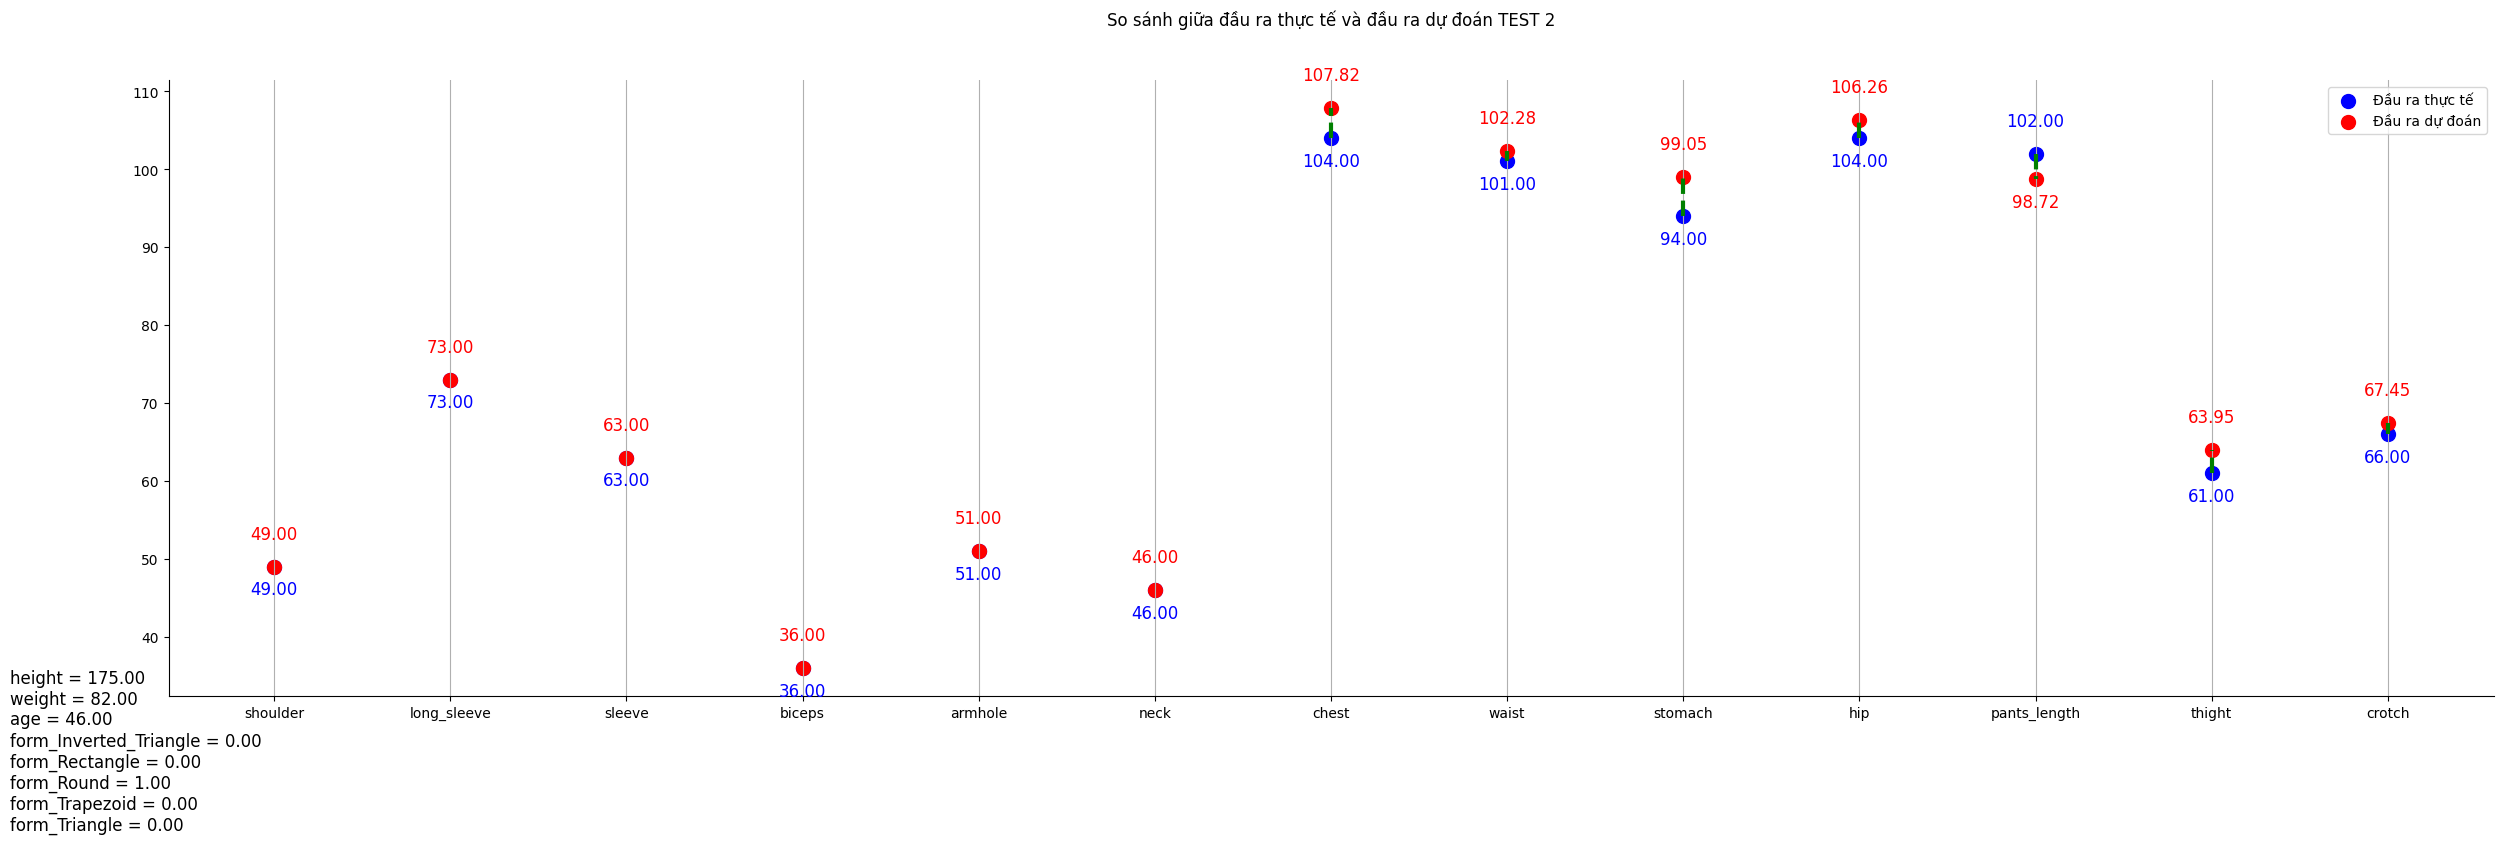

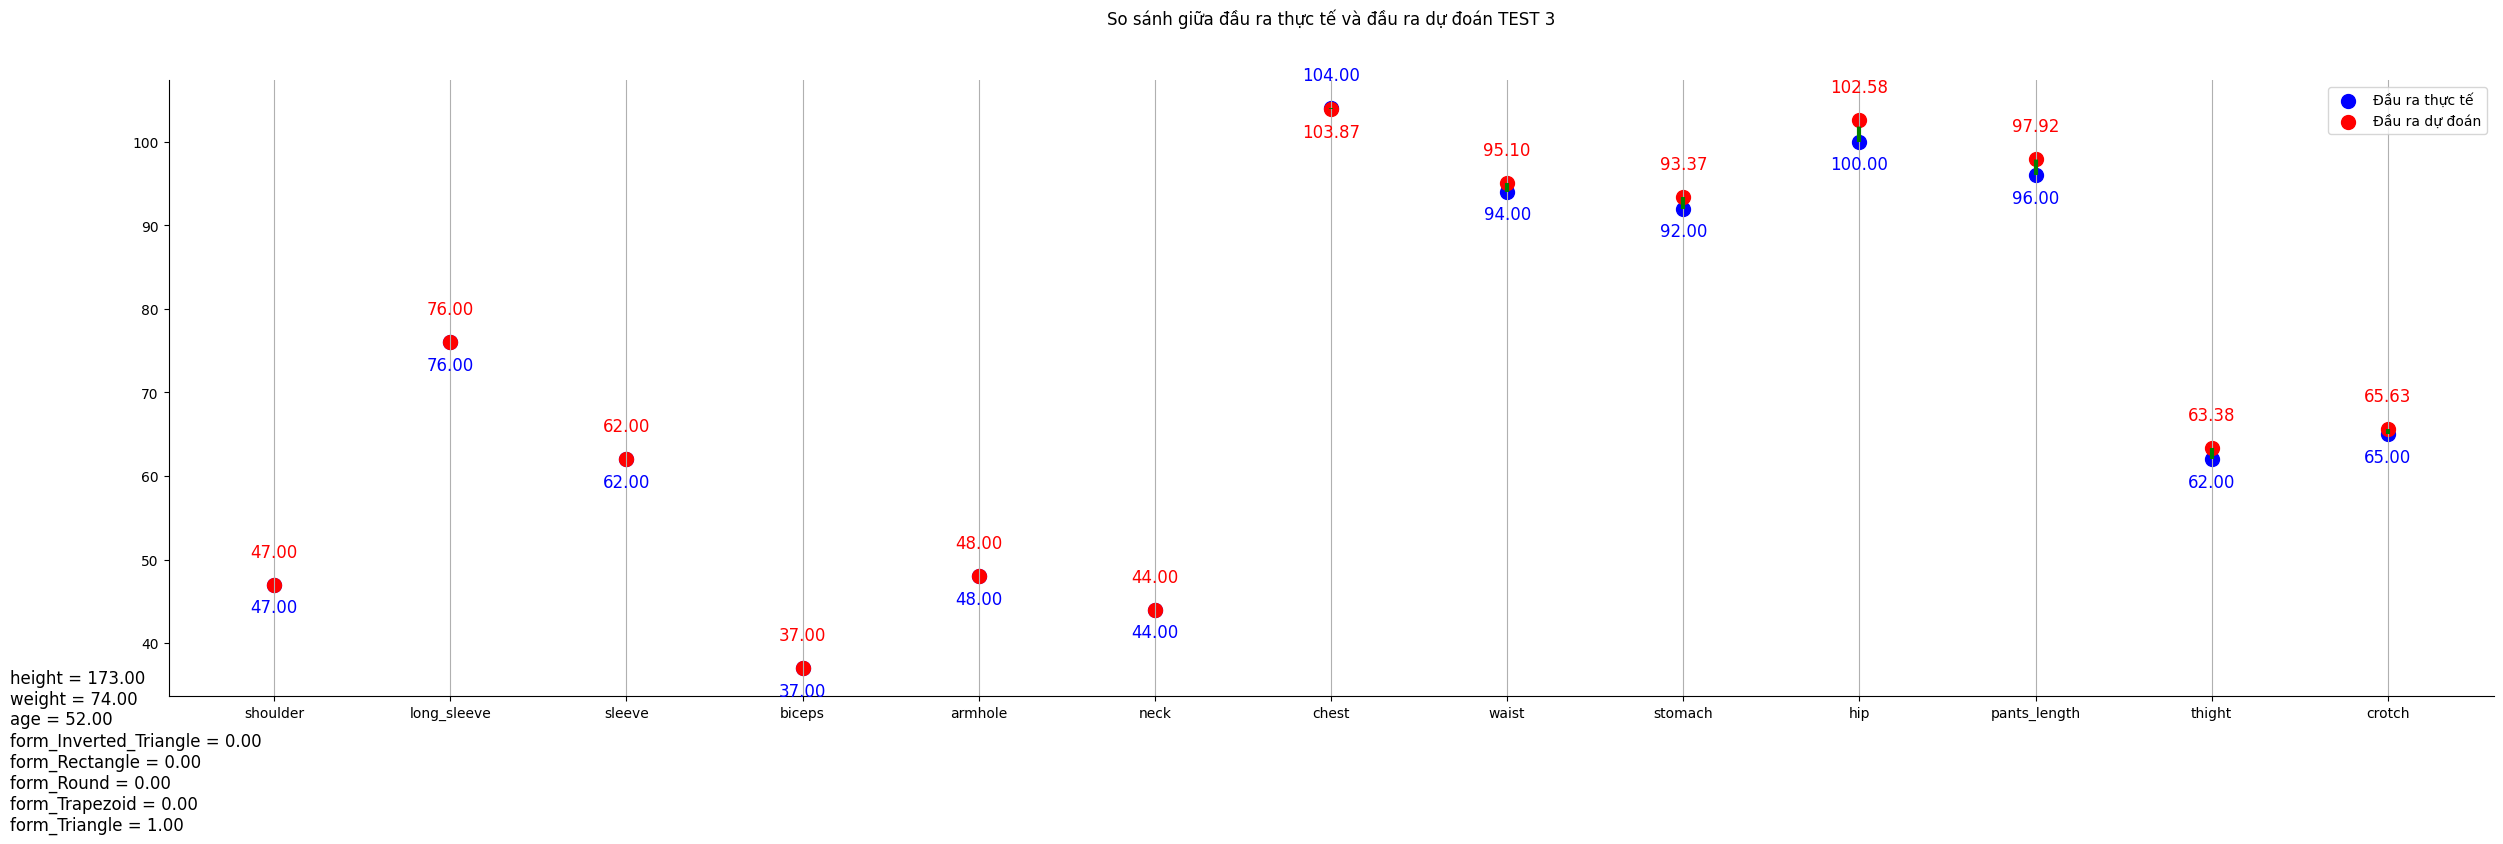

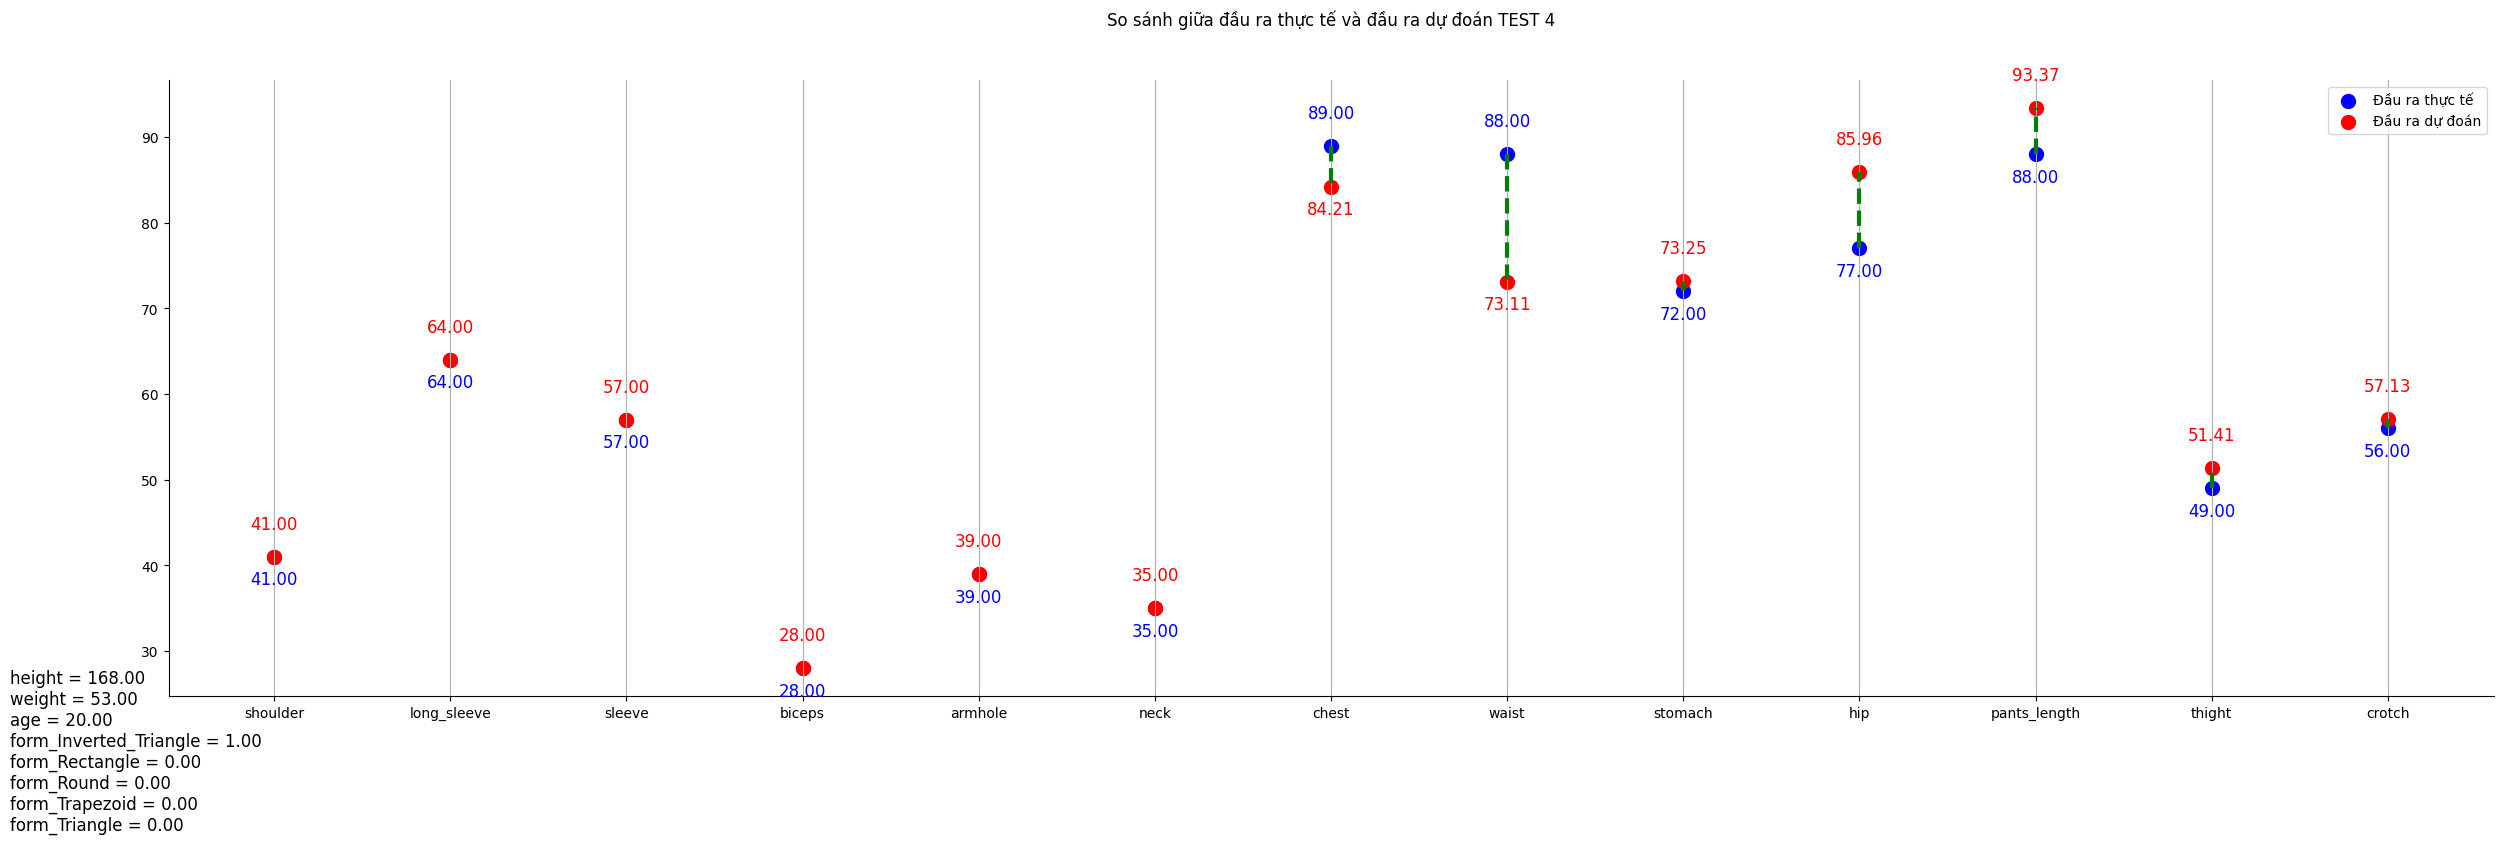

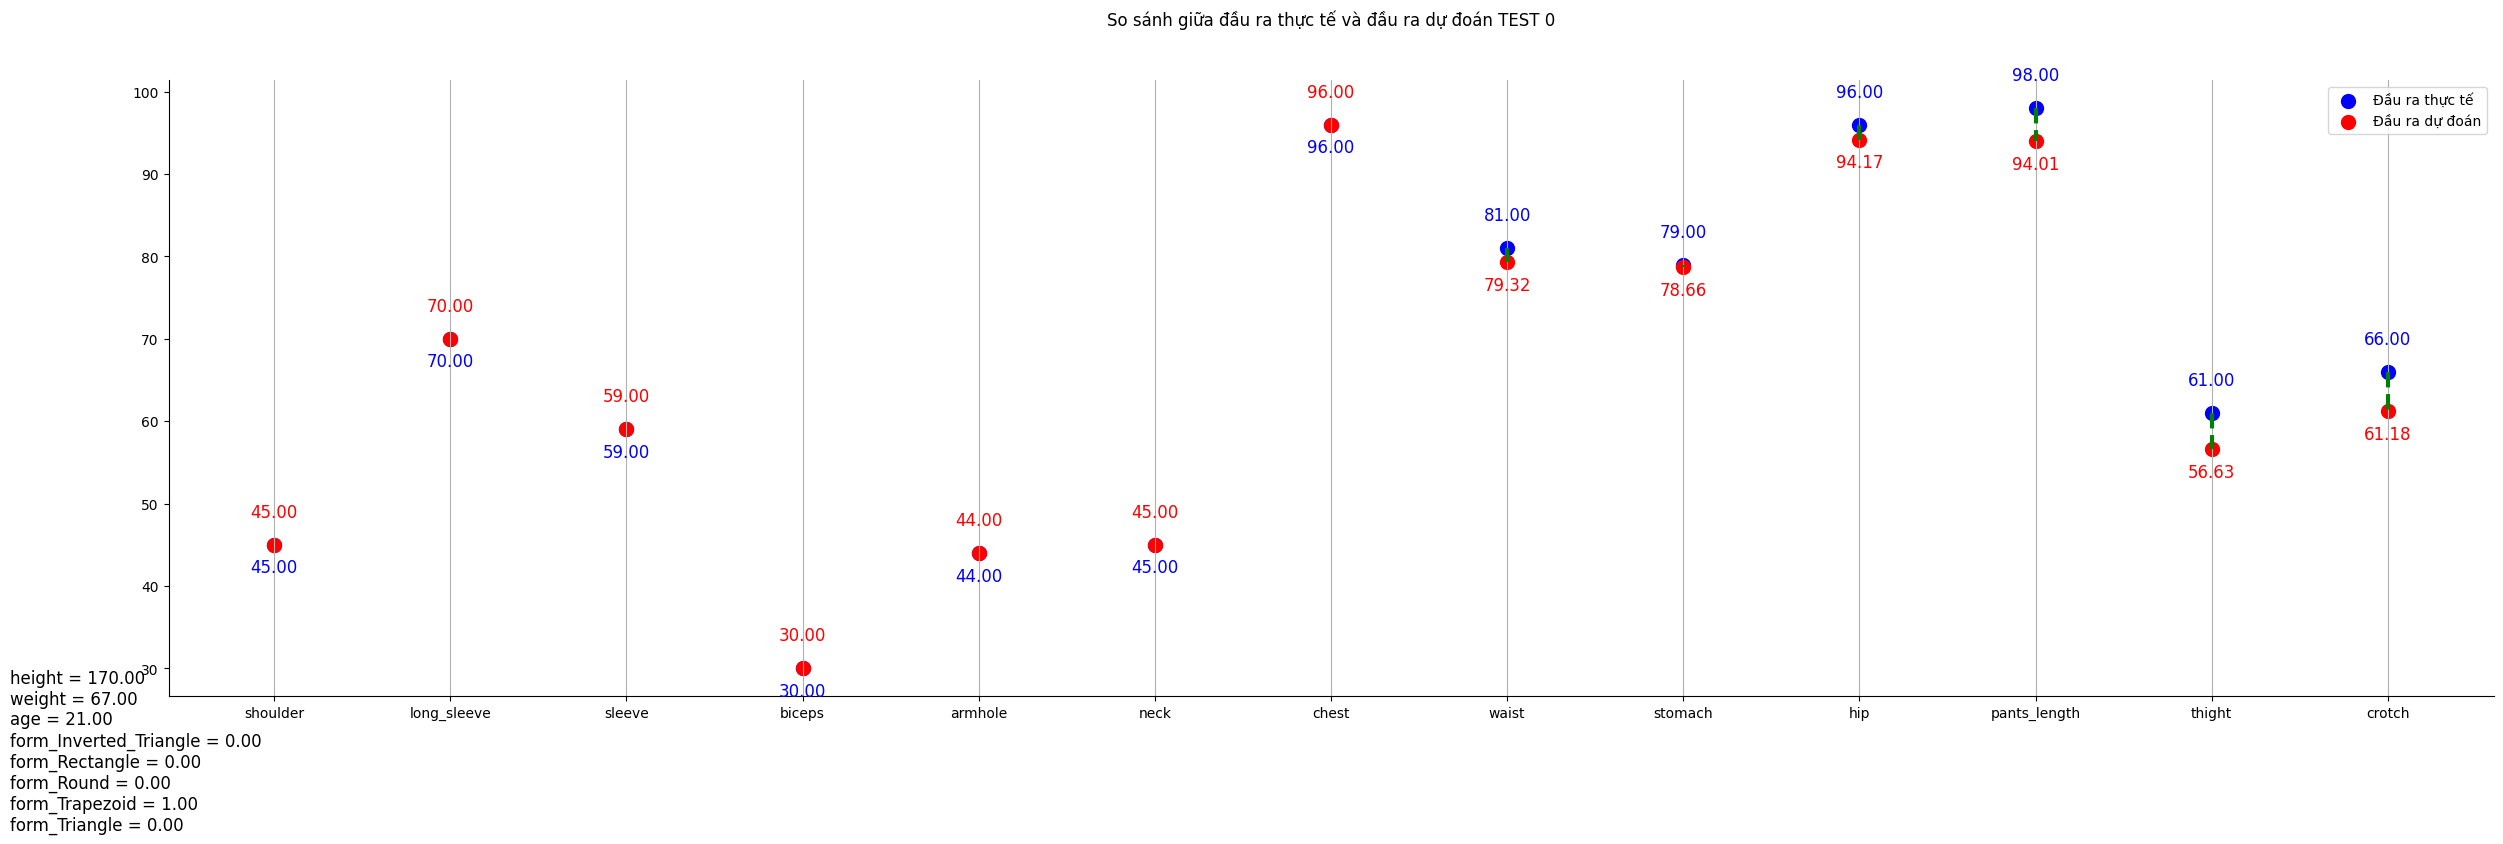

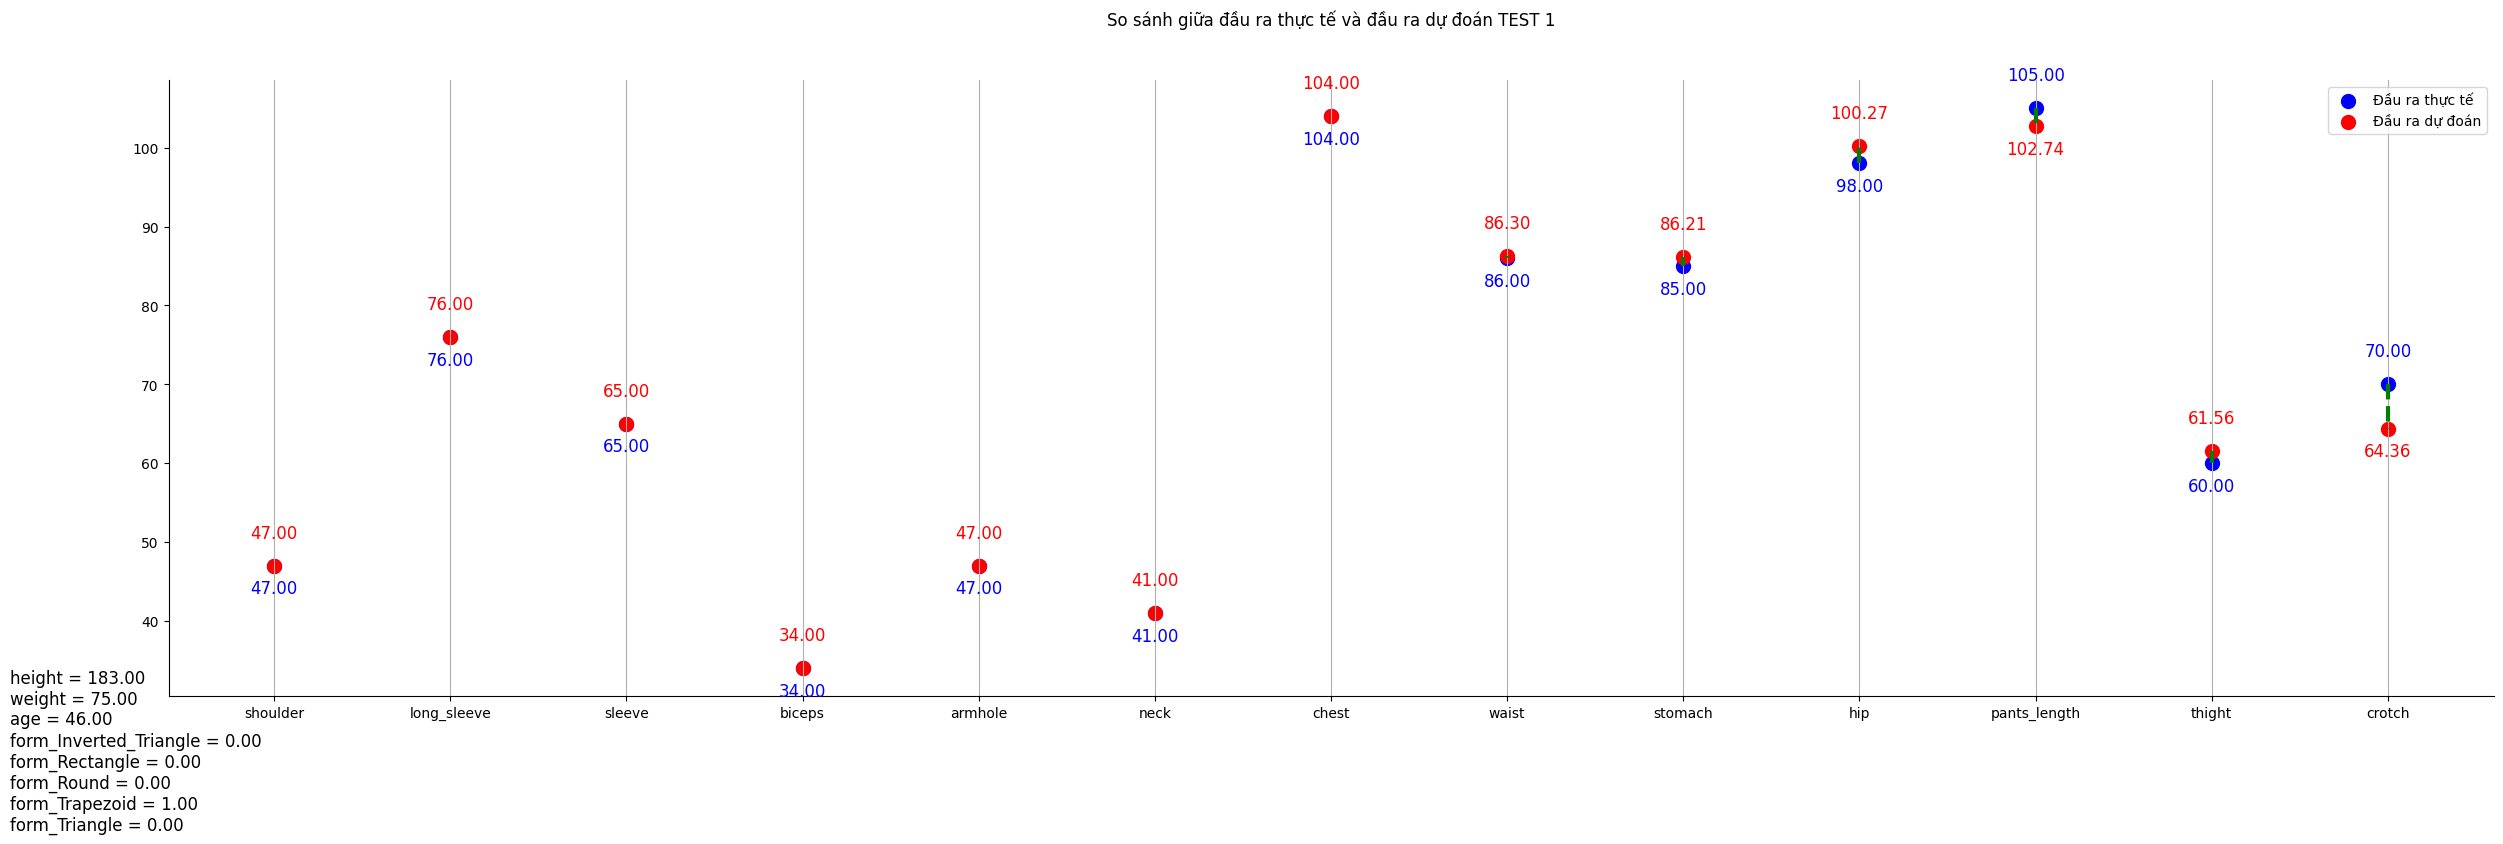

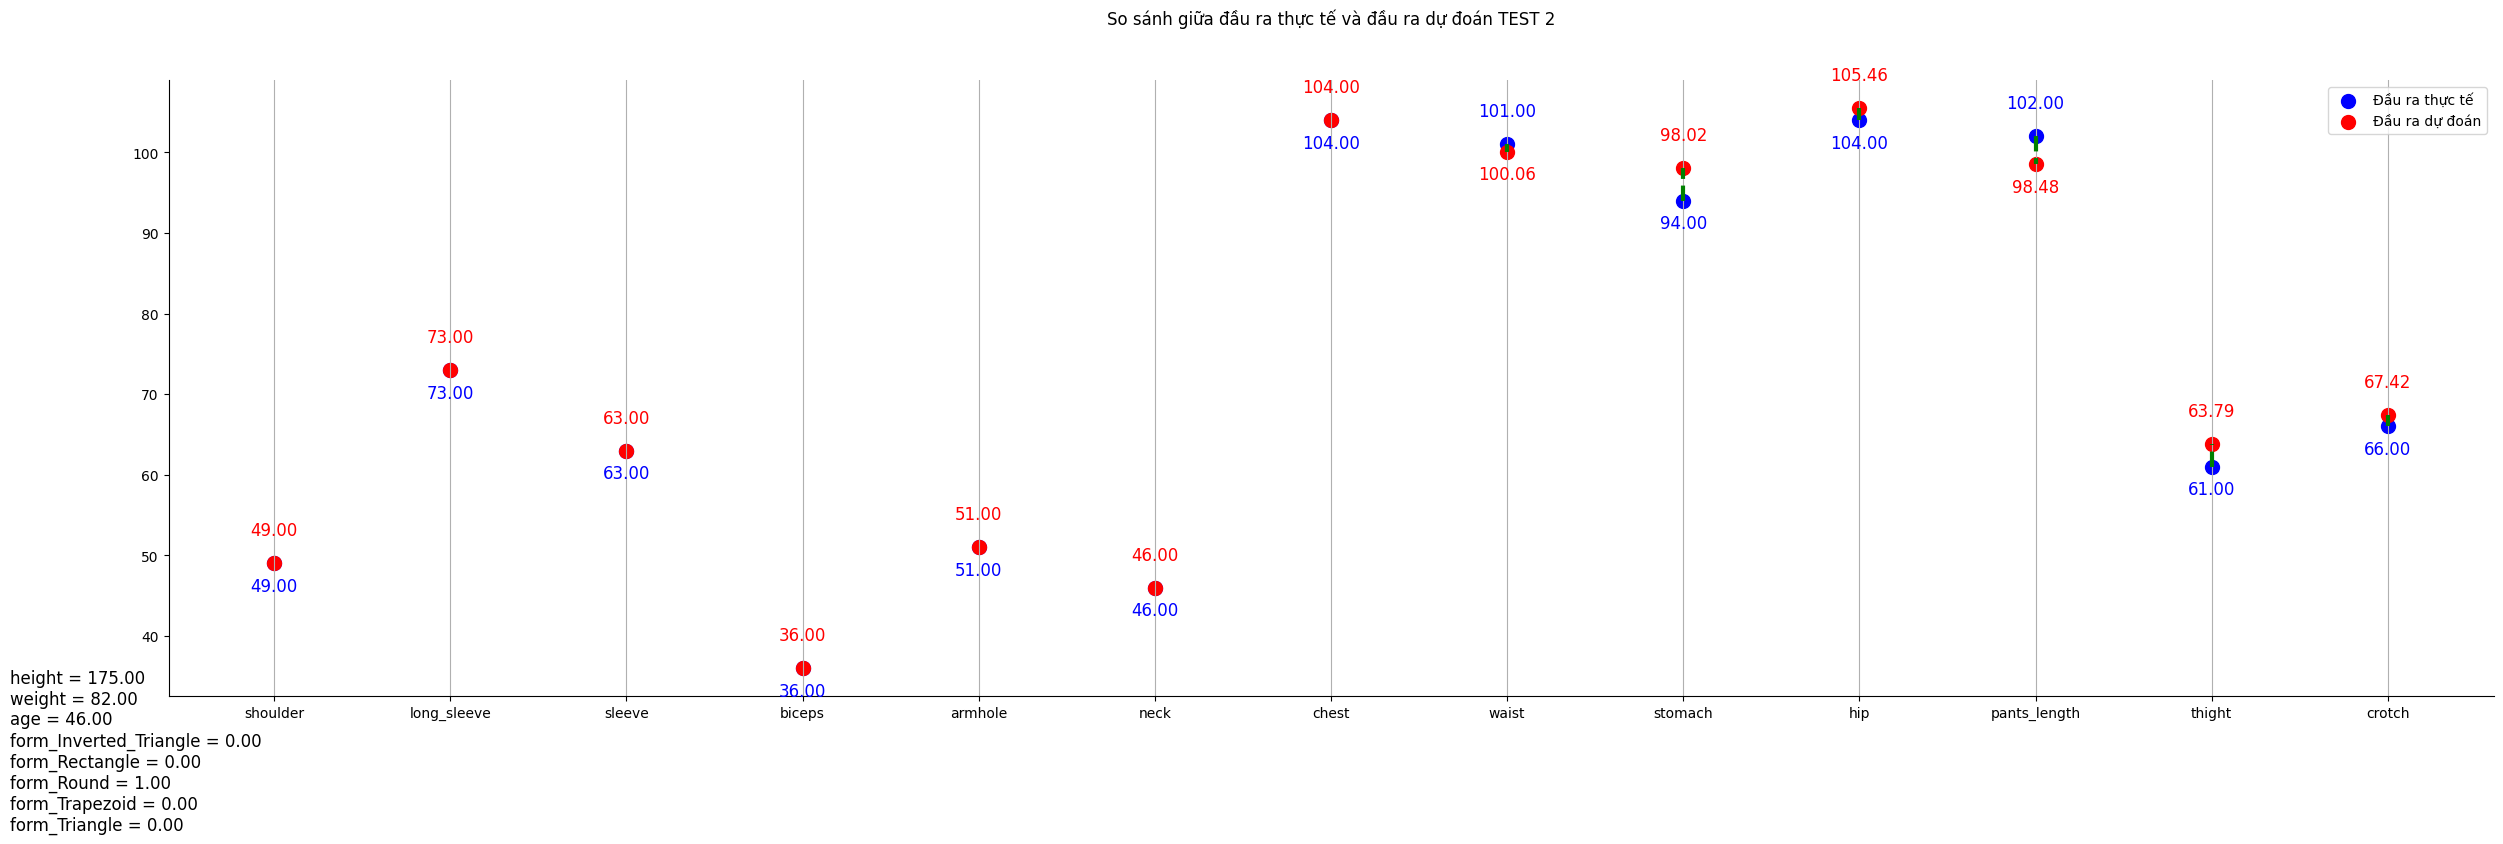

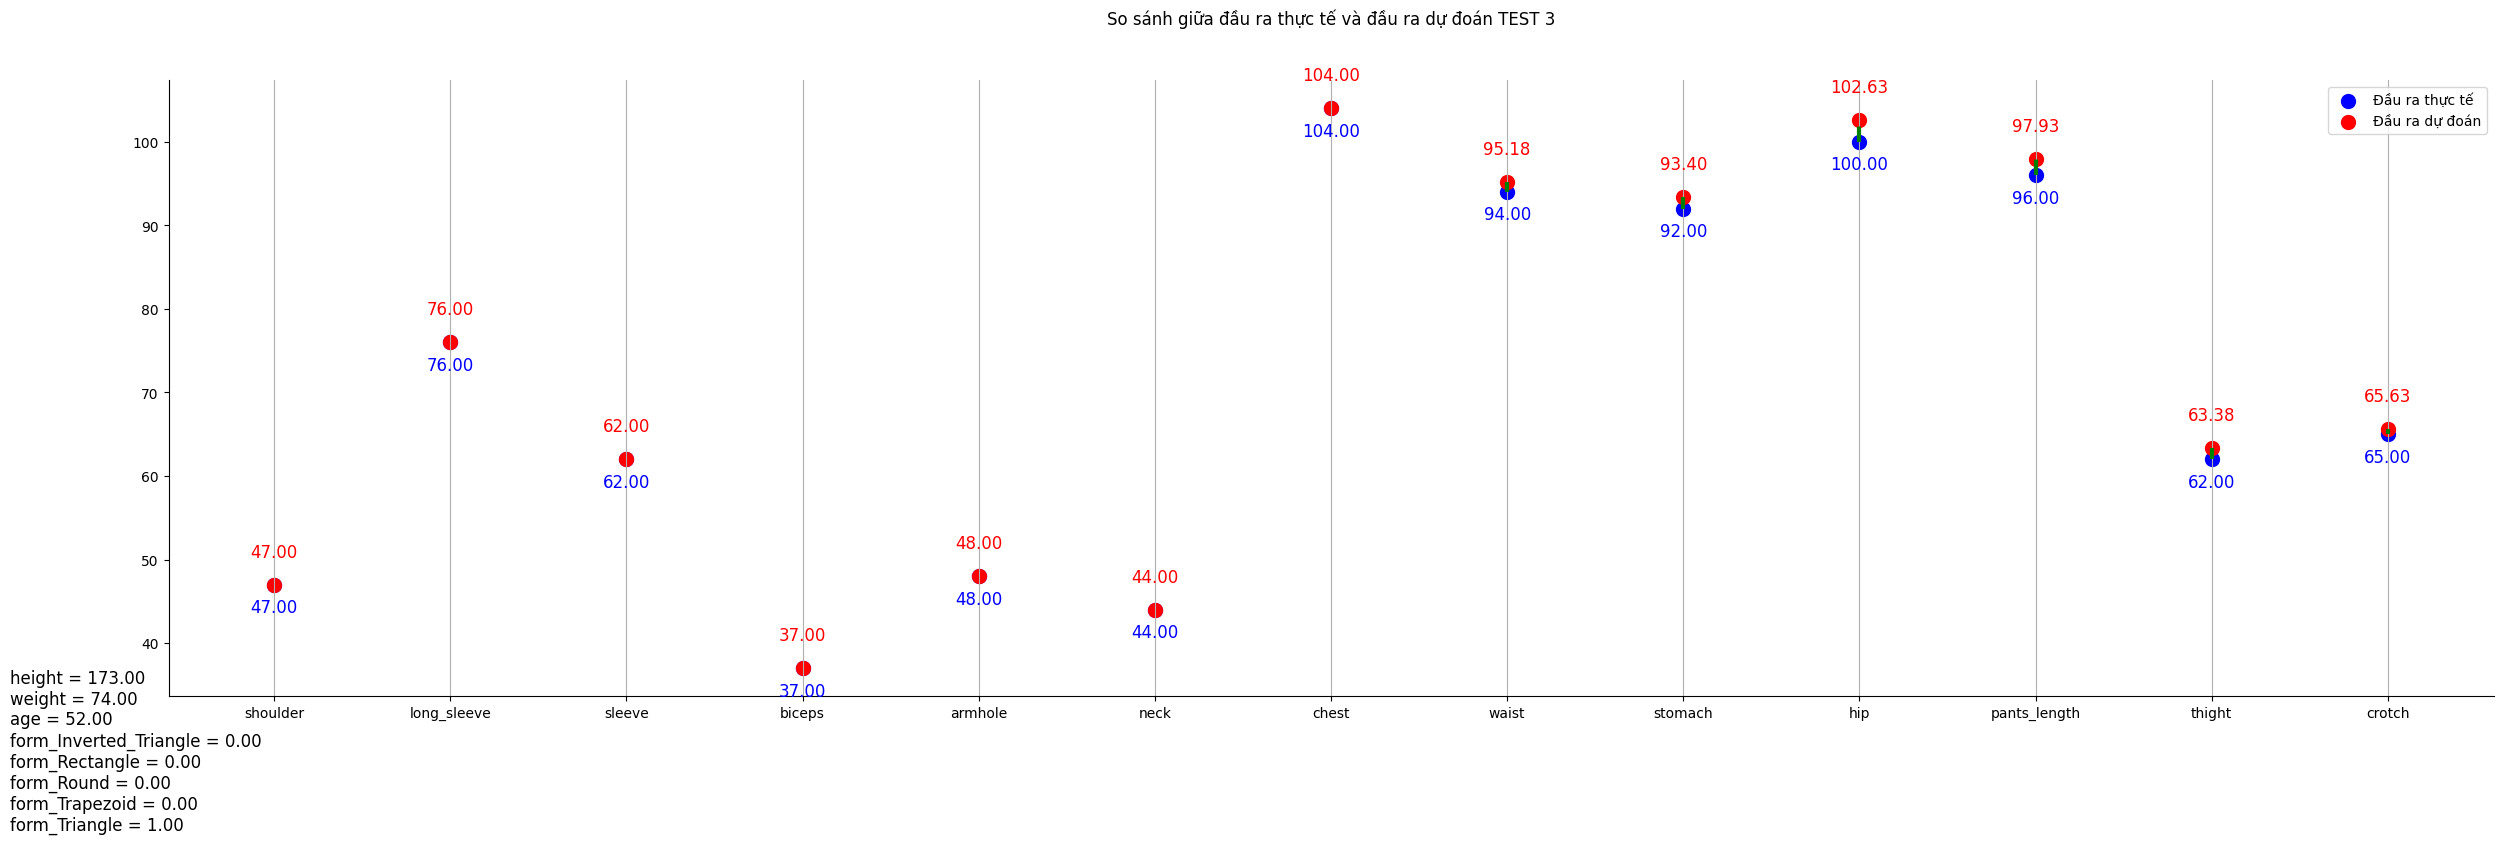

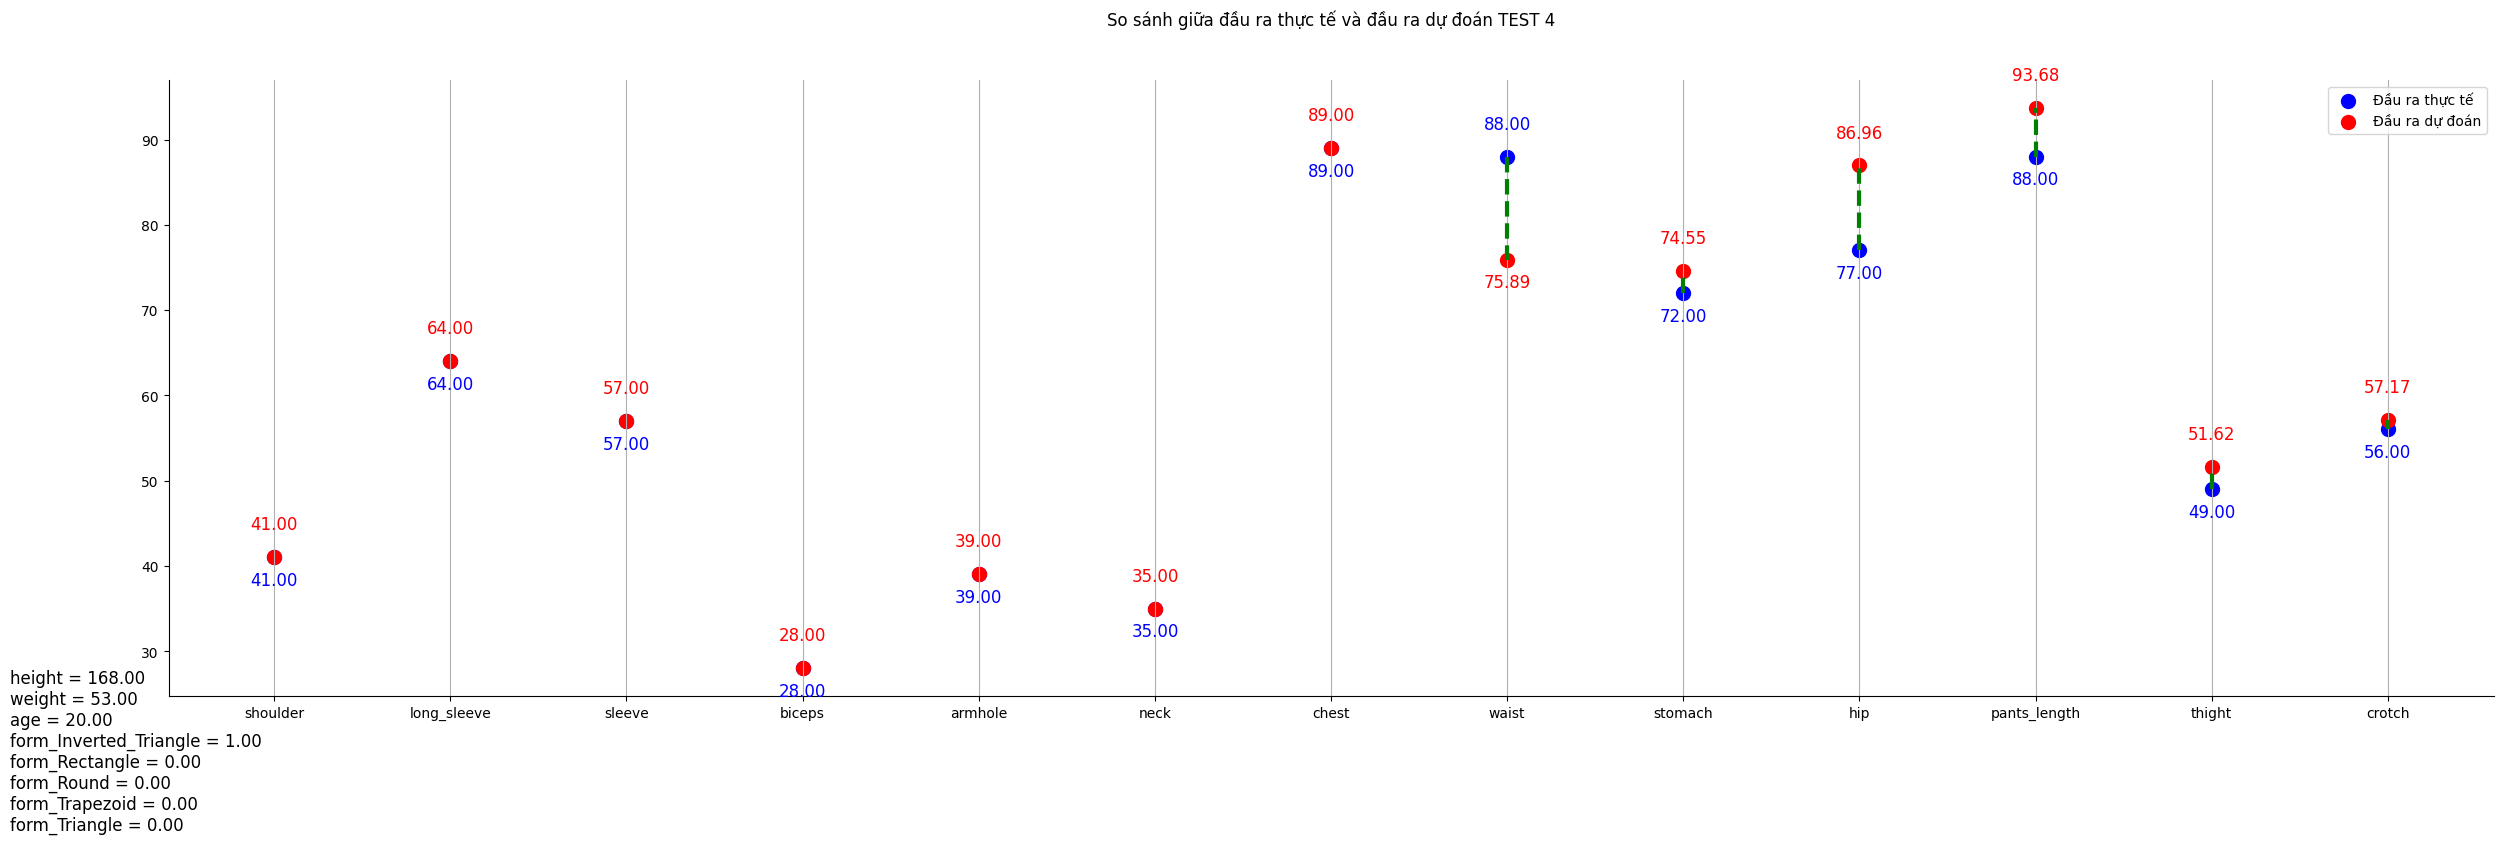

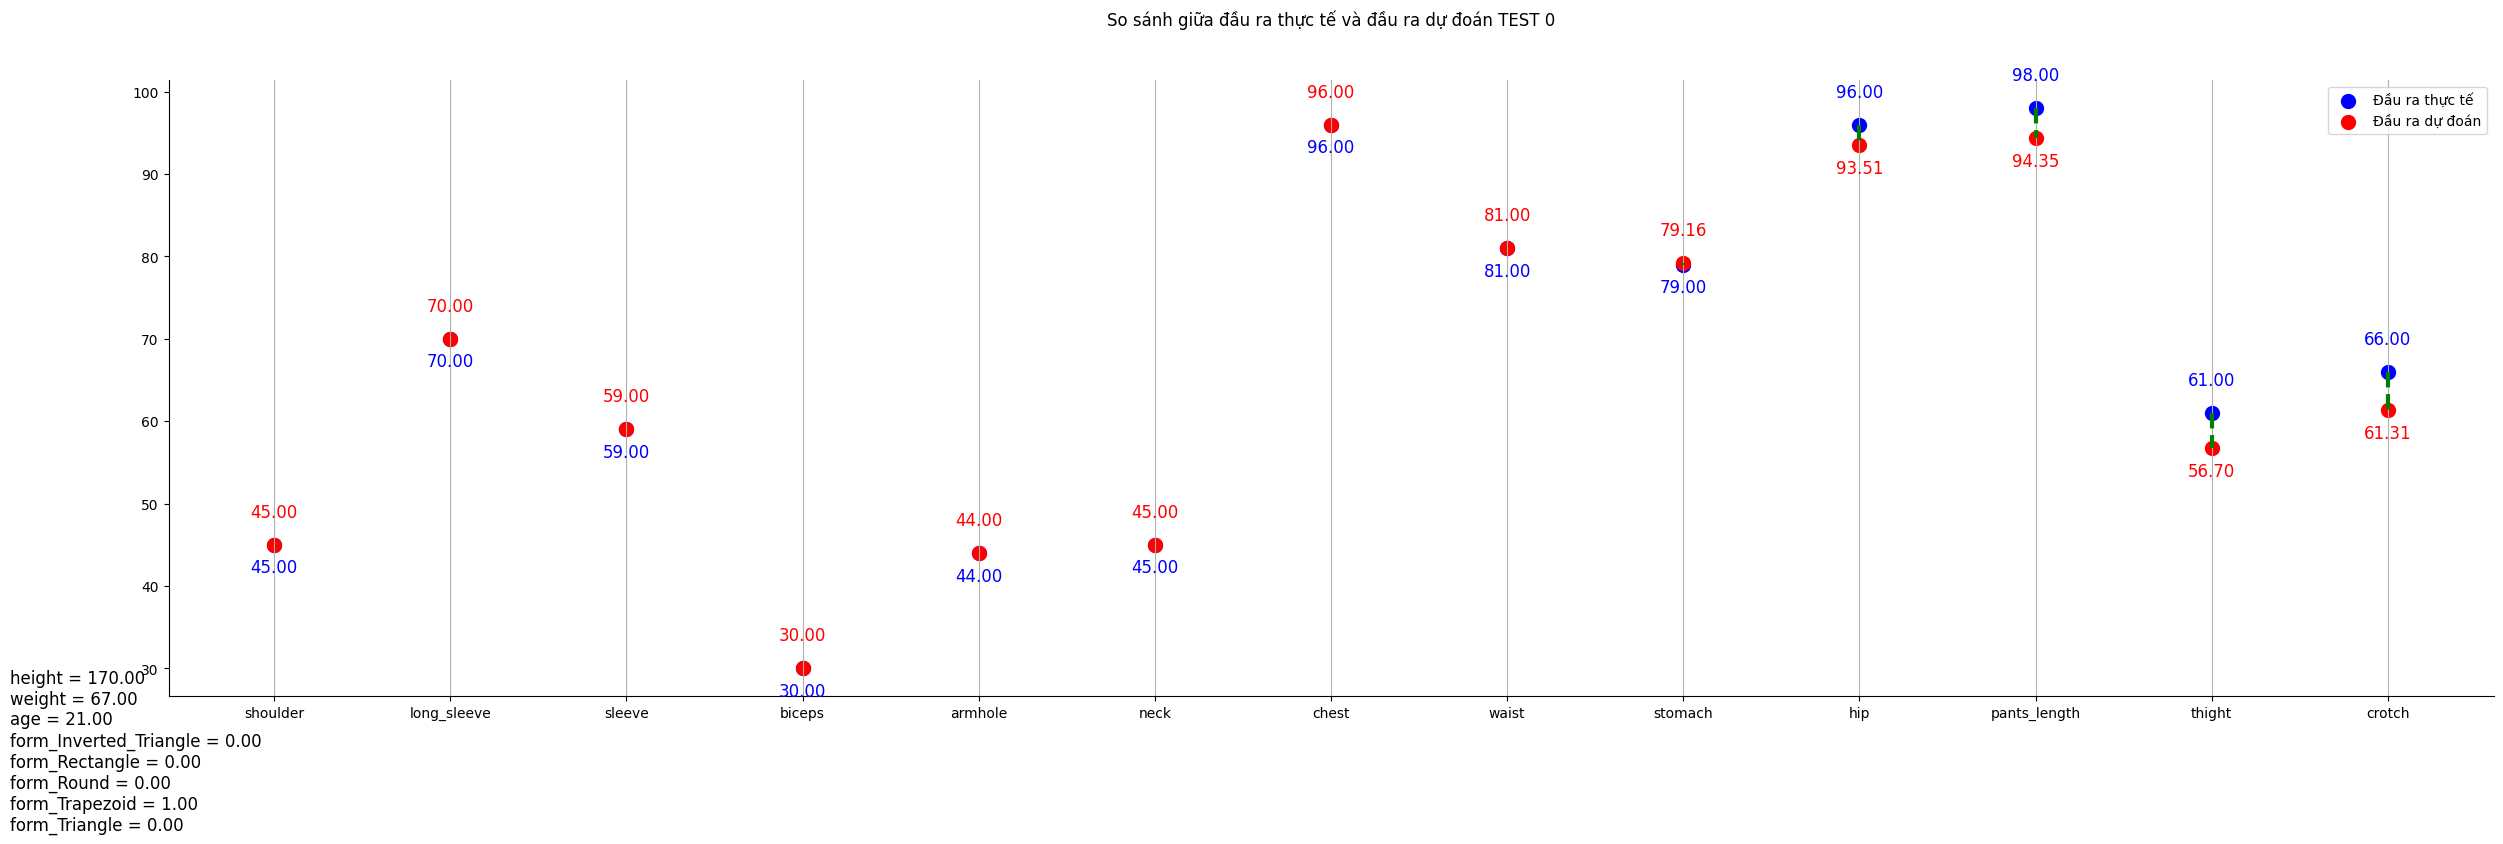

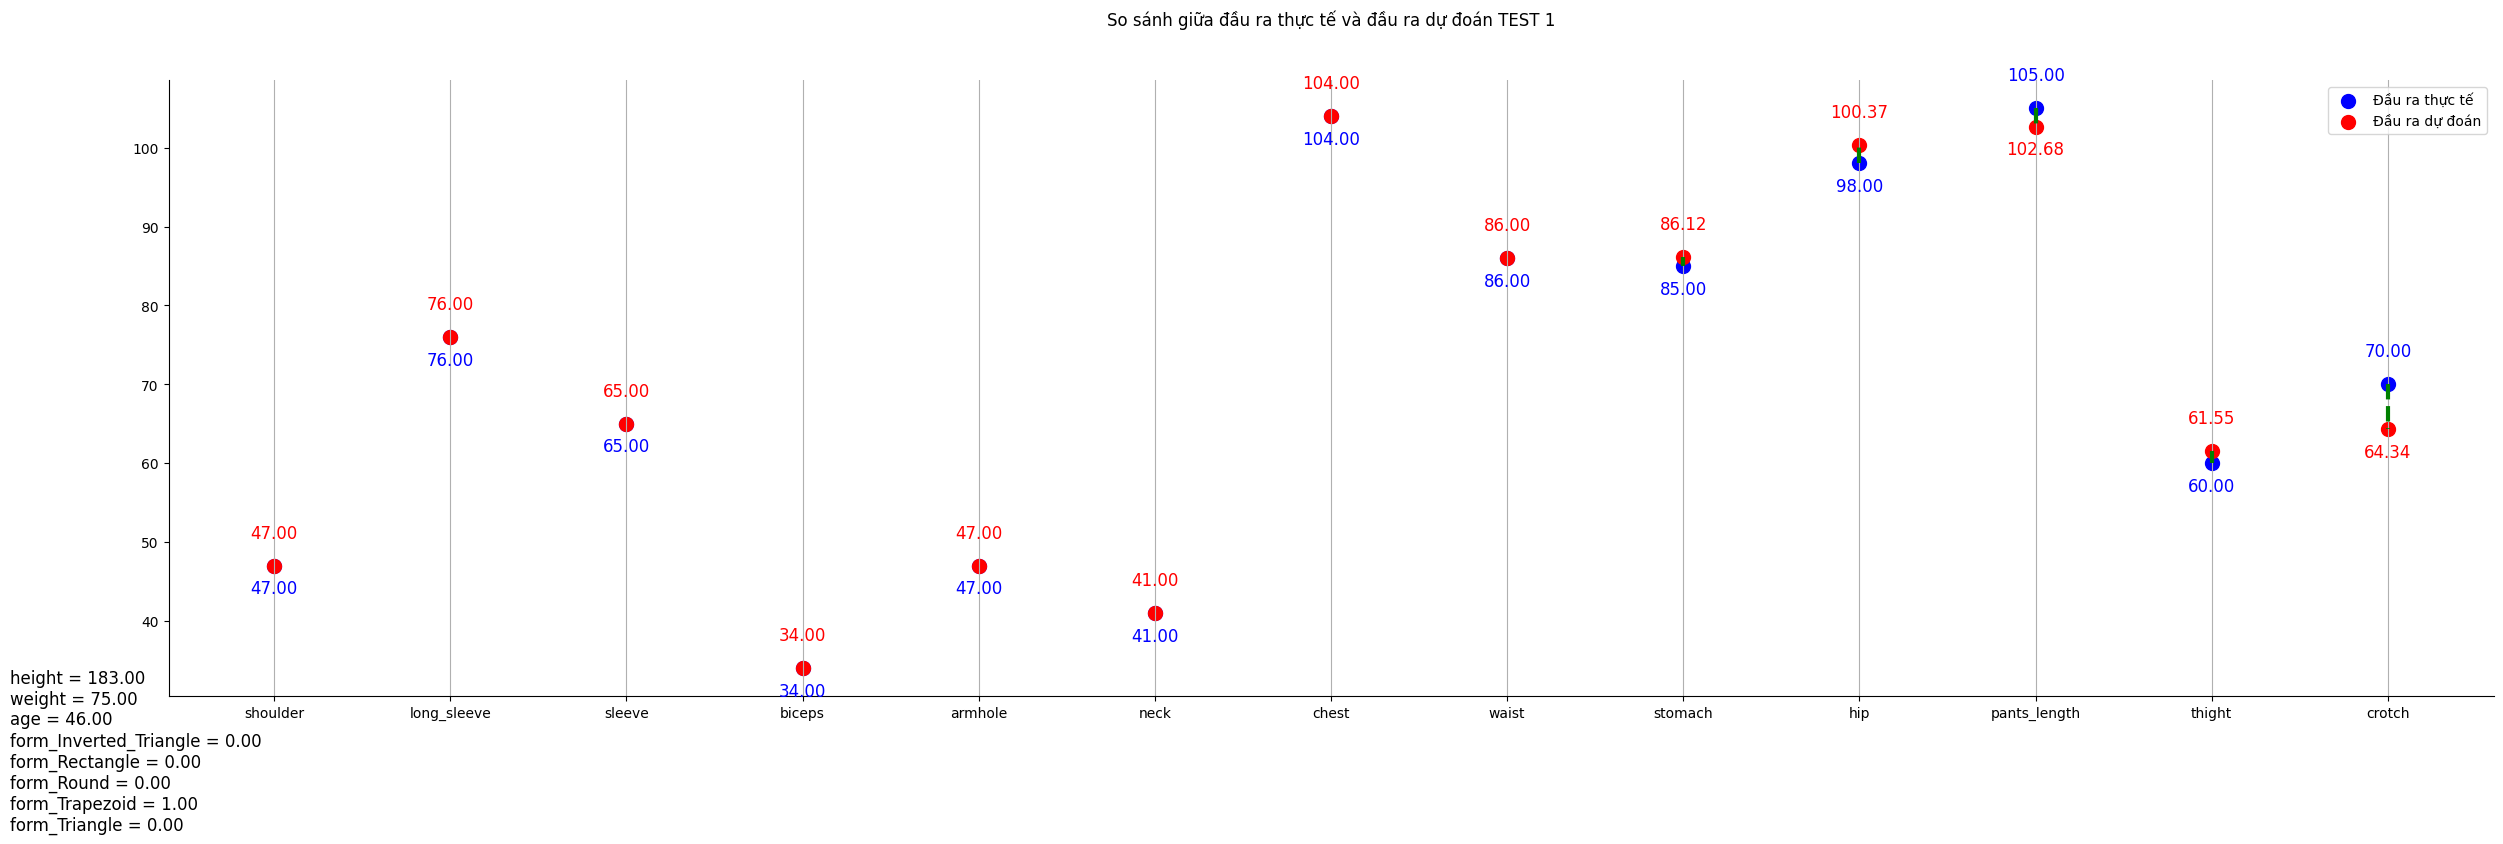

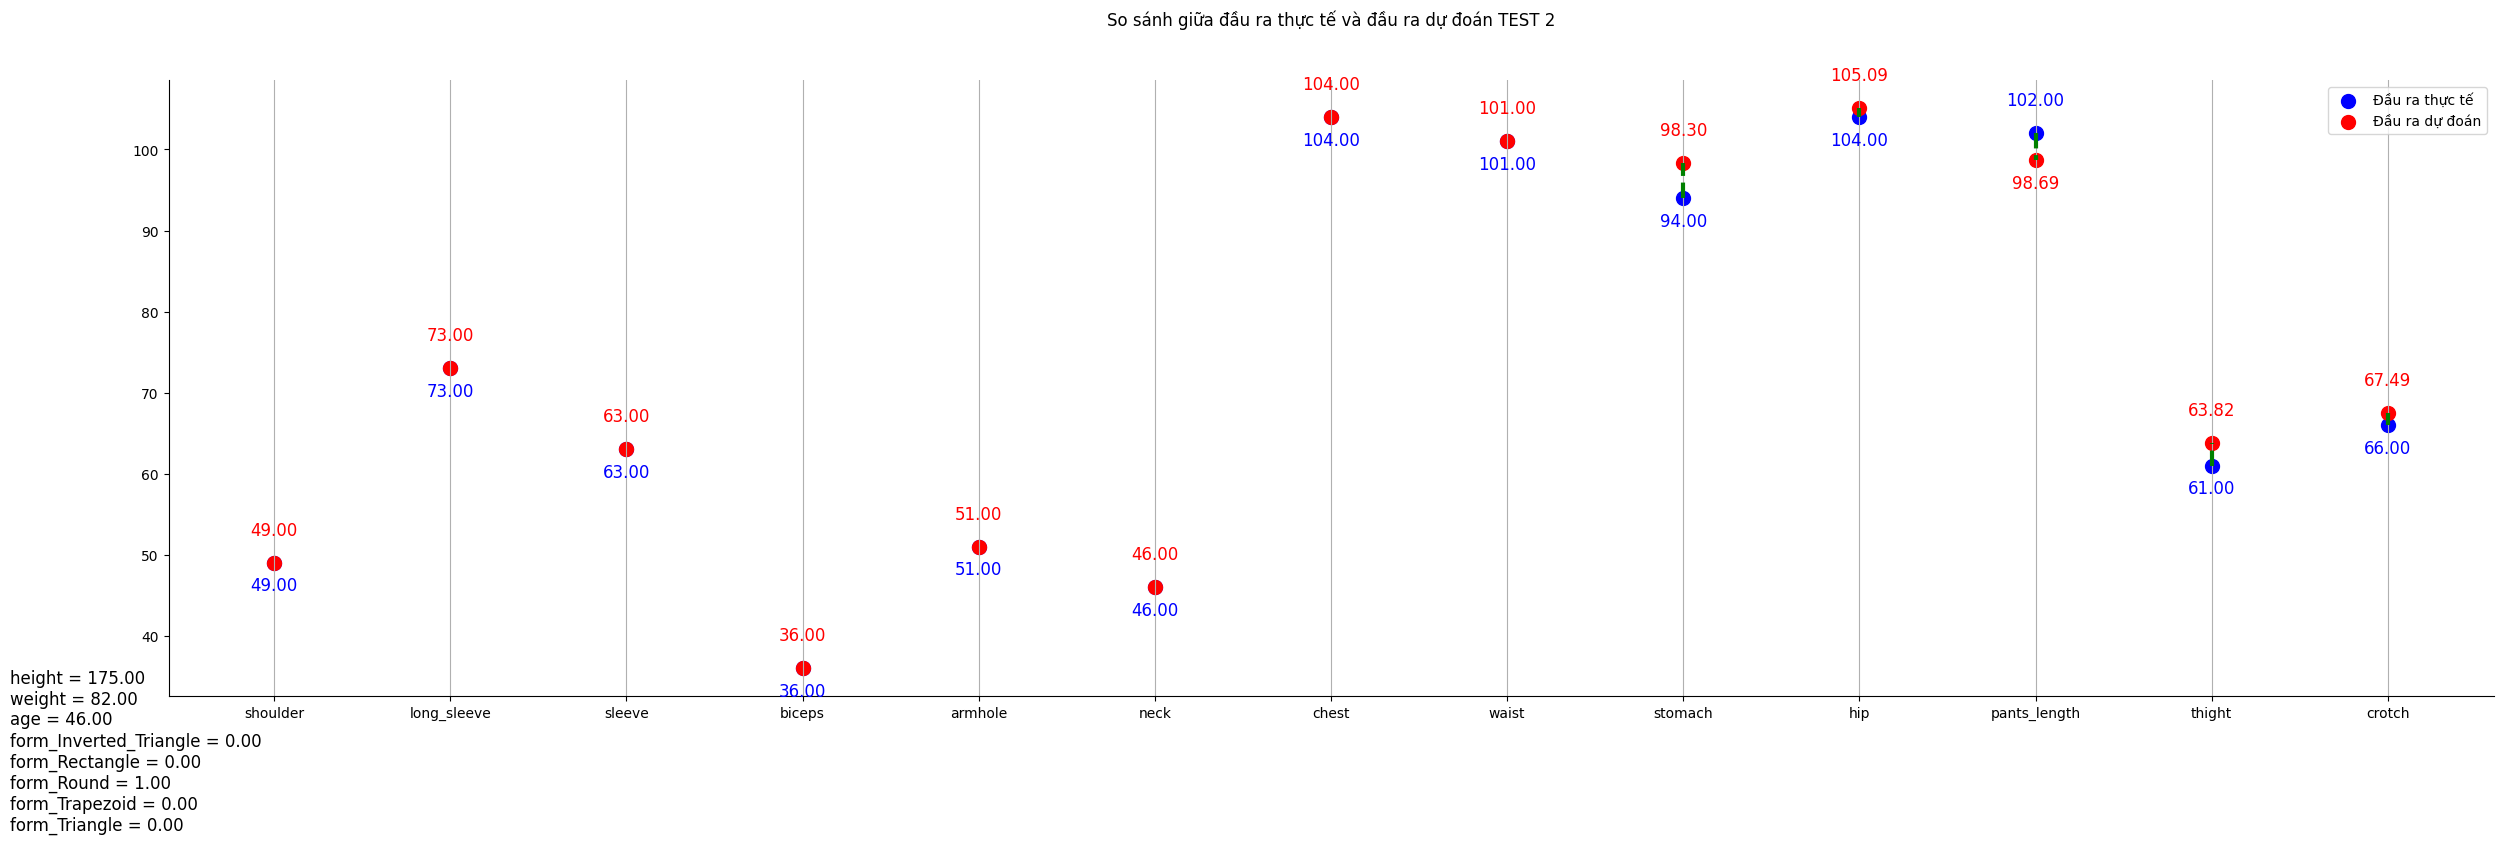

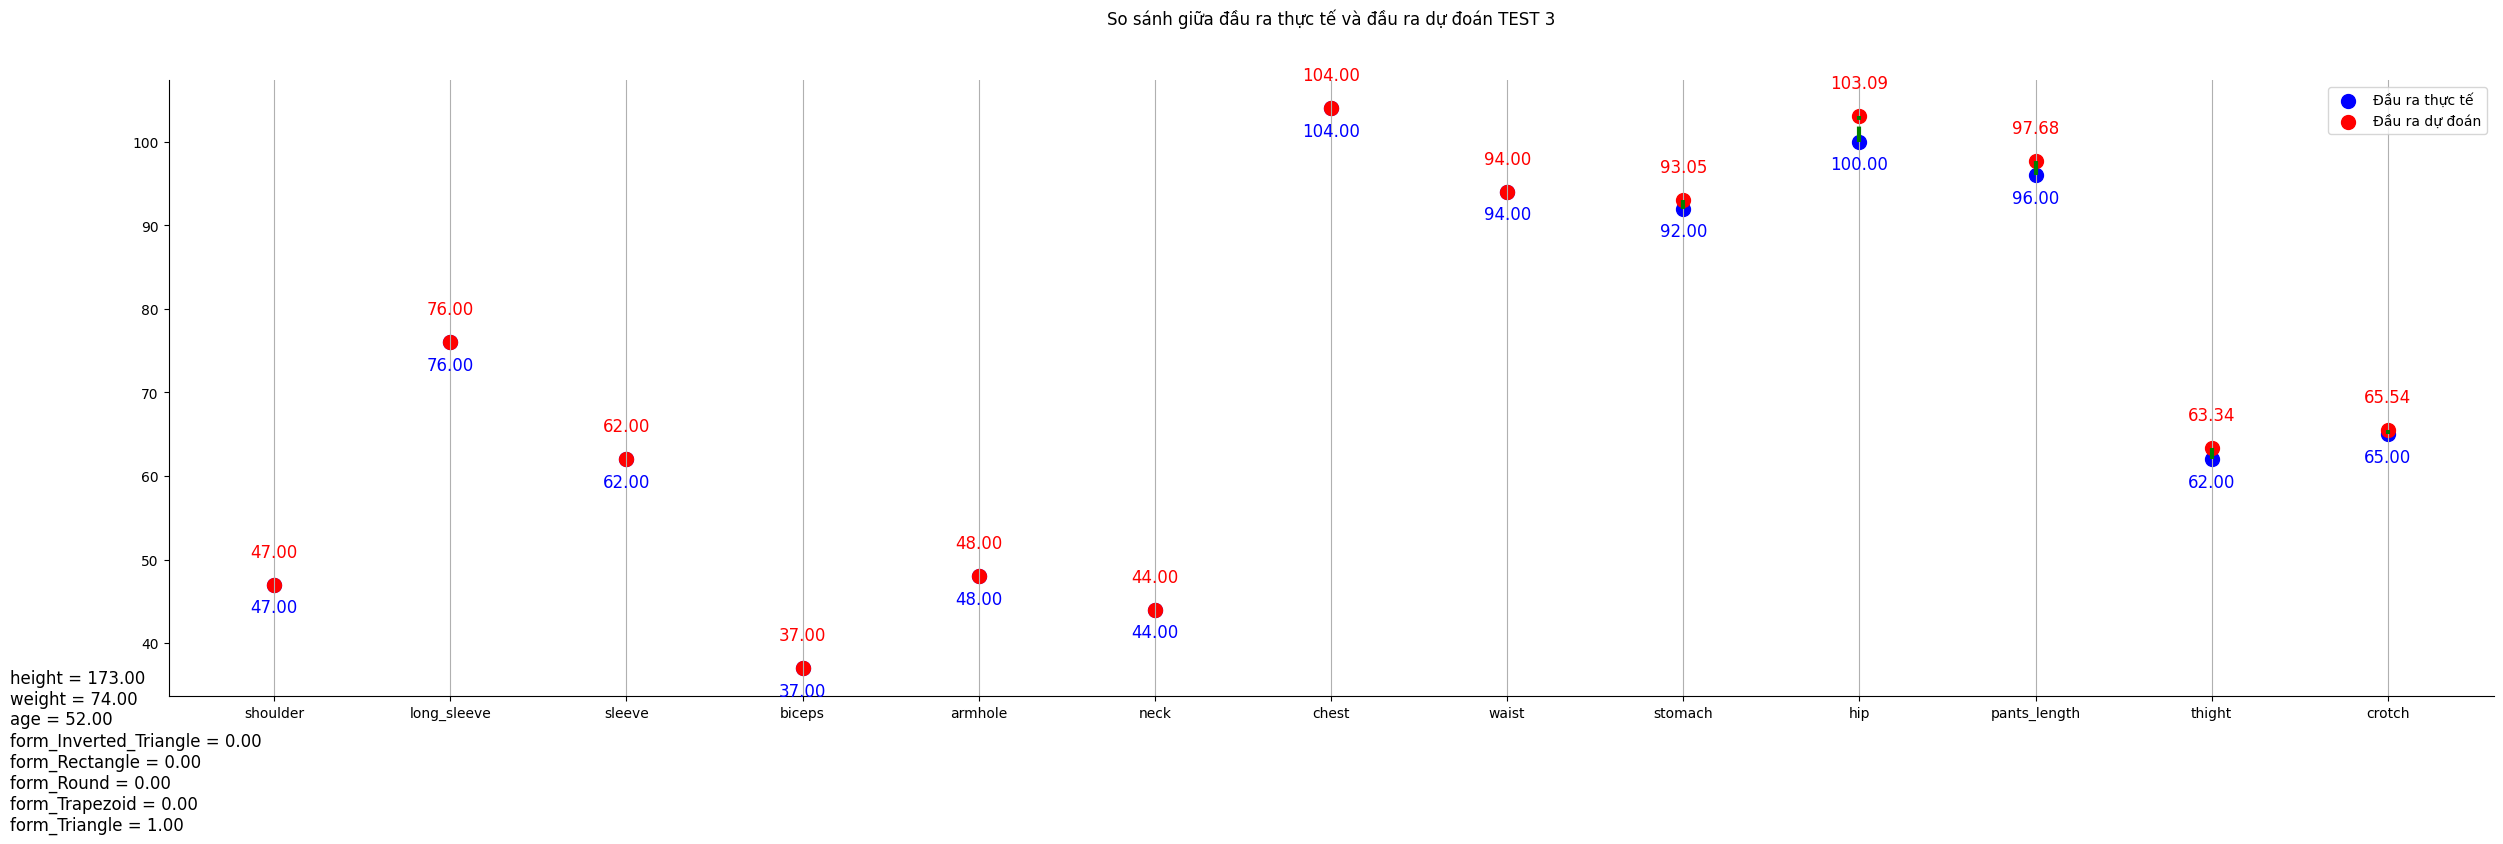

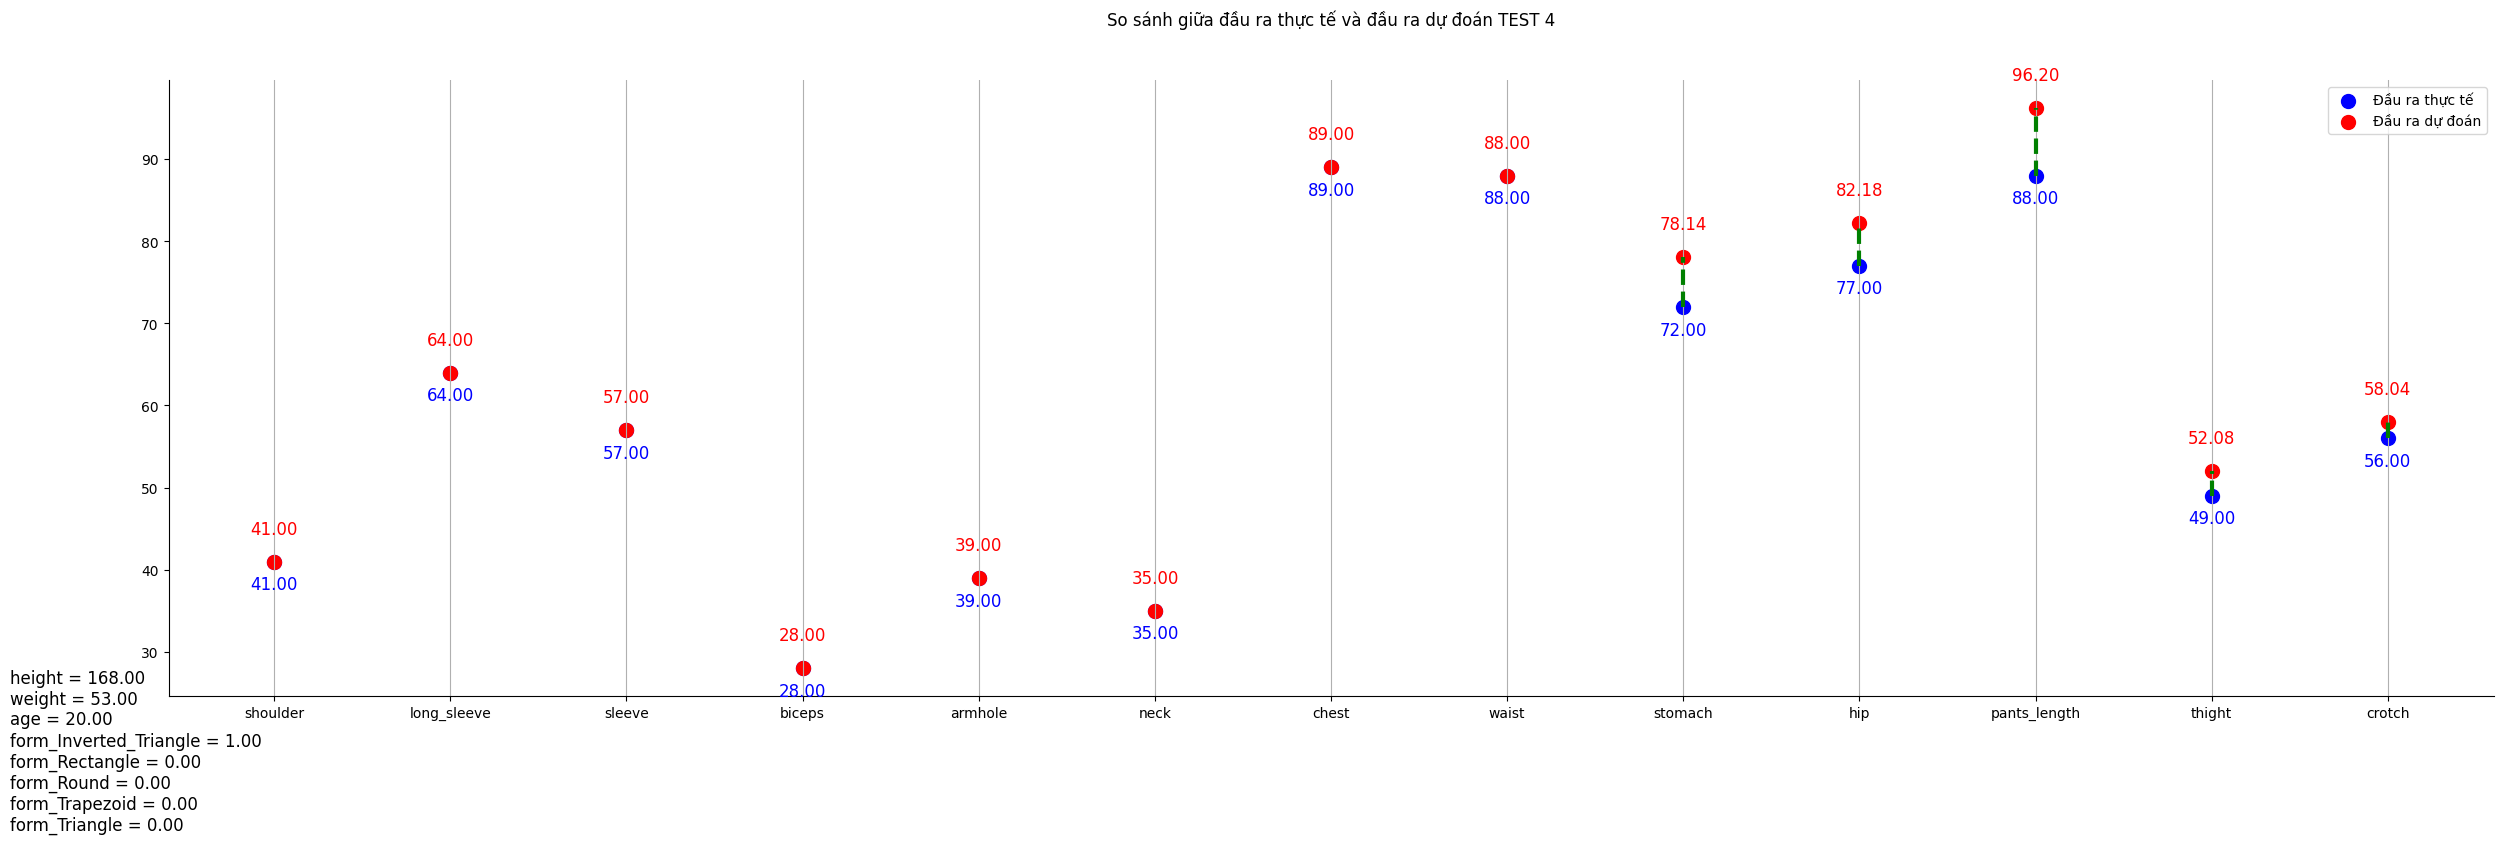

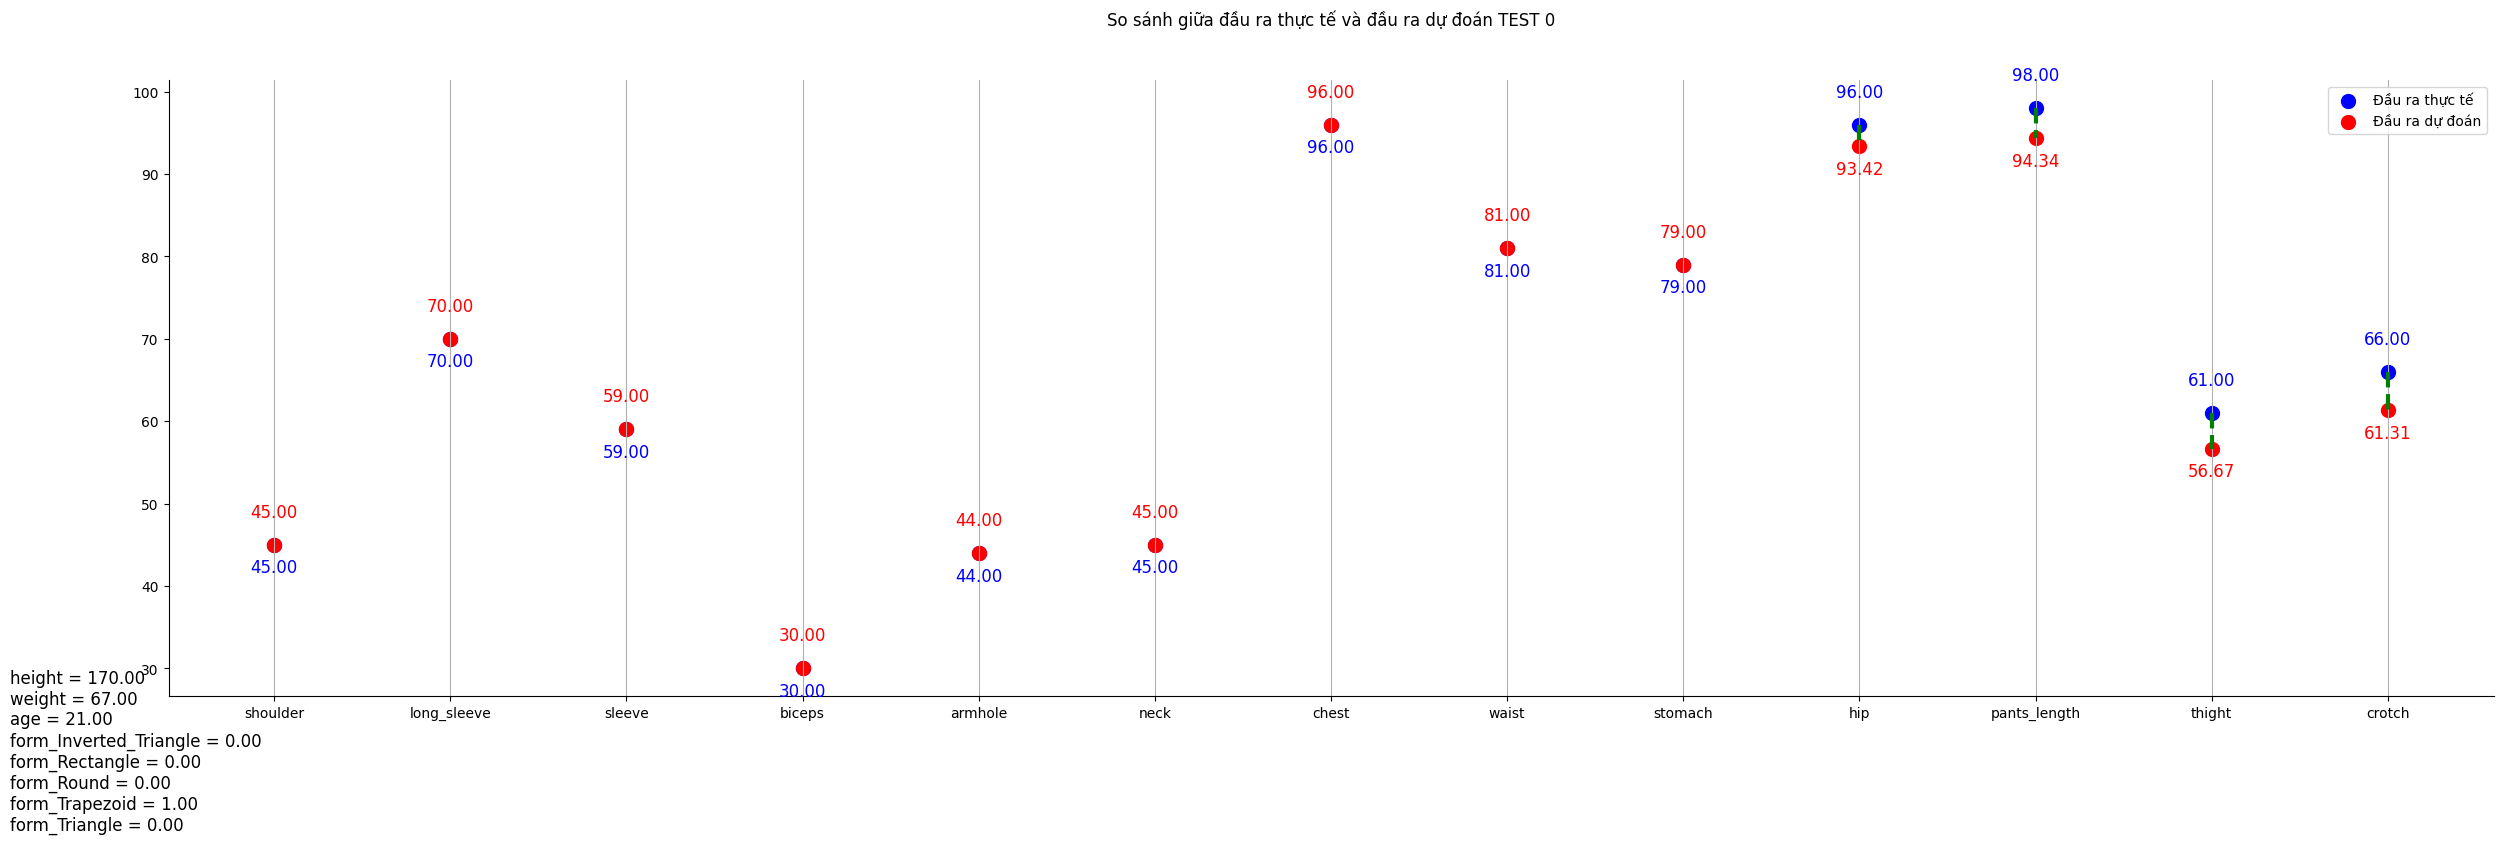

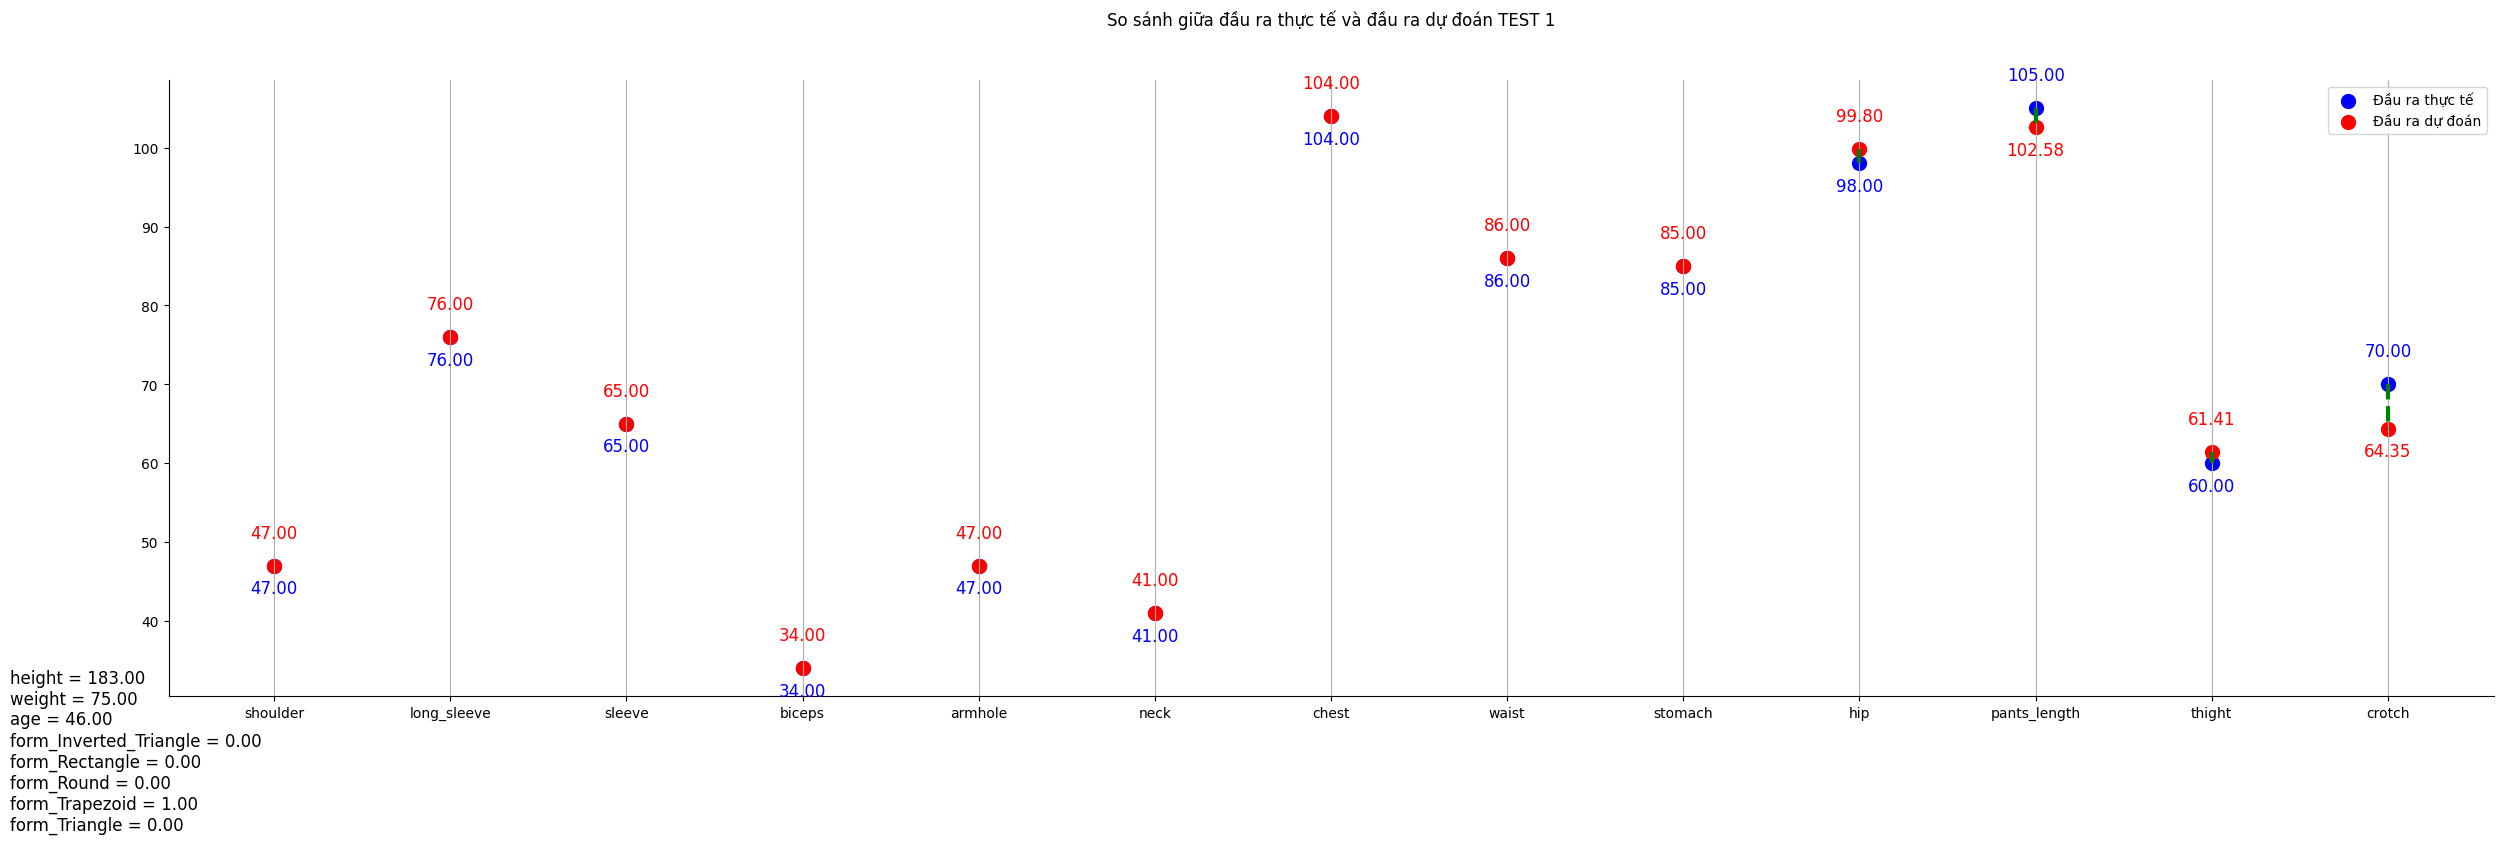

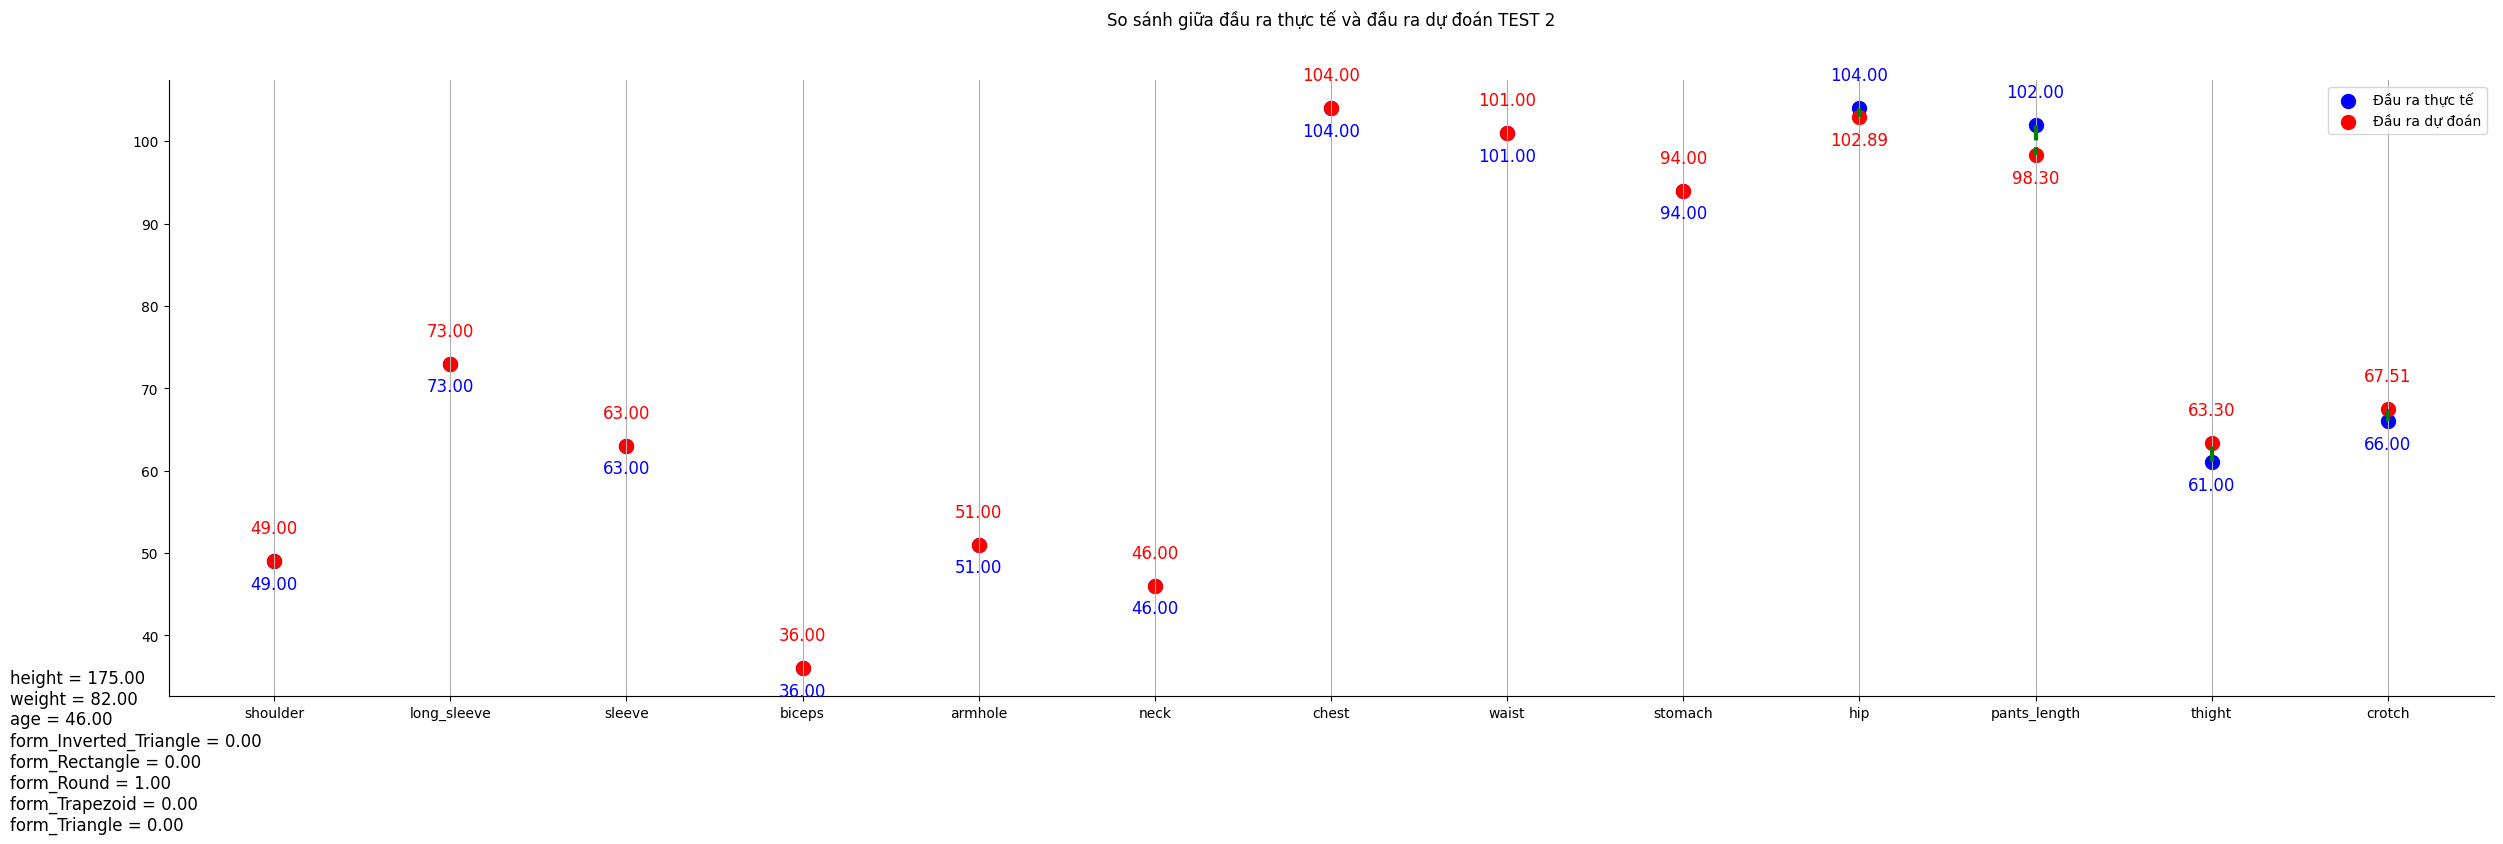

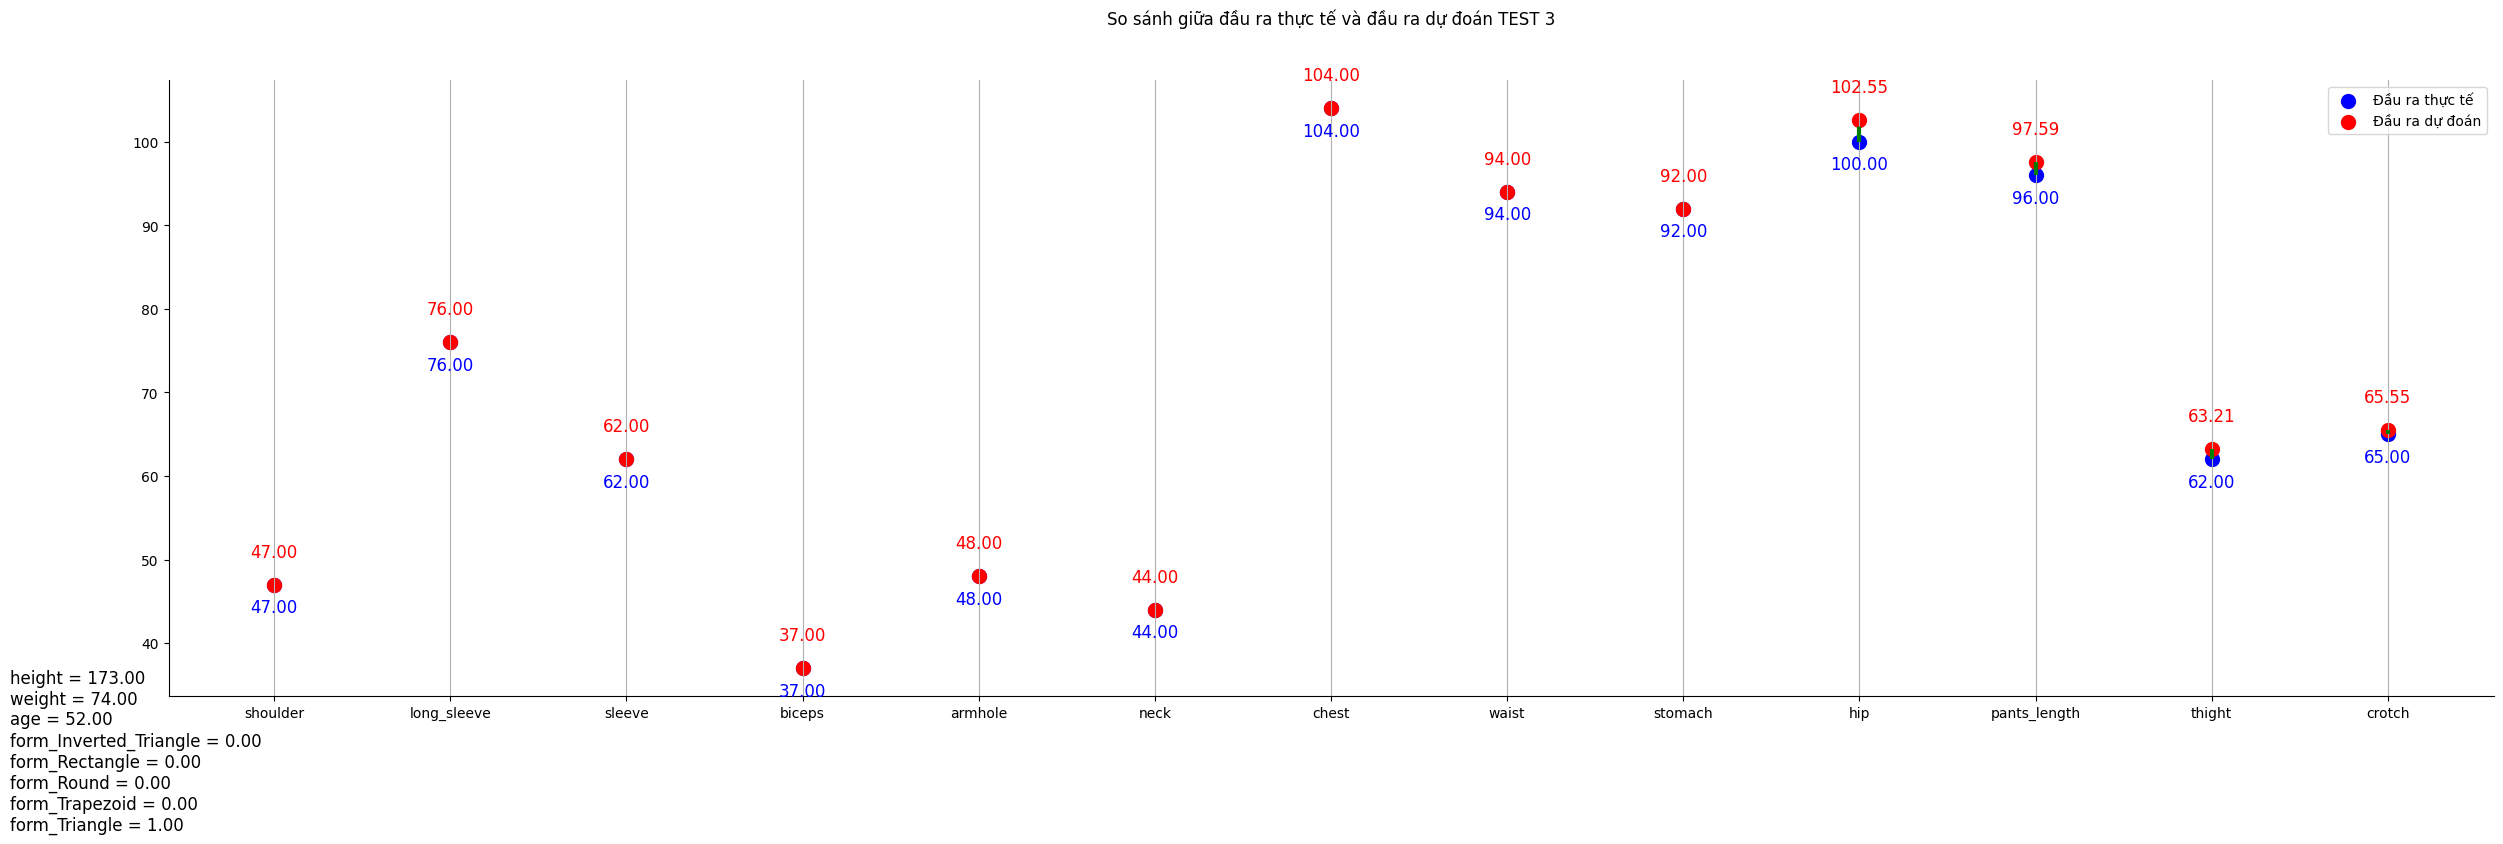

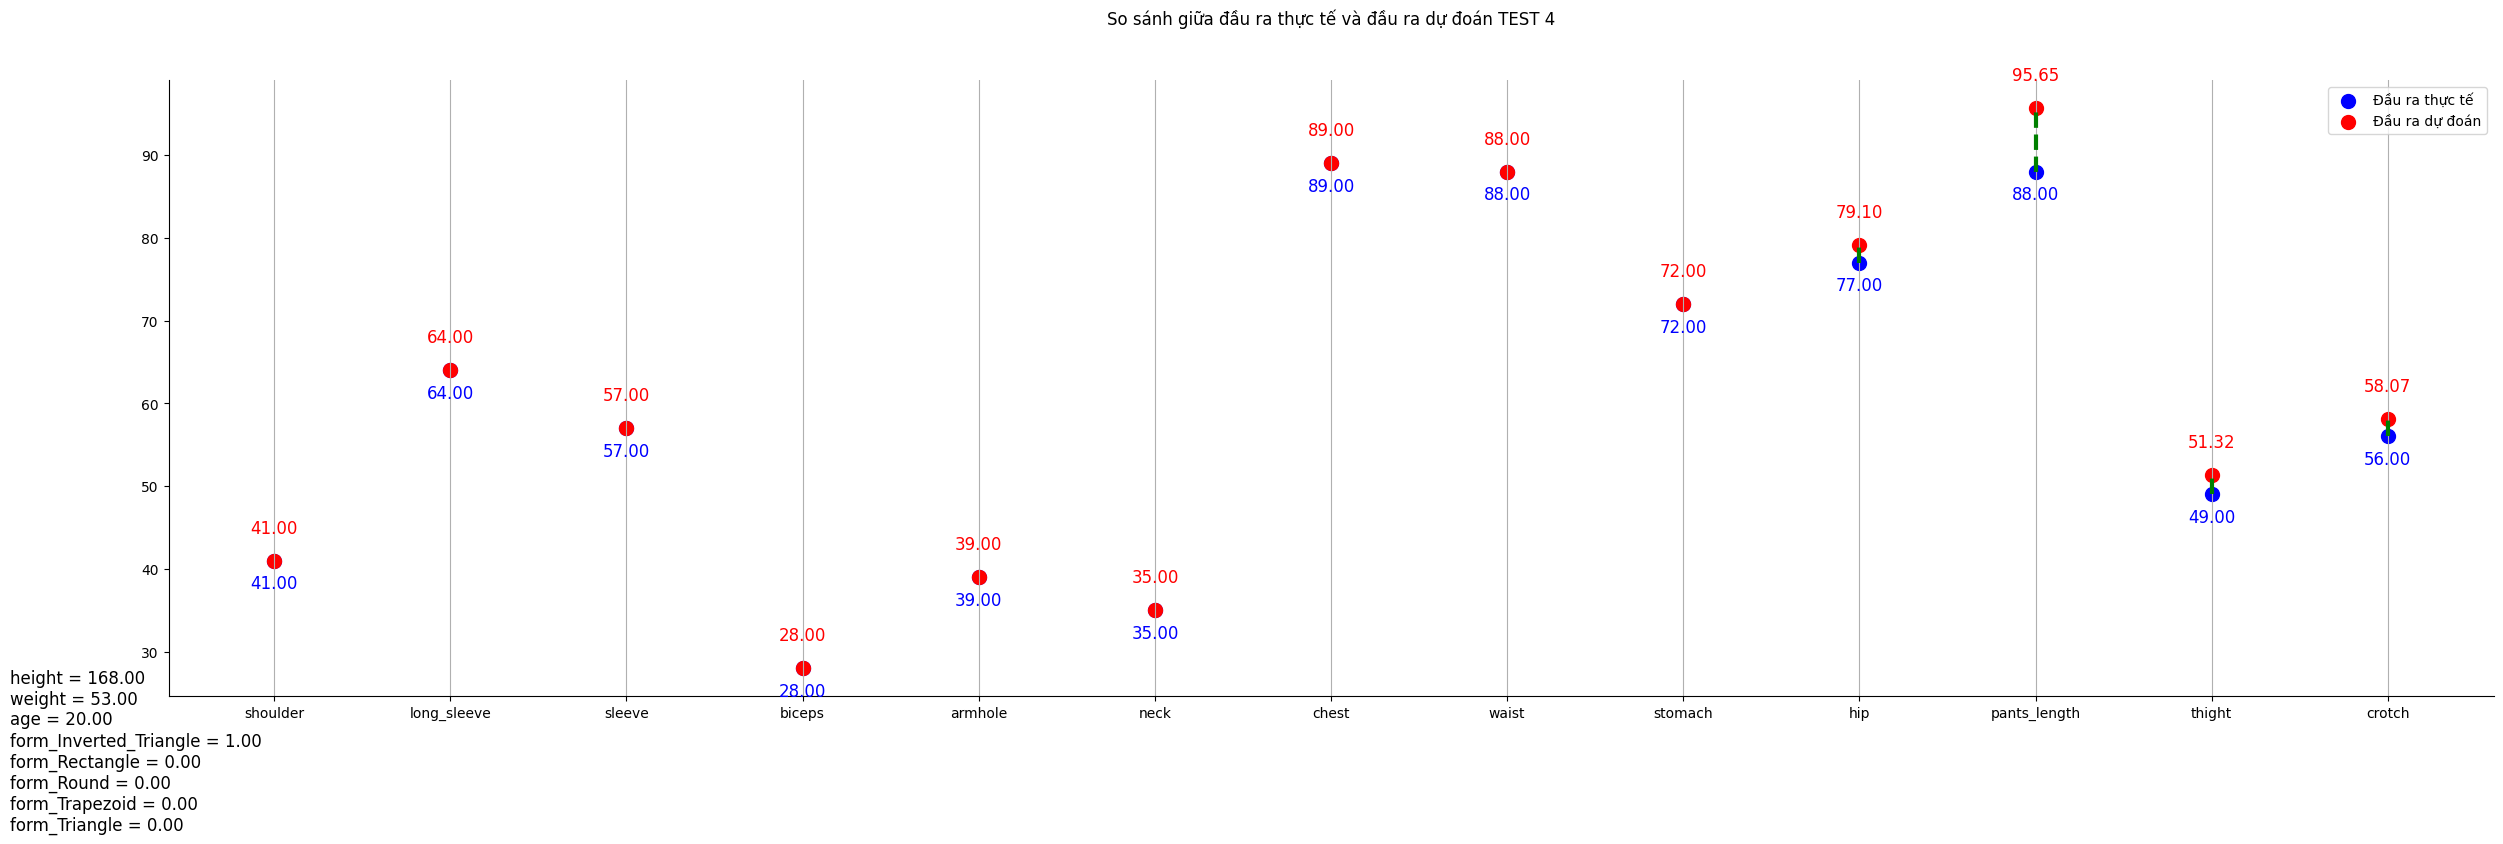

In [13]:
labels = input_columns + output_columns
input_size = len(input_columns)
output_size = len(output_columns)

for pred in pred_list:
    pred = np.array(pred)
    test = np.array(test)
    for i in range(5):
        plt.figure(figsize=(30, 8))

        # Thay đổi viền
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        # Vẽ đầu ra thực tế
        plt.scatter(output_columns, test[i][input_size:], marker='o', color='b', label='Đầu ra thực tế', s=100)
        
        # Vẽ đầu ra dự đoán
        plt.scatter(output_columns, pred[i][input_size:], marker='o', color='r', label='Đầu ra dự đoán', s=100)

        # Nối các điểm tương ứng của test và pred trong mỗi cột (cho output)
        for j in range(len(output_columns)):
            plt.plot([output_columns[j], output_columns[j]], 
                    [test[i][j + input_size], pred[i][j + input_size]], 
                    color='green', linestyle='--', linewidth=3)

        # Thêm giá trị vào các điểm trên đồ thị cho đầu ra thực tế
        for j in range(len(output_columns)):
            numerator = pred[i][j + input_size] - test[i][j + input_size]
            if numerator == 0:
                d = 1  # Hoặc giá trị xử lý khác bạn muốn
            else:
                d = numerator / abs(numerator)
            plt.annotate(f'{test[i][j + input_size]:.2f}', (output_columns[j], test[i][j + input_size]), textcoords="offset points", xytext=(0,-20 * d), ha='center', fontsize=12, color='blue')
            plt.annotate(f'{pred[i][j + input_size]:.2f}', (output_columns[j], pred[i][j + input_size]), textcoords="offset points", xytext=(0,20 * d), ha='center', fontsize=12, color='red')

        # Hiển thị giá trị input dưới dạng chuỗi ký tự
        input_text = "\n".join([f"{input_columns[j]} = {test[i][j]:.2f}" for j in range(input_size)])
        plt.text(-1.5, min(test[i][input_size:]) - 0.1, input_text, fontsize=12, color='black', ha='left', va='top')

        # Thêm tiêu đề và nhãn trục
        plt.title(f"So sánh giữa đầu ra thực tế và đầu ra dự đoán TEST {i}", pad=40)

        # Hiển thị legend
        plt.legend()

        # Hiển thị lưới
        plt.grid(True, axis='x')
        plt.savefig(figure_path / f"test_{i}.png")

        # Hiển thị biểu đồ
        plt.show()
